<a href="https://colab.research.google.com/github/vladislavlisin/cft/blob/main/cft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Начало**

In [1]:
# imports

import numpy as np
import pandas as pd

In [2]:
# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_name = "/content/drive/MyDrive/цфт/X_train.csv"
df = pd.read_csv(file_name)

y = pd.read_csv("/content/drive/MyDrive/цфт/y_train.csv")
answer = pd.read_csv("/content/drive/MyDrive/цфт/answer.csv")
to_sumbit_data = pd.read_csv("/content/drive/MyDrive/цфт/X_test.csv")

df

,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
0,0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,...,1.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx
1,1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,...,1.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx
2,2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,...,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx
3,3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,...,0.0,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx
4,4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,...,0.0,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,1199856,0.0,IL,41000.0,0.0,0.0,0.0,22.97,Feb-2002,4 years,...,0.0,0.0,debt_consolidation,82.1%,0.0,36 months,debt consolidation,8.0,Source Verified,604xx
1199857,1199857,0.0,NY,95000.0,0.0,0.0,0.0,25.63,Jan-2002,3 years,...,0.0,0.0,credit_card,82.3%,0.0,36 months,Credit cards financing,29.0,Verified,106xx
1199858,1199858,0.0,MA,61000.0,0.0,0.0,0.0,15.58,Nov-2002,8 years,...,0.0,0.0,home_improvement,6%,0.0,60 months,Home improvement,26.0,Source Verified,021xx
1199859,1199859,0.0,OH,35000.0,0.0,0.0,0.0,24.07,Nov-1991,5 years,...,0.0,0.0,debt_consolidation,76.2%,0.0,60 months,Debt,52.0,Verified,454xx


In [ ]:
df.describe()

,index,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,fico_range_high,fico_range_low,funded_amnt,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,tax_liens,total_acc
count,1.199861e+06,1.199861e+06,1.199861e+06,1.199824e+06,1.199824e+06,1.199861e+06,1.199861e+06,1.199861e+06,1.199861e+06,1.199861e+06,...,1.154852e+06,1.154852e+06,1.199861e+06,632647.000000,632647.000000,1.155527e+06,1.199861e+06,1.199394e+06,1.199833e+06,1.199861e+06
mean,5.999300e+05,4.625536e-03,7.811051e+04,8.901306e-03,1.810182e-02,3.142264e-01,1.803875e+01,7.012003e+02,6.972001e+02,1.440466e+04,...,8.669682e-02,2.156888e+00,1.162006e+01,1.677463,2.899328,4.318438e+01,2.097351e-01,1.326236e-01,5.066205e-02,2.464238e+01
std,3.463702e+05,7.284156e-02,1.363514e+05,1.081550e-01,1.507312e-01,8.763691e-01,8.404678e+00,3.234104e+01,3.234036e+01,8.855223e+03,...,5.024471e-01,1.853938e+00,5.574730e+00,1.641795,2.667496,3.613864e+01,5.909437e-01,3.732363e-01,3.914037e-01,1.205229e+01
min,0.000000e+00,0.000000e+00,2.300000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,6.640000e+02,6.600000e+02,5.000000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,2.999650e+05,0.000000e+00,4.700000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.174000e+01,6.740000e+02,6.700000e+02,7.675000e+03,...,0.000000e+00,1.000000e+00,8.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
50%,5.999300e+05,0.000000e+00,6.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.755000e+01,6.940000e+02,6.900000e+02,1.200000e+04,...,0.000000e+00,2.000000e+00,1.100000e+01,1.000000,2.000000,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01
75%,8.998950e+05,0.000000e+00,9.300000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.397000e+01,7.190000e+02,7.150000e+02,2.000000e+04,...,0.000000e+00,3.000000e+00,1.400000e+01,2.000000,4.000000,7.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
max,1.199860e+06,6.000000e+00,1.100000e+08,1.000000e+01,2.000000e+01,4.200000e+01,4.996000e+01,8.500000e+02,8.450000e+02,4.000000e+04,...,4.200000e+01,3.200000e+01,9.000000e+01,39.000000,54.000000,1.000000e+02,8.600000e+01,1.200000e+01,8.500000e+01,1.730000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   index                       1199861 non-null  int64  
 1   acc_now_delinq              1199861 non-null  float64
 2   addr_state                  1199861 non-null  object 
 3   annual_inc                  1199861 non-null  float64
 4   chargeoff_within_12_mths    1199824 non-null  float64
 5   collections_12_mths_ex_med  1199824 non-null  float64
 6   delinq_2yrs                 1199861 non-null  float64
 7   dti                         1199861 non-null  float64
 8   earliest_cr_line            1199861 non-null  object 
 9   emp_length                  1128114 non-null  object 
 10  fico_range_high             1199861 non-null  float64
 11  fico_range_low              1199861 non-null  float64
 12  funded_amnt                 1199861 non-null  float64
 1

In [ ]:
df.isnull().sum().loc[lambda x: x > 0]

chargeoff_within_12_mths          37
collections_12_mths_ex_med        37
emp_length                     71747
inq_last_12m                  567215
mort_acc                       31541
mths_since_last_delinq        607443
mths_since_recent_bc_dlq      917196
mths_since_recent_inq         149781
num_accts_ever_120_pd          45009
num_actv_bc_tl                 45009
num_rev_accts                  45010
num_sats                       37295
num_tl_120dpd_2m               90608
num_tl_30dpd                   45009
num_tl_90g_dpd_24m             45009
num_tl_op_past_12m             45009
open_il_24m                   567214
open_rv_24m                   567214
percent_bc_gt_75               44334
pub_rec_bankruptcies             467
revol_util                       841
tax_liens                         28
title                          13800
zip_code                           1
dtype: int64

In [ ]:
df.dtypes

index                            int64
acc_now_delinq                 float64
addr_state                    category
annual_inc                     float64
chargeoff_within_12_mths       float64
collections_12_mths_ex_med     float64
delinq_2yrs                    float64
dti                            float64
earliest_cr_line              category
emp_length                    category
fico_range_high                float64
fico_range_low                 float64
funded_amnt                    float64
home_ownership                category
inq_last_12m                   float64
installment                    float64
int_rate                      category
issue_d                       category
loan_amnt                      float64
mort_acc                       float64
mths_since_last_delinq         float64
mths_since_recent_bc_dlq       float64
mths_since_recent_inq          float64
num_accts_ever_120_pd          float64
num_actv_bc_tl                 float64
num_rev_accts            

In [ ]:
# всего 44 признака
# 12 категориальных признаков

# category or object
for column in df.columns:
    if df.dtypes[column] == "object":
        print(column)

addr_state
earliest_cr_line
emp_length
home_ownership
int_rate
issue_d
purpose
revol_util
term
title
verification_status
zip_code


In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=7528b0c7414d9fd60885896d2f6c1fe2e7f9101d6a0979df737923e863ff1c68
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

In [ ]:
# Ipywidgets is not yet fully supported on Google Colab.As an alternative, you can use the HTML report
# profile.to_widgets()

In [ ]:
profile.to_file("/content/drive/MyDrive/цфт/your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(to_sumbit_data, title="Test Profiling Report")

In [ ]:
profile.to_file("/content/drive/MyDrive/цфт/your_report_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
y

,index,loan_status
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
1199856,1199856,0
1199857,1199857,0
1199858,1199858,0
1199859,1199859,0


0    968253
1    231608
Name: loan_status, dtype: int64


<Axes: ylabel='loan_status'>

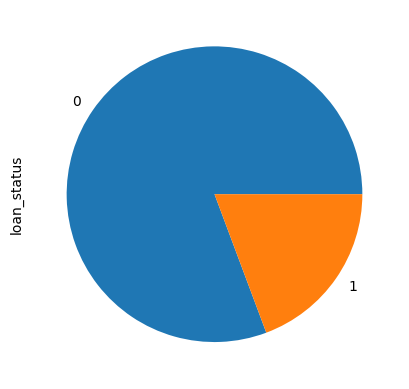

In [ ]:
print(y.loan_status.value_counts())
y.loan_status.value_counts().plot.pie()

In [ ]:
answer

,index,loan_status
0,0,0.249742
1,1,0.160255
2,2,0.096751
3,3,0.032058
4,4,0.185327
...,...,...
590972,590972,0.209306
590973,590973,0.370474
590974,590974,0.193446
590975,590975,0.074136


# **Feature Engineering**

Сперва удалим признаки с высокой корреляцией

In [ ]:
"""

acc_now_delinq или num_tl_30dpd	- 0.752

num_tl_30dpd - Количество счетов, просроченных на 30 дней (обновлено за последние 2 месяца)
num_tl_30dpd содержит мало информации, так как львиная доля значений это нули, процент пропусков < 4%
5 уникальных значений, можно применить woe преобразование

acc_now_delinq - Указывает, был ли доход подтвержден LC, не подтвержден или подтвержден источник дохода.
acc_now_delinq пропусков нет, однако значений также мало, и инфы мало, так же всё в нулях
6 уникальных значений - можно применитт woe преобразование

Вывод: нет разницы что брать
нужно экспериминитировать, возьмём потом num_tl_30dpd

**********************

delinq_2yrs или mths_since_last_delinq или mths_since_recent_bc_dlq или num_tl_90g_dpd_24m

delinq_2yrs - Количество случаев просроченной задолженности более 30 дней в кредитном досье заемщика за последние 2 года.
delinq_2yrs - большая часть нули, 32 уникальных значения

mths_since_last_delinq - Количество месяцев с момента последней просрочки заемщиком.
половина записей отсутствует, однако оставшаяся половина уникальные значения
167 уникальных. float - 0.821

mths_since_recent_bc_dlq - Месяцы с момента последнего просроченного платежа по банковской карте.
большая часть данных отсутсвует, оставшаяся уникальные значения 168 - 0.634

num_tl_90g_dpd_24m - Количество счетов, просроченных на 90 и более дней за последние 24 месяца
29 уникальных, большая часть нули, немного missing - 0.515

вывод: исключить mths_since_recent_bc_dlq, mths_since_last_delinq

**********************

fico_range_high или fico_range_low

fico_range_high - Верхний граничный диапазон, к которому относится FICO заемщика при выдаче кредита.
нет пропусков, 38 уникальных

fico_range_low - Нижний граничный диапазон, к которому относится FICO заемщика при выдаче кредита.
нет пропусковя, 38 уникальных

вывод: данные аналогичны, нет разнциы что исключать
исключим fico_range_high

**********************
funded_amnt или installment или loan_amnt

funded_amnt - Общая сумма обязательств по этому кредиту на данный момент времени.
флоут, много разных значений, нет пропусков

installment - Ежемесячный платеж, причитающийся заемщику, если кредит выдан.
нет пропусков, очень много разных значений, распределение асимметричное колокообразное

loan_amnt - Перечисленная сумма кредита, заявленного заемщиком.
Если в какой-то момент кредитный отдел уменьшит сумму кредита, то это отразится на этом значении.
те же данные что и funded_amnt

вывод  оставить только installment
исключить: loan_amnt, funded_amnt

**********************
inq_last_12m или mths_since_recent_inq или num_tl_op_past_12m

inq_last_12m - Количество кредитных запросов за последние 12 месяцев
половина пропущена, уникальных 45, большая часть нули

mths_since_recent_inq - Месяцы с момента последнего запроса.
26 уникальных, 12 процентов миссинг, 8 процентов нулей, значения распределены
весьма равномерно последовательно

num_tl_op_past_12m - Количество счетов, открытых за последние 12 месяцев
32 уникальных, есть экстремальные значения, 15 процентов нулей, 4 процента пропусков

вывод: берём num_tl_op_past_12m
исключить: mths_since_recent_inq, inq_last_12m

**********************
open_acc или num_actv_bc_tl или num_rev_accts или num_sats или total_acc

open_acc - Количество открытых кредитных линий в кредитном досье заемщика.
есть выбросы, 80 уникальных, нет прпоусков

num_actv_bc_tl - Количество активных на данный момент счетов банковских карт
5 процентов нулей и пропусков, 36 уникальных, есть выброс.

num_rev_accts - Количество оборотных счетов
4 процента пропусков, 111 уникальных, есть выбросы.

num_sats - Количество удовлетворительных аккаунтов
3 процента прпоусков, 80 уникальных - 0.999 with open_acc

total_acc - Общее количество кредитных линий в настоящее время в кредитном деле заемщика
142 уникальных, нет прпоусков и нулей, есть выбросы. - 0.703 with total

вывод take: num_sats, num_actv_bc_tl
исключить: open_acc, total_acc, num_rev_accts

**********************

open_rv_24m - Количество возобновляемых сделок, открытых за последние 24 месяца
половина пропусков, 8 процентов нулей, 46 уникальных, есть выбросы,


**********************
pub_rec_bankruptcies или pub_rec

pub_rec_bankruptcies - Количество публичных банкротств
большая часть еули, нет почти пропусков, 11 уникальных

pub_rec - Количество унизительных публичных записей
38 уникальных, большая часть нули, нет пропусков.

pub_rec - берём


"""

# 15 признаков на исключение, посомтрим какие признаки выгоднее оставить
# 13 фичей в итоге исключили

# 45 - 13 =  32
cols = [
    "index",
    "pub_rec_bankruptcies",
    "open_acc",
    "total_acc",
    "num_rev_accts",
    "mths_since_recent_inq",
    "inq_last_12m",
    "loan_amnt",
    "funded_amnt",
    "fico_range_high",
    "mths_since_recent_bc_dlq",
    "mths_since_last_delinq",
    "num_tl_30dpd"
]

df_after_cor = df.drop(columns=cols, axis=1)
df_after_cor

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,...,open_rv_24m,percent_bc_gt_75,pub_rec,purpose,revol_util,tax_liens,term,title,verification_status,zip_code
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,685.0,...,3.0,100.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,Source Verified,847xx
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,685.0,...,1.0,100.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,Not Verified,900xx
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,670.0,...,3.0,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,Source Verified,895xx
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,690.0,...,NaN,0.0,0.0,car,33.4%,0.0,36 months,Car financing,Source Verified,853xx
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,670.0,...,1.0,100.0,0.0,other,88.6%,0.0,60 months,Other,Not Verified,453xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.0,IL,41000.0,0.0,0.0,0.0,22.97,Feb-2002,4 years,680.0,...,NaN,100.0,0.0,debt_consolidation,82.1%,0.0,36 months,debt consolidation,Source Verified,604xx
1199857,0.0,NY,95000.0,0.0,0.0,0.0,25.63,Jan-2002,3 years,705.0,...,NaN,83.3,0.0,credit_card,82.3%,0.0,36 months,Credit cards financing,Verified,106xx
1199858,0.0,MA,61000.0,0.0,0.0,0.0,15.58,Nov-2002,8 years,770.0,...,NaN,0.0,0.0,home_improvement,6%,0.0,60 months,Home improvement,Source Verified,021xx
1199859,0.0,OH,35000.0,0.0,0.0,0.0,24.07,Nov-1991,5 years,715.0,...,NaN,33.3,0.0,debt_consolidation,76.2%,0.0,60 months,Debt,Verified,454xx


Попробуем сделать woe-преобразование для категориальных данных и числовых с большим количеством пропусков

In [ ]:
df_y = df_after_cor.assign(TARGET=y.loan_status)
df_y

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,...,percent_bc_gt_75,pub_rec,purpose,revol_util,tax_liens,term,title,verification_status,zip_code,TARGET
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,685.0,...,100.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,Source Verified,847xx,1
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,685.0,...,100.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,Not Verified,900xx,0
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,670.0,...,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,Source Verified,895xx,1
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,690.0,...,0.0,0.0,car,33.4%,0.0,36 months,Car financing,Source Verified,853xx,0
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,670.0,...,100.0,0.0,other,88.6%,0.0,60 months,Other,Not Verified,453xx,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.0,IL,41000.0,0.0,0.0,0.0,22.97,Feb-2002,4 years,680.0,...,100.0,0.0,debt_consolidation,82.1%,0.0,36 months,debt consolidation,Source Verified,604xx,0
1199857,0.0,NY,95000.0,0.0,0.0,0.0,25.63,Jan-2002,3 years,705.0,...,83.3,0.0,credit_card,82.3%,0.0,36 months,Credit cards financing,Verified,106xx,0
1199858,0.0,MA,61000.0,0.0,0.0,0.0,15.58,Nov-2002,8 years,770.0,...,0.0,0.0,home_improvement,6%,0.0,60 months,Home improvement,Source Verified,021xx,0
1199859,0.0,OH,35000.0,0.0,0.0,0.0,24.07,Nov-1991,5 years,715.0,...,33.3,0.0,debt_consolidation,76.2%,0.0,60 months,Debt,Verified,454xx,0


In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   acc_now_delinq              1199861 non-null  float64
 1   addr_state                  1199861 non-null  object 
 2   annual_inc                  1199861 non-null  float64
 3   chargeoff_within_12_mths    1199824 non-null  float64
 4   collections_12_mths_ex_med  1199824 non-null  float64
 5   delinq_2yrs                 1199861 non-null  float64
 6   dti                         1199861 non-null  float64
 7   earliest_cr_line            1199861 non-null  object 
 8   emp_length                  1128114 non-null  object 
 9   fico_range_low              1199861 non-null  float64
 10  home_ownership              1199861 non-null  object 
 11  installment                 1199861 non-null  float64
 12  int_rate                    1199861 non-null  object 
 1

In [ ]:
"""
Вероятно следующие признаки несут мало информации (more than 70% is one value)

mths_since_recent_bc_dlq has 917196 (76.4%) missing values -
acc_now_delinq has 1194659 (99.6%) Zeros + -
chargeoff_within_12_mths has 1190259 (99.2%) zeros	Zeros + -
collections_12_mths_ex_med has 1179983 (98.3%) zeros	Zeros + -
delinq_2yrs has 971487 (81.0%) zeros + -
num_accts_ever_120_pd has 883335 (73.6%) zeros +
num_tl_120dpd_2m has 1108495 (92.4%) zeros	Zeros + -
num_tl_90g_dpd_24m has 1090514 (90.9%) zeros + -
pub_rec has 1000724 (83.4%) zeros	Zeros + -
pub_rec_bankruptcies has 1051100 (87.6%) zeros	Zeros -
tax_liens has 1162622 (96.9%) zeros + -

- уже удалён
+ ещё здесь

***************************************************************************
первичный анализ

index                           int64

************* 32 фичи

+
acc_now_delinq                float64 woe bins(0, 1, 2, >2) no misses.  bins(0, 0>)
удалить эти данные так как 99.6% нулей

+
addr_state                    object 51 uniq, no misses, str (Состояние, указанное заемщиком в кредитной заявке)
woe или оставить как есть для деревьев

+
annual_inc                    float64 - числовые значения, уникальных много,
есть выбросы, можно работать без преобразований, пропусков нет

chargeoff_within_12_mths      float64 woe bins(0, nan-other)
99.2% нулей скорее всего удалить

collections_12_mths_ex_med    float64 woe bins(nans, 0, 1, 2, >2) bins(0, nan-other)
98.3% нулей - скорее всего удалить
Количество сборов за 12 месяцев без учета медицинских сборов

delinq_2yrs                   float64 woe bins(0, 1, 2, >2) no misses
81.0% нулей
Количество случаев просроченной задолженности более 30 дней в кредитном досье заемщика за последние 2 года.

dti                           float64 много уникальных, колокол, хороший признак, стандартизация
Соотношение, рассчитанное путем деления общей суммы ежемесячных платежей заемщика на общую сумму долговых обязательств,
за исключением ипотечного кредита и запрошенного кредита, на ежемесячный доход заемщика, о котором сообщается самостоятельно.

earliest_cr_line               object - дата, пик 2001-2002, можно бины ебнуть, 748 уникальных,
woe bins(до 90) ???
Minimum	1933-03-01 00:00:00
Maximum	2017-02-01 00:00:00
Месяц, в котором заемщик открыл самую раннюю из заявленных кредитных линий
нужно разбить на интервалы и сделать временные бакеты


emp_length                     object
Стаж работы в годах. Возможные значения находятся в диапазоне от 0 до 10,
где 0 означает менее одного года, а 10 означает десять или более лет.
нужно перевезти из строки в цифру

категориальные данные, имеющие явное порядковое значение (чем больше стаж тем лучше)
есть пропуски, их можно интерпретировать как отсутствие опыта
кодировка порядковая

fico_range_low                float64
Нижний граничный диапазон, к которому относится FICO заемщика при выдаче кредита.
распределение волна, нет пропусков, разброс данных небольшой, стандартизация сублинейная

home_ownership                 object
Статус собственности на жилье, предоставленный заемщиком при регистрации или полученный
из кредитного отчета. Наши ценности: АРЕНДА, СОБСТВЕННОСТЬ, ИПОТЕКА, ДРУГОЕ
строки, woe bins(mortgage, rent, own, any-other-none)

installment                   float64
Ежемесячный платеж, причитающийся заемщику, если кредит выдан.
пизданутый колокол, нет пропусков, много уникальных, стандартизация,
нет доминирующих значений

int_rate                       object
Процентная ставка по кредиту
число + процент - это строка, можно перевести в float, 669 уникальных, можно сделать бакеты
или использовать как есть, woe?

issue_d                        object
Месяц, в котором был выдан кредит
Minimum	2007-06-01 00:00:00
Maximum	2020-09-01 00:00:00
колокол, середина 2014-2017

mort_acc                      float64 woe bins(nans, 0, 1, 2, 3, >3)
Количество ипотечных счетов.
500к нулей, есть мисы 3проц

num_accts_ever_120_pd         float64 woe bins(nans, 0, 1, 2, >2)
Количество счетов, просроченных на 120 и более дней
большая часть нули

num_actv_bc_tl                float64
Количество активных на данный момент счетов банковских карт
есть ли порядок?
woe bins(nans, 0, 1-2, 3, 4-5, >5)

num_sats                      float64 - 81 уникальный
Количество удовлетворительных аккаунтов
woe нужно бины посмотреть

num_tl_120dpd_2m              float64
Количество счетов, в настоящее время просроченных на 120 дней (обновлено за последние 2 месяца)
данные хуйня, удалить, очень много нулей и мисов ~100 процентов


num_tl_90g_dpd_24m            float64
Количество счетов, просроченных на 90 и более дней за последние 24 месяца
Zeros (%)	90.9%,
Missing (%)	3.8%
woe bins (nans, 0, 1, >1)

num_tl_op_past_12m            float64
Количество счетов, открытых за последние 12 месяцев
zeroes and nulls ab 20perc
woe bins(nans, 0, 1, 2, 3, 4-6, >6)

open_il_24m                   float64
Количество счетов в рассрочку, открытых за последние 24 месяца
woe bins(nans, 0, 1, 2, >2)

open_rv_24m                   float64
Количество возобновляемых сделок, открытых за последние 24 месяца
woe bins(nans, 0, 1-2, 3-4, >4)

percent_bc_gt_75              float64
Процент всех счетов банковских карт > 75% от лимита.
Missing (%)	3.7%, можно поробовать какое-нибуть умное замещение nans
и использовать как дефолтный признак без кодировки, 251 уникальное

pub_rec                       float64 -
Количество унизительных публичных записей
нет пропусков, большая часть нули, 35 уникальных
woe bins(0, 0>)

purpose                        object
Категория, предоставляемая заемщиком для заявки на кредит.
нужно посомтреть категории и сгруппировать
прпоусков нет, 14 уникальных, есть доминация


revol_util                     object
Коэффициент использования возобновляемой линии или сумма кредита,
которую заемщик использует по отношению ко всему доступному возобновляемому кредиту.
цифры в виде чисел 1316 уникальных, можно перевезти в флоут и работать как с обычными

tax_liens                     float64 (nan, 0-other) woe?
Количество налоговых залогов
96.9% нулей

term                           object
Количество платежей по кредиту. Значения указаны в месяцах и могут быть 36 или 60.
OHE (1 или 0)

title                          object
Название кредита, предоставленное заемщиком
43858 уникальных, изучить категории , разбить на группы и сделать бакеты, есть пропуски

verification_status            object
Указывает, был ли доход подтвержден LC, не подтвержден или подтвержден источник дохода.
три значения, OHE или WOE, пропусков нет.

zip_code                       object
Первые 3 цифры почтового индекса, указанные заемщиком в кредитной заявке.
категория большой размерности около 1000 уникальных,
нужно по-умному закодировать

TARGET                          int64

"""

In [56]:
cols = [
    "index",
    "pub_rec_bankruptcies",
    "open_acc",
    "total_acc",
    "num_rev_accts",
    "mths_since_recent_inq",
    "inq_last_12m",
    "loan_amnt",
    "funded_amnt",
    "fico_range_high",
    "mths_since_recent_bc_dlq",
    "mths_since_last_delinq",
    "num_tl_30dpd"
]

df_after_cor = df.drop(columns=cols, axis=1)

df_y = df_after_cor.assign(TARGET=y.loan_status)

badinfo_cols = [
    "chargeoff_within_12_mths",
    "tax_liens",
    "num_tl_120dpd_2m",
    "collections_12_mths_ex_med"
]

df_y = df_y.drop(columns=badinfo_cols, axis=1)

In [58]:
df_y

,acc_now_delinq,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,home_ownership,installment,...,open_rv_24m,percent_bc_gt_75,pub_rec,purpose,revol_util,term,title,verification_status,zip_code,TARGET
0,0.00000000000000000000,UT,80000.00000000000000000000,0.00000000000000000000,30.48999999999999843681,Oct-1996,4 years,685.00000000000000000000,RENT,539.02999999999997271516,...,3.00000000000000000000,100.00000000000000000000,1.00000000000000000000,credit_card,56.1%,36 months,Credit card refinancing,Source Verified,847xx,1
1,0.00000000000000000000,CA,82000.00000000000000000000,0.00000000000000000000,7.00000000000000000000,Mar-1993,10+ years,685.00000000000000000000,MORTGAGE,214.27000000000001023182,...,1.00000000000000000000,100.00000000000000000000,1.00000000000000000000,credit_card,88.3%,36 months,Credit card refinancing,Not Verified,900xx,0
2,0.00000000000000000000,NV,46080.00000000000000000000,1.00000000000000000000,17.32000000000000028422,Nov-2000,3 years,670.00000000000000000000,MORTGAGE,317.95999999999997953637,...,3.00000000000000000000,0.00000000000000000000,0.00000000000000000000,credit_card,18.1%,36 months,Credit card refinancing,Source Verified,895xx,1
3,0.00000000000000000000,AZ,30000.00000000000000000000,0.00000000000000000000,7.79999999999999982236,Jan-2010,< 1 year,690.00000000000000000000,OWN,98.98000000000000397904,...,NaN,0.00000000000000000000,0.00000000000000000000,car,33.4%,36 months,Car financing,Source Verified,853xx,0
4,0.00000000000000000000,OH,70000.00000000000000000000,0.00000000000000000000,13.35999999999999943157,Jan-2002,< 1 year,670.00000000000000000000,RENT,602.37000000000000454747,...,1.00000000000000000000,100.00000000000000000000,0.00000000000000000000,other,88.6%,60 months,Other,Not Verified,453xx,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.00000000000000000000,IL,41000.00000000000000000000,0.00000000000000000000,22.96999999999999886313,Feb-2002,4 years,680.00000000000000000000,RENT,348.18000000000000682121,...,NaN,100.00000000000000000000,0.00000000000000000000,debt_consolidation,82.1%,36 months,debt consolidation,Source Verified,604xx,0
1199857,0.00000000000000000000,NY,95000.00000000000000000000,0.00000000000000000000,25.62999999999999900524,Jan-2002,3 years,705.00000000000000000000,RENT,517.40999999999996816769,...,NaN,83.29999999999999715783,0.00000000000000000000,credit_card,82.3%,36 months,Credit cards financing,Verified,106xx,0
1199858,0.00000000000000000000,MA,61000.00000000000000000000,0.00000000000000000000,15.58000000000000007105,Nov-2002,8 years,770.00000000000000000000,OWN,667.19000000000005456968,...,NaN,0.00000000000000000000,0.00000000000000000000,home_improvement,6%,60 months,Home improvement,Source Verified,021xx,0
1199859,0.00000000000000000000,OH,35000.00000000000000000000,0.00000000000000000000,24.07000000000000028422,Nov-1991,5 years,715.00000000000000000000,MORTGAGE,486.22000000000002728484,...,NaN,33.29999999999999715783,0.00000000000000000000,debt_consolidation,76.2%,60 months,Debt,Verified,454xx,0


# **Дубликаты**

In [ ]:
to_sumbit_data.duplicated()[lambda x: x==True]

Series([], dtype: bool)

In [ ]:
df_y.duplicated()[lambda x: x==True]

Series([], dtype: bool)

# **WOE**

In [4]:
def impute(x):
    if x == -np.inf or x == np.inf:
        return .0
    else:
        return x

In [5]:
################################
# My Function for WOE (binary) #
################################

# 45 - 13 - 4 = 28 - чтото не то
# имеем в итоге 28 фичей !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Сначало найдём все woe по отдельности
# и в целом все преобразования

# var - feature_name

import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.20f}'.format
np.set_printoptions(suppress=True)


def WOE(var, df_y):

    k = df_y[[var,'TARGET']].groupby(var)['TARGET'].agg(['count','sum']).reset_index()

    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    try:
        k['Good %'] = (k['Good'] / k['Good'].sum())
        k['Bad %'] = (k['Bad'] / k['Bad'].sum())
        k[var + '_WOE'] = np.log(k['Good %'] / k['Bad %'])
    except ZeroDivisionError as zde:
        k[var + '_WOE'] = .0

    k[var + '_WOE'] = k[var + '_WOE'].map(lambda x: impute(x))

    k["IV"] = (k['Good %'] - k['Bad %'])*k[var + '_WOE']

    k = k.sort_values(by=var+'_WOE')


    total_iv = k["IV"].sum()
    print(k)
    print(f'{total_iv:.20f}')

    return k


In [6]:
from datetime import datetime
import math

month_list = {
    'Jan': 1,
		'Feb': 2,
		'Mar': 3,
		'Apr': 4,
		'May': 5,
		'Jun': 6,
		'Jul': 7,
		'Aug': 8,
		'Sep': 9,
		'Oct': 10,
		'Nov': 11,
		'Dec': 12		}

def make_datetime(x):

    year = int(x[4:])
    month = x[:3]
    num = month_list[month]
    date = datetime(year=year, month=num, day=1)

    return date.year

def binning_acc_now_delinq(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x > 0:
            return "0>"
        elif x == 0:
            return 0


def binning_delinq_2yrs(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return 0
        elif x == 1:
            return 1
        elif x > 1:
            return ">1"


def binning_earliest_cr_line(x):
    if not math.isnan(x):
        if x < 1982:
            return "1933-1981"
        elif 1982 <= x <= 1992:
            return "1982-1992"
        elif 1993 <= x <= 1997:
            return "1993-1997"
        elif 1998 <= x <= 2008:
            return "1998-2008"
        elif 2008 < x:
            return ">2008"
    else:
        return 'NoData'


def binning_emp_length(x):
    if not isinstance(x, str):
        return "small exp"
    else:
        if x == "< 1 year":
            return "small exp"
        elif x in ["1 year", "2 years", "3 years"]:
            return "1-3"
        elif x in ["4 year", "5 years", "6 years"]:
            return "4-6"
        elif x in ["7 year", "8 years", "9 years"]:
            return "7-9"
        else:
            return "10+"


# nans?
def binning_home_ownership(x):
    if not isinstance(x, str):
        return "OTHER-ANY-OTHER"
    if x in ["NONE", "ANY", "OTHER"]:
        return "OTHER-ANY-OTHER"
    else:
        return x

def binning_issue_d(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x < 2015:
            return "<2015"
        elif x > 2016:
            return ">2016"
        elif x in [2015, 2016]:
            return "2015-2016"

#  12  mort_acc_woe               575237 non-null  float64
def binning_mort_acc(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x == 1:
            return "1"
        elif x == 2:
            return "2"
        elif x == 3:
            return "3"
        else:
            return ">3"


def binning_num_accts_ever_120_pd(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x == 1:
            return "1"
        else:
            return ">2"


def binning_num_actv_bc_tl(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x == 3:
            return "3"
        elif x > 5:
            return ">5"
        elif x in [4,5]:
            return "4-5"
        elif x in [1,2]:
            return "1-2"


def binning_num_tl_90g_dpd_24m(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x > 0:
            return ">0"


def binning_num_tl_op_past_12m(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x == 1:
            return "1"
        elif x == 2:
            return "2"
        elif x == 3:
            return "3"
        elif x > 3:
            return ">3"


def binning_open_il_24m(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x == 1:
            return "1"
        elif x == 2:
            return "2"
        elif x > 2:
            return ">2"


def binning_open_rv_24m(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x in [1,2]:
            return "1-2"
        elif x in [3,4]:
            return "3-4"
        elif x > 4:
            return ">4"

def binning_pub_rec(x):
    if math.isnan(x):
        return 'NoData'
    else:
        if x == 0:
            return "0"
        elif x > 0:
            return "0>"

# simple implementation
def binning_title(x):
    if not isinstance(x, str):
        return 'NoData'
    else:
        if x == "Debt consolidation":
            return "Debt consolidation"
        elif x == "Credit card refinancing":
            return "Credit card refinancing"
        else:
            return "OTHER"

In [59]:
import pandas as pd
import math
# now lets do it with

# 19 фичей
def process_data_woe(df_y, train_flag=True, woe_list={}, feature_names=[], funcs=[], feature_extra=[]):


    df_y.earliest_cr_line = df_y.earliest_cr_line.map(lambda x: make_datetime(x))
    df_y.issue_d = df_y.issue_d.map(lambda x: make_datetime(x))

    # get map{feature value: woe}
    for feature, func in zip(feature_names, funcs):
        print(feature)
        df_y[feature] = df_y[feature].map(lambda x: func(x))
        if train_flag:
            woe_table = WOE(feature, df_y)
            woe_list[feature] = dict(zip(list(woe_table[feature]), list(woe_table[feature + '_WOE'])))
        df_y[feature] = df_y[feature].map(woe_list[feature])


    # addr_state     object 51 uniq, no misses, str (Состояние, указанное заемщиком в кредитной заявке)
    # woe или оставить как есть для деревьев
    # по сути биннинг не нужен, попробуем так

    feature_names = feature_names + feature_extra

    for feature in feature_extra:
        print(feature)
        if train_flag:
            woe_table = WOE(feature, df_y)
            woe_list[feature] = dict(zip(list(woe_table[feature]), list(woe_table[feature + '_WOE'])))
        df_y[feature] = df_y[feature].map(woe_list[feature])

    woe_feature_names = [feature + "_woe" for feature in feature_names]
    change_names = dict(zip(feature_names, woe_feature_names))

    df_y.rename(columns = change_names, inplace = True)
    print(len(woe_feature_names))

    if train_flag:
        return woe_list, df_y
    else:
        return df_y


In [60]:
rez = df_y.copy()

In [61]:
feature_names = [
        "acc_now_delinq",
        "delinq_2yrs",
        "emp_length",
        "home_ownership",
        "mort_acc",
        "num_accts_ever_120_pd",
        "num_actv_bc_tl",
        "num_tl_90g_dpd_24m",
        "num_tl_op_past_12m",
        "open_il_24m",
        "open_rv_24m",
        "pub_rec",
        "earliest_cr_line",
        "issue_d",
        "title"
]

funcs = [
        binning_acc_now_delinq,
        binning_delinq_2yrs,
        binning_emp_length,
        binning_home_ownership,
        binning_mort_acc,
        binning_num_accts_ever_120_pd,
        binning_num_actv_bc_tl,
        binning_num_tl_90g_dpd_24m,
        binning_num_tl_op_past_12m,
        binning_open_il_24m,
        binning_open_rv_24m,
        binning_pub_rec,
        binning_earliest_cr_line,
        binning_issue_d,
        binning_title
    ]

feature_extra = [
        'addr_state',
        "purpose",
        "term",
        "verification_status"
    ]

woe_list, final = process_data_woe(rez, feature_names=feature_names, funcs=funcs, feature_extra=feature_extra)

acc_now_delinq
  acc_now_delinq    Count    Good     Bad                 Good %  \
0              0  1194659  230568  964091 0.99550965424337678478   
1             0>     5202    1040    4162 0.00449034575662326033   

                   Bad %      acc_now_delinq_WOE                     IV  
0 0.99570153668514327361 -0.00019272937319216984 0.00000003698138272824  
1 0.00429846331485675762  0.04367211452865108617 0.00000837991197286393  
0.00000841689335559217
delinq_2yrs
  delinq_2yrs   Count    Good     Bad                 Good %  \
0           0  971487  185085  786402 0.79913042727366934148   
1           1  152041   30284  121757 0.13075541432074885839   
2          >1   76333   16239   60094 0.07011415840558184176   

                   Bad %         delinq_2yrs_WOE                     IV  
0 0.81218648431763185158 -0.01620580369929851619 0.00021158389754130010  
1 0.12574915853604379246  0.03903939441141005690 0.00019544119410350421  
2 0.06206435714632436290  0.1219528828829563

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


purpose
               purpose   Count    Good     Bad                 Good %  \
13             wedding    1555     196    1359 0.00084625746951746050   
0                  car   13214    1843   11371 0.00795741079755448930   
3          educational     208      34     174 0.00014679976512037580   
1          credit_card  268419   44939  223480 0.19403043072778142220   
4     home_improvement   78972   13513   65459 0.05834427135504818146   
12            vacation    8686    1521    7165 0.00656713066906151801   
6       major_purchase   26885    4996   21889 0.02157093019239404372   
9                other   73218   14475   58743 0.06249784117992469856   
7              medical   14327    2868   11459 0.01238299195191875854   
2   debt_consolidation  684522  139850  544672 0.60382197506131052300   
10    renewable_energy     827     175     652 0.00075558702635487548   
8               moving    8423    1811    6612 0.00781924631273531179   
5                house    7143    1566    5

# **datetime search**

In [ ]:
# временнАя фича earliest_cr_line
histo = rez.earliest_cr_line.map(lambda x: make_datetime(x))

In [ ]:
histo_month = histo.map(lambda x: x.month)

In [ ]:
histo_month

0          10
1           3
2          11
3           1
4           1
           ..
1199856     2
1199857     1
1199858    11
1199859    11
1199860     9
Name: earliest_cr_line, Length: 1199861, dtype: int64

In [ ]:
gisto_month = histo_month.value_counts().sort_index()

<Axes: >

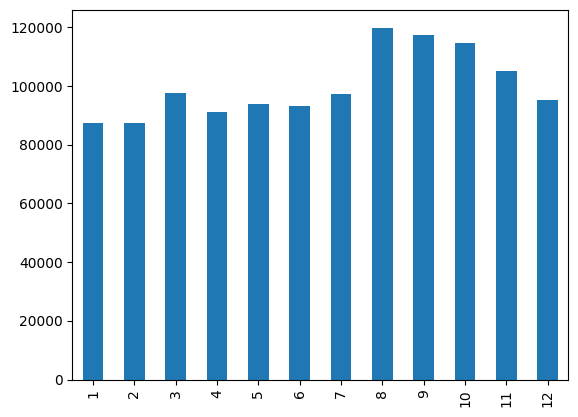

In [ ]:
gisto_month.plot.bar()

In [ ]:
histo_year = histo.map(lambda x: x.year)

In [ ]:
histo_year

0          1996
1          1993
2          2000
3          2010
4          2002
           ... 
1199856    2002
1199857    2002
1199858    2002
1199859    1991
1199860    2007
Name: earliest_cr_line, Length: 1199861, dtype: int64

In [ ]:
gisto = histo_year.value_counts().sort_index()
gisto

1933       1
1934       2
1941       1
1944       2
1945       1
        ... 
2013    9449
2014    5551
2015    1839
2016     214
2017       1
Name: earliest_cr_line, Length: 75, dtype: int64

<Axes: >

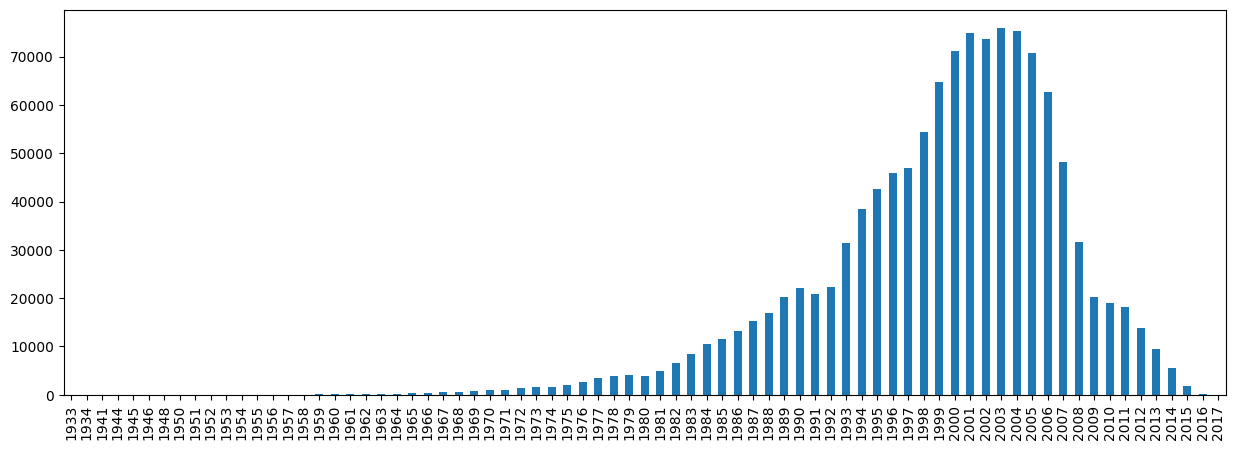

In [ ]:
gisto.plot.bar(figsize=(15, 5))

In [ ]:
# заметим, что разница идёт в основном по годам,а не в течении года по месяцам

# бахнем бакеты bins(1933-1981, 1982-1992, 1993-1997, 1998-2008, >2008)

In [ ]:
# временнАя фича issue_d
histi = rez.issue_d.map(lambda x: make_datetime(x))
histi

0         2016-04-01
1         2017-09-01
2         2016-08-01
3         2015-08-01
4         2017-09-01
             ...    
1199856   2012-06-01
1199857   2013-11-01
1199858   2015-12-01
1199859   2012-06-01
1199860   2015-05-01
Name: issue_d, Length: 1199861, dtype: datetime64[ns]

In [ ]:
histi_year = histi.map(lambda x: x.year)
histi_year

0          2016
1          2017
2          2016
3          2015
4          2017
           ... 
1199856    2012
1199857    2013
1199858    2015
1199859    2012
1199860    2015
Name: issue_d, Length: 1199861, dtype: int64

<Axes: >

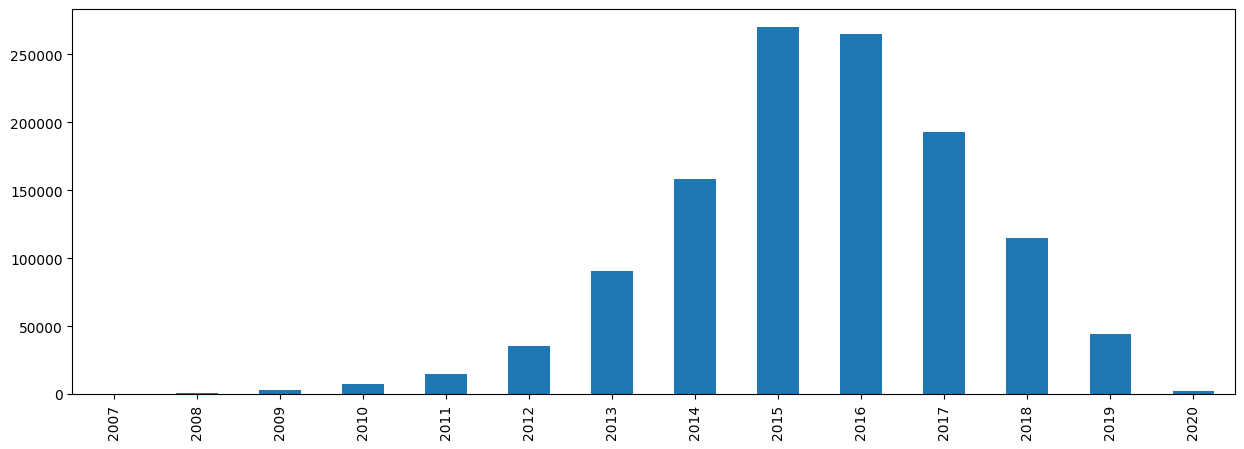

In [ ]:
gisto = histi_year.value_counts().sort_index()
gisto.plot.bar(figsize=(15, 5))

In [ ]:
histi_month = histi.map(lambda x: x.month)
histi_month

0           4
1           9
2           8
3           8
4           9
           ..
1199856     6
1199857    11
1199858    12
1199859     6
1199860     5
Name: issue_d, Length: 1199861, dtype: int64

<Axes: >

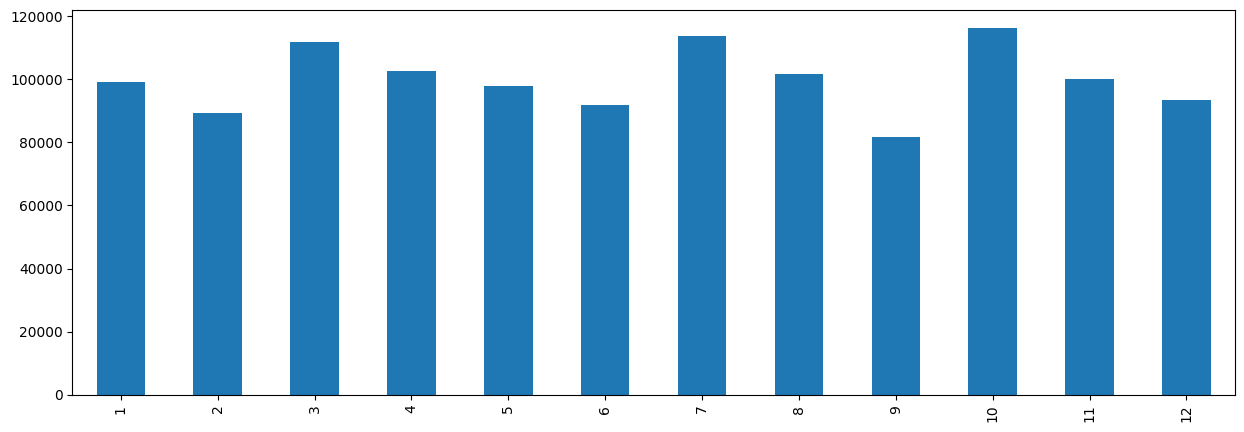

In [ ]:
gisto = histi_month.value_counts().sort_index()
gisto.plot.bar(figsize=(15, 5))

# **woe lib fatures**

In [7]:
!pip install optbinning

from optbinning import OptimalBinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.0 which is incompatible.
(CVXPY) Aug 18 12:54:28 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Aug 18 12:54:28 PM: Encountered unexpected exception import

In [8]:
from sklearn.utils.class_weight import compute_class_weight

def process_f(dataset, y, iv_value=0.02, train_flag=True, woe_list={}):

    cat_feature_names = []
    num_feature_names = []

    for feature in df.columns:
        if df[feature].dtype == "object":
            cat_feature_names.append(feature)
        else:
            num_feature_names.append(feature)

    if train_flag:
        class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
        class_weight = dict(zip([0, 1], list(class_weight)))

    # iv DECREASES
    #dataset.earliest_cr_line = dataset.earliest_cr_line.map(lambda x: make_datetime(x))
    #dataset.issue_d = dataset.issue_d.map(lambda x: make_datetime(x))

    print("CAT features!")

    tables = {}

    for variable_cat in cat_feature_names:

        print(variable_cat)
        if train_flag:
            optb = OptimalBinning(name=variable_cat,
                                  dtype="categorical",
                                  solver="mip",
                                  divergence="iv",
                                  #cat_cutoff=0.1,
                                  max_n_bins=50,
                                  class_weight=class_weight
                                  )

            optb.fit(dataset[variable_cat], y.loan_status)
            woe_list[variable_cat] = optb

        binning_table = woe_list[variable_cat].binning_table
        tbl = binning_table.build()

        print(tbl["IV"]["Totals"])

        if tbl["IV"]["Totals"] > iv_value:

              x_transform_woe = woe_list[variable_cat].transform(dataset[variable_cat], metric="woe")
              tables[variable_cat + "_WOE"] = x_transform_woe



    print("NUM features!")

    for variable_num in num_feature_names:
        print(variable_num)
        if train_flag:
            optb = OptimalBinning(name=variable_num,
                                  dtype="numerical",
                                  solver="cp",
                                  divergence="iv",
                                  #cat_cutoff=0.1,
                                  max_n_bins=50,
                                  class_weight =class_weight
                                  )
            optb.fit(dataset[variable_num], y.loan_status)
            woe_list[variable_num] = optb

        binning_table = woe_list[variable_num].binning_table
        tbl = binning_table.build()

        print(tbl["IV"]["Totals"])

        if tbl["IV"]["Totals"] > iv_value:

              x_transform_woe = woe_list[variable_num].transform(dataset[variable_num], metric="woe")
              tables[variable_num + "_WOE"] = x_transform_woe

    print(len(tables))

    new_ds = pd.DataFrame(data=tables)

    return new_ds, woe_list

In [9]:
df_1 = df.copy()
raw_woe_df, woe_list = process_f(df_1, y, 0.02)

CAT features!
addr_state
0.014212841165398702
earliest_cr_line
0.022273959642120707
emp_length
0.012638602711151244
home_ownership
0.030246738855436255
int_rate
0.491432191520083
issue_d
0.029356498261460293
purpose
0.013155097039318556
revol_util
0.028233549738830497
term
0.1616210410488462
title
0.13058664051563462
verification_status
0.04462156086779432
zip_code
0.0297156949744191
NUM features!
index
7.011010482798587e-05
acc_now_delinq
0.0
annual_inc
0.02326421885139076
chargeoff_within_12_mths
1.1554078802327905e-05
collections_12_mths_ex_med
1.1554078802327905e-05
delinq_2yrs
0.001388699267116671
dti
0.0506512634663176
fico_range_high
0.1112442703828058
fico_range_low
0.1112442703828058
funded_amnt
0.042037860230228284
inq_last_12m
0.020388147659205828
installment
0.03995579378817777
loan_amnt
0.04195746927871204
mort_acc
0.042033000223384256
mths_since_last_delinq
0.0015686220693346745
mths_since_recent_bc_dlq
0.0009279544255238004
mths_since_recent_inq
0.03548023005113559
num_a

In [10]:
raw_woe_df

,earliest_cr_line_WOE,home_ownership_WOE,int_rate_WOE,issue_d_WOE,revol_util_WOE,term_WOE,title_WOE,verification_status_WOE,zip_code_WOE,annual_inc_WOE,...,fico_range_low_WOE,funded_amnt_WOE,inq_last_12m_WOE,installment_WOE,loan_amnt_WOE,mort_acc_WOE,mths_since_recent_inq_WOE,num_tl_op_past_12m_WOE,open_rv_24m_WOE,percent_bc_gt_75_WOE
0,0.04115083522262474869,-0.18793419292369570317,0.09869719077998162504,-0.02919568767224326941,-0.06106245365971331440,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,-0.02815469889780614077,0.04132516515537661139,...,-0.10359046856369766298,-0.16319328697389115512,0.00654482883593169359,-0.14507899243668695433,-0.16194790231459016416,0.35604523991799758020,-0.00129140717534278484,-0.13563881038402009205,-0.10317698021000890063,-0.18207083068414695037
1,0.19622349155047885683,0.18138170616697177340,0.09869719077998162504,-0.28538043099297238925,-0.08452711782706261168,0.26335841501921536389,0.17300302678488768682,0.31153432879226383712,-0.04644846206949125589,0.04132516515537661139,...,-0.10359046856369766298,0.27349338396675765273,0.15034954201544070695,0.24284034624691380744,0.27352119077565795191,0.12245530158270630239,0.00000000000000000000,0.27415013403864568753,0.12696968929123303438,-0.18207083068414695037
2,0.02143997788596225737,0.18138170616697177340,0.65136716207208655849,-0.09271071639994903080,0.38982495124640059725,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,0.15791683670478193213,-0.13069924025260762357,...,-0.26211072691421288816,0.00252181704377939155,0.15034954201544070695,0.02693967691406696022,-0.01706067866175472320,0.22074368191987053800,0.14764801490592921462,0.27415013403864568753,-0.10317698021000890063,0.20761149862301328528
3,-0.32381228495870578721,-0.03275935052412170395,0.24574177834875557402,-0.03934161492564017953,-0.00229762769512755925,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,-0.00124887199184782580,-0.22190473122737303102,...,-0.05137724698382623023,0.42860375474242584648,0.00000000000000000000,0.49745727900789460385,0.42887323128830034946,-0.20418852291227729268,0.14764801490592921462,-0.24788295351134231881,0.00000000000000000000,0.20761149862301328528
4,-0.05550836147266206139,-0.18793419292369570317,-1.18605406484987607740,-0.28538043099297238925,-0.11487037689253794259,-0.62202960739521384603,-0.03991713565140327102,0.31153432879226383712,-0.07404125967299578226,0.00544283984257902358,...,-0.26211072691421288816,-0.16319328697389115512,0.15034954201544070695,-0.14507899243668695433,-0.16321703208039567423,-0.20418852291227729268,0.14764801490592921462,0.27415013403864568753,0.12696968929123303438,-0.18207083068414695037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.02143997788596225737,-0.18793419292369570317,-0.08212256741287564388,-0.02919568767224326941,-0.11487037689253794259,0.26335841501921536389,-0.15999439726858760702,-0.04522797984144508177,0.02248594965508768709,-0.13069924025260762357,...,-0.18358614164836453697,0.00252181704377939155,0.00000000000000000000,-0.10189951456056890733,-0.01706067866175472320,-0.20418852291227729268,-0.28167091627316742652,0.00000000000000000000,0.00000000000000000000,-0.18207083068414695037
1199857,-0.05550836147266206139,-0.18793419292369570317,1.88603648105602084151,0.45622564880295868317,-0.21376470665549687777,0.26335841501921536389,2.01653005196549628408,-0.22940025641191549854,0.15791683670478193213,0.12428167952990003264,...,0.08665930739787951198,-0.16319328697389115512,0.00000000000000000000,-0.14507899243668695433,-0.16194790231459016416,-0.20418852291227729268,0.00000000000000000000,0.27415013403864568753,0.00000000000000000000,-0.18207083068414695037
1199858,-0.09209521641748763532,-0.03275935052412170395,0.09869719077998162504,-0.09271071639994903080,0.38982495124640059725,-0.62202960739521384603,0.11585718116363244445,-0.04522797984144508177,0.15791683670478193213,-0.05568338

In [ ]:
cols_to_del = [
    "fico_range_high_WOE",
    "installment_WOE",
    "loan_amnt_WOE",
    "TARGET"
]

woe_df = raw_woe_df.assign(TARGET=y.loan_status)

woe_df = woe_df.drop_duplicates()

woe_y = woe_df.TARGET

after_corr_woe_df = woe_df.drop(columns=cols_to_del, axis=1)

In [ ]:
after_corr_woe_df

,home_ownership_WOE,int_rate_WOE,term_WOE,title_WOE,verification_status_WOE,dti_WOE,fico_range_low_WOE,funded_amnt_WOE,mort_acc_WOE,mths_since_recent_inq_WOE,num_tl_op_past_12m_WOE,open_rv_24m_WOE
0,-0.187934,0.098697,0.263358,0.173003,-0.045228,-0.331161,-0.103590,-0.163193,0.356045,-0.001291,-0.135639,-0.103177
1,0.181382,0.098697,0.263358,0.173003,0.311534,0.275592,-0.103590,0.273493,0.122455,0.000000,0.274150,0.126970
2,0.181382,0.651367,0.263358,0.173003,-0.045228,0.039541,-0.262111,0.002522,0.220744,0.147648,0.274150,-0.103177
3,-0.032759,0.245742,0.263358,0.173003,-0.045228,0.267020,-0.051377,0.428604,-0.204189,0.147648,-0.247883,0.000000
4,-0.187934,-1.186054,-0.622030,-0.039917,0.311534,0.164608,-0.262111,-0.163193,-0.204189,0.147648,0.274150,0.126970
...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,-0.187934,-0.082123,0.263358,-0.159994,-0.045228,-0.111528,-0.183586,0.002522,-0.204189,-0.281671,0.000000,0.000000
1199857,-0.187934,1.886036,0.263358,2.016530,-0.229400,-0.191072,0.086659,-0.163193,-0.204189,0.000000,0.274150,0.000000
1199858,-0.032759,0.098697,-0.622030,0.115857,-0.045228,0.105240,0.873287,-0.273517,-0.204189,-0.107930,-0.247883,0.000000
1199859,0.181382,-0.626519,-0.622030,0.115857,-0.229400,-0.111528,0.232988,-0.163193,0.122455,-0.281671,0.000000,0.000000


In [ ]:
"""
zip_code                       object
Первые 3 цифры почтового индекса, указанные заемщиком в кредитной заявке.
категория большой размерности около 1000 уникальных,
нужно по-умному закодировать
"""
# стоит ли включать эту фичу вообще?

variable_cat = "zip_code"
optb = OptimalBinning(name=variable_cat,
                      dtype="categorical",
                      solver="mip",
                      #cat_cutoff=0.1
                      )
optb.fit(df_y.zip_code, df_y.TARGET)

# стоит ли включать эту фичу вообще?

binning_table = optb.binning_table
zip_code_table = binning_table.build()
zip_code_table

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[504xx, 987xx, 854xx, 348xx, 858xx, 059xx, 862...",60753,5.063337e-02,52582,8171,0.134495,0.431335,8.206854e-03,1.017977e-03
1,"[980xx, 062xx, 039xx, 970xx, 662xx, 802xx, 252...",65149,5.429712e-02,55224,9925,0.152343,0.285894,4.054573e-03,5.051026e-04
2,"[193xx, 474xx, 028xx, 405xx, 430xx, 152xx, 843...",65468,5.456299e-02,54722,10746,0.164141,0.197285,1.996300e-03,2.491336e-04
3,"[458xx, 427xx, 547xx, 546xx, 998xx, 622xx, 019...",69030,5.753166e-02,57149,11881,0.172114,0.140274,1.083607e-03,1.353399e-04
4,"[995xx, 957xx, 301xx, 304xx, 813xx, 451xx, 164...",64726,5.394458e-02,53261,11465,0.177131,0.105458,5.806084e-04,7.254244e-05
5,"[268xx, 750xx, 295xx, 225xx, 814xx, 945xx, 807...",61691,5.141512e-02,50590,11101,0.179945,0.086272,3.725741e-04,4.655732e-05
6,"[767xx, 534xx, 898xx, 137xx, 494xx, 894xx, 553...",78825,6.569511e-02,64254,14571,0.184853,0.053364,1.840201e-04,2.299978e-05
7,"[110xx, 625xx, 760xx, 189xx, 280xx, 060xx, 996...",60598,5.050418e-02,49191,11407,0.188241,0.031036,4.818546e-05,6.022941e-06
8,"[780xx, 067xx, 587xx, 243xx, 194xx, 615xx, 167...",98198,8.184115e-02,79235,18963,0.193110,-0.000519,2.202463e-08,2.753079e-09
9,"[857xx, 781xx, 027xx, 548xx, 851xx, 140xx, 532...",95297,7.942337e-02,76443,18854,0.197845,-0.030627,7.520059e-05,9.399706e-06


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(woe_df, title="woe Report")

profile.to_file("/content/drive/MyDrive/цфт/woe_ds.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **обычные фичи (стандартизация и импютация)**

In [62]:
# нужно ещё гни-нибуть проверку на наны сделать
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def convert(x):
    if not isinstance(x, str):
        return x
    elif isinstance(x, str):
        return float(x[:-1])


def scalar(X):
    imp = SimpleImputer()
    X = np.array(X).reshape(-1, 1)
    X = imp.fit_transform(X)
    sc = StandardScaler(copy=True, with_mean=True, with_std=True)
    X = np.array(X).reshape(-1, 1)
    sc.fit(X)

    return sc.transform(X)

In [63]:

# 8 фичей
def precess_common_data(df_y):
    # стандартизация + импутация

    feature_8 = [
    "percent_bc_gt_75",
    "revol_util",
    "annual_inc",
    "dti",
    "fico_range_low",
    "installment",
    "int_rate",
    "num_sats"
    ]


    df_y.revol_util = df_y.revol_util.map(lambda x: convert(x))
    df_y.int_rate = df_y.int_rate.map(lambda x: float(x[:-1]))

    for feature in feature_8:
        df_y[feature] = scalar(df_y[feature])

    print(len(feature_8))

    return df_y



In [64]:
final_df = precess_common_data(final).drop(columns=["zip_code", "TARGET"], axis=1)
final_df

8


,acc_now_delinq_woe,addr_state_woe,annual_inc,delinq_2yrs_woe,dti,earliest_cr_line_woe,emp_length_woe,fico_range_low,home_ownership_woe,installment,...,num_tl_op_past_12m_woe,open_il_24m_woe,open_rv_24m_woe,percent_bc_gt_75,pub_rec_woe,purpose_woe,revol_util,term_woe,title_woe,verification_status_woe
0,-0.00019272937319216984,-0.18880165365154724655,0.01385749147331075473,-0.01620580369929851619,1.48146774415682203063,-0.10385309099739274685,-0.07038617590791794443,-0.37724185439003687925,0.18794286077244276578,0.39345852198179509518,...,0.13563045481634256051,0.08965011752834366188,0.15437590710505985636,1.60203334473788983061,0.16772986802529316064,-0.17356878062594033318,0.22169934468524429838,-0.26335666406892638269,-0.14465451235148199527,0.04522562187226732838
1,-0.00019272937319216984,-0.00032394154447643947,0.02852547885573620753,-0.01620580369929851619,-1.31340546716910511194,-0.10385309099739274685,-0.07038617590791794443,-0.37724185439003687925,-0.18138330083125522862,-0.83863315524209458562,...,-0.27414859622680010087,-0.00212295248968366081,-0.07092230225625970053,1.60203334473788983061,0.16772986802529316064,-0.17356878062594033318,1.52458378040152253696,-0.26335666406892638269,-0.14465451235148199527,-0.31153397948090921776
2,-0.00019272937319216984,0.10992727433688360972,-0.23491157453262492827,0.03903939441141005690,-0.08551736410892750440,0.04266433002060939644,0.01732100943921338274,-0.84105871153689526487,-0.18138330083125522862,-0.44524854503349409196,...,-0.27414859622680010087,-0.00212295248968366081,0.15437590710505985636,-1.21767244733660606748,-0.03548822946843466913,-0.17356878062594033318,-1.31586613845819000446,-0.26335666406892638269,-0.14465451235148199527,0.04522562187226732838
3,-0.00019272937319216984,-0.03382825774029413202,-0.35284219308732556186,-0.01620580369929851619,-1.21822034290087422015,0.25754555075482948867,0.19821797365176904715,-0.22263623534108406554,0.03251412635350500041,-1.27602645942716130811,...,0.31889566387756007604,-0.08286368395762092054,-0.08286368395762092054,-1.21767244733660606748,-0.03548822946843466913,-0.38922444660808708239,-0.69679372024517582940,-0.26335666406892638269,-0.09546696779531570198,0.04522562187226732838
4,-0.00019272937319216984,-0.01766266567595480008,-0.05948244543881650581,-0.01620580369929851619,-0.55668372923667019947,0.04266433002060939644,0.19821797365176904715,-0.84105871153689526487,0.18794286077244276578,0.63376116650501601590,...,-0.27414859622680010087,0.19743418252876626662,-0.07092230225625970053,1.60203334473788983061,-0.03548822946843466913,0.02969815581657150524,1.53672245526844442054,0.62202381084591018556,-0.09546696779531570198,-0.31153397948090921776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,-0.00019272937319216984,-0.11763292414837504818,-0.27216826248398556798,-0.01620580369929851619,0.58672757603545244720,0.04266433002060939644,-0.07038617590791794443,-0.53184747343898963745,0.18794286077244276578,-0.33059830951894186857,...,-0.28878880684740149132,-0.08286368395762092054,-0.08286368395762092054,1.60203334473788983061,-0.03548822946843466913,0.07083377036921863212,1.27371783315180420182,-0.26335666406892638269,-0.09546696779531570198,0.04522562187226732838
1199857,-0.00019272937319216984,0.12459007928197218806,0.12386739684150165075,-0.01620580369929851619,0.90321811422731990149,0.04266433002060939644,0.01732100943921338274,0.24118062180577434783,0.18794286077244276578,0.31143542165669191313,...,-0.27414859622680010087,-0.08286368395762092054,-0.08286368395762092054,1.13114247746144891416,-0.03548822946843466913,-0.17356878062594033318,1.28181028306308575360,-0.26335666406892638269,-0.09546696779531570198,0.22940315238119249330
1199858,-0.00019272937319216984,-0.04046783891862346105,-0.12548838865973105383,-0.01620580369929851619,-0.29254500939232958023,0.04266433002060939644,-0.01719557354149258213,2.25105366944216056524,0.03251412635350500041,0.87967871336316538766,...,0

# **afterwords train SEARCH**

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   acc_now_delinq_woe         1199861 non-null  float64
 1   addr_state_woe             1199861 non-null  float64
 2   annual_inc                 1199861 non-null  float64
 3   delinq_2yrs_woe            1199861 non-null  float64
 4   dti                        1199861 non-null  float64
 5   earliest_cr_line_woe       1199861 non-null  float64
 6   emp_length_woe             1199861 non-null  float64
 7   fico_range_low             1199861 non-null  float64
 8   home_ownership_woe         1199861 non-null  float64
 9   installment                1199861 non-null  float64
 10  int_rate                   1199861 non-null  float64
 11  issue_d_woe                1199861 non-null  float64
 12  mort_acc_woe               1199861 non-null  float64
 13  num_accts_ev

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(final_df, title="train afterwords Report")

profile.to_file("/content/drive/MyDrive/цфт/afterwords_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **handle with test data**

In [65]:
test_ds = to_sumbit_data.copy()

In [66]:
# КАКОГО-ТО ХРЕНА ОДИН ПРИЗНАК ОТЛИЧАЕТСЯ НА ТЕСТЕ ОТ ТРЭЙНА

# num_tl_120dpd_2m - категория, но хорошо что мы исключаем данный признак

# исключим данные

# нужно сверить: тип данных, масштаб, процентное соотношение, графики распределений

cols_to_del = ["zip_code"]

cols_to_del = cols_to_del + cols + badinfo_cols

print(len(cols_to_del))

test_ds = test_ds.drop(columns=cols_to_del, axis=1)

18


In [67]:
test = process_data_woe(test_ds, False, woe_list)
test_df = precess_common_data(test)
test_df

0
8


,acc_now_delinq,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,home_ownership,installment,...,num_tl_op_past_12m,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,purpose,revol_util,term,title,verification_status
0,0.00000000000000000000,GA,-0.42282865811141112644,0.00000000000000000000,2.01104175841842147676,2009,8 years,-0.99784456388025621898,MORTGAGE,0.00809140315285835146,...,4.00000000000000000000,3.00000000000000000000,3.00000000000000000000,0.89789983322573263536,0.00000000000000000000,debt_consolidation,0.44956494557178994231,60 months,Debt consolidation,Verified
1,0.00000000000000000000,PA,-0.45892782107008650572,0.00000000000000000000,0.26073240720924001357,1982,5 years,0.08334019065575901108,OWN,-1.01955226942374799215,...,NaN,NaN,NaN,-0.00000000000000060126,0.00000000000000000000,debt_consolidation,0.32416308240441837896,60 months,POFF,Not Verified
2,0.00000000000000000000,OH,-0.07914703689797526753,0.00000000000000000000,-0.24665530016775974453,1997,3 years,-0.07111477427795744044,MORTGAGE,1.56196330206918054806,...,1.00000000000000000000,NaN,NaN,-0.08933166221006398622,0.00000000000000000000,credit_card,-0.17744437026506762467,36 months,credit crd,Verified
3,0.00000000000000000000,LA,0.56048375749715950711,0.00000000000000000000,0.81683884058731004441,2001,10+ years,2.55461962959522237426,MORTGAGE,-0.76114272006543504112,...,5.00000000000000000000,2.00000000000000000000,6.00000000000000000000,-1.21759622842240289309,0.00000000000000000000,other,-1.89666346207580605032,36 months,Other,Not Verified
4,0.00000000000000000000,IN,-0.30568294324625217007,1.00000000000000000000,0.61364610531455354714,1990,10+ years,-0.38002470414539035737,MORTGAGE,-0.39312442190427870914,...,1.00000000000000000000,3.00000000000000000000,0.00000000000000000000,0.19273447934302076479,0.00000000000000000000,credit_card,0.70845911469152433870,36 months,Credit card refinancing,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590972,0.00000000000000000000,CA,-0.51889320804463046066,1.00000000000000000000,1.03547897678723499482,2007,3 years,-0.22556973921167389197,RENT,-0.44286380220214205394,...,0.00000000000000000000,NaN,NaN,0.19273447934302076479,0.00000000000000000000,credit_card,0.73273044304649981306,36 months,Credit card refinancing,Source Verified
590973,0.00000000000000000000,IL,0.02745809550121386389,1.00000000000000000000,0.53284431584936386983,1991,10+ years,-0.84338959894653975358,MORTGAGE,0.68137518863408341740,...,11.00000000000000000000,NaN,NaN,-0.74654577202875138653,0.00000000000000000000,debt_consolidation,0.15830900531208824678,36 months,Debt consolidation,Verified
590974,0.00000000000000000000,OH,-0.47891628339493447220,0.00000000000000000000,0.42114772452983728623,1976,10+ years,0.23779515558947547649,MORTGAGE,-0.04020625597695100251,...,1.00000000000000000000,NaN,NaN,1.60306518710844447817,0.00000000000000000000,debt_consolidation,0.69227822912154124424,60 months,Debt consolidation,Source Verified
590975,0.00000000000000000000,NJ,0.16071451100020026082,0.00000000000000000000,0.18230714096361472221,2003,2 years,0.85561501532434125483,MORTGAGE,-0.89567806906331759453,...,4.00000000000000000000,NaN,NaN,-0.81424164600149173676,0.00000000000000000000,debt_consolidation,-0.84086067863438795911,36 months,Debt consolidation,Not Verified


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590977 entries, 0 to 590976
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   acc_now_delinq_woe         590977 non-null  float64
 1   addr_state_woe             590977 non-null  float64
 2   annual_inc                 590977 non-null  float64
 3   delinq_2yrs_woe            590977 non-null  float64
 4   dti                        590977 non-null  float64
 5   earliest_cr_line_woe       590977 non-null  float64
 6   emp_length_woe             590977 non-null  float64
 7   fico_range_low             590977 non-null  float64
 8   home_ownership_woe         590977 non-null  float64
 9   installment                590977 non-null  float64
 10  int_rate                   590977 non-null  float64
 11  issue_d_woe                590977 non-null  float64
 12  mort_acc_woe               590977 non-null  float64
 13  num_accts_ever_120_pd_woe  59

# **BASELINE**

In [11]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00


# **metrics**

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def repeat_part(model):
        # fit model
    model.fit(X_train, y_train)

    # make predictions
    print("test gini:")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    training_gini = calc_metrics(y_test, y_pred, y_proba)

    print("val gini:")
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)
    val_gini = calc_metrics(y_val, y_pred, y_proba)

    return training_gini


def calc_metrics(y_test, y_pred, y_prob):

    acc = accuracy_score(y_test, y_pred)
    b_acc = balanced_accuracy_score(y_test, y_pred)

    auc = roc_auc_score(y_test, y_prob[:,1])
    gini = 2*auc - 1

    print(confusion_matrix(y_test, y_pred))


    print("-----------------------------------")
    print("gini: ", gini)
    print("acc: ", acc)
    print("balancde_acc: ", b_acc)
    print("auc: ", auc)
    print("-----------------------------------")

    return gini

# **LOGREG**

In [12]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression


def lr_model_opt(trial):

    class_weight = None
    if True:
        class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
        class_weight = dict(zip([0, 1], list(class_weight)))

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    C = trial.suggest_float('C', 0.0001, 1)
    solver = trial.suggest_categorical("solver", ("lbfgs", "saga", "newton-cholesky"))

    # create model instance
    lr = LogisticRegression(penalty='l2',
                            tol=0.0001,
                            C=C,
                            fit_intercept=True,
                            intercept_scaling=1,
                            class_weight=class_weight,
                            random_state=None,
                            solver=solver,
                            max_iter=100,
                            verbose=0,
                            warm_start=False,
                            n_jobs=-1,
                            l1_ratio=None) # for elasticnet

    training_gini = repeat_part(lr)

    return training_gini  # An objective value linked with the Trial object.


## **XGBoost**

In [13]:
# baseline
# sklearn API

from xgboost import XGBClassifier
# read data

import optuna

from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def xgboost_model_opt(trial):

    class_weight = None
    if True:
        class_weight = compute_class_weight(class_weight="balanced", classes=[0, 1], y=y.loan_status)
        class_weight = dict(zip([0, 1], list(class_weight)))

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1)

    # create model instance
    bst = XGBClassifier(n_estimators=n_estimators,
                        booster="gbtree",
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        objective='binary:logistic',
                        class_weight=class_weight
                        )

    training_gini = repeat_part(bst)

    return training_gini  # An objective value linked with the Trial object.

# **lightGBM**

In [28]:
# baseline
# sklearn API

from lightgbm import LGBMClassifier
# read data

import optuna

from sklearn.utils.class_weight import compute_class_weight

def lightGMB_model_opt(trial):

    class_weight = None
    if True:
        class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
        class_weight = dict(zip([0, 1], list(class_weight)))

    print("Start iteration")

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 5, 250)
    max_depth = trial.suggest_int('max_depth', 1, 10)

    #  2^max_depth > num_leaves.
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1)

    max_num_l = 2**max_depth - 1

    if max_num_l <= 2:
        max_num_l = 100


    num_leaves = trial.suggest_int('num_leaves', 2, max_num_l)


    # create model instance
    bst = LGBMClassifier(n_estimators=n_estimators,
                        boosting_type="gbdt",
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        objective='binary',
                        num_leaves=num_leaves,
                        class_weight=class_weight
                        )

    training_gini = repeat_part(bst)

    return training_gini  # An objective value linked with the Trial object.

# **catBoost**

In [14]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00


In [45]:
# baseline
# sklearn API

from catboost import CatBoostClassifier
# read data

import optuna

from sklearn.utils.class_weight import compute_class_weight

def catboost_model_opt(trial):

    class_weight = None
    if False:
        class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
        class_weight = dict(zip([0, 1], list(class_weight)))

    print("Start iteration")

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 5, 250)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1)

    """
    if 2**max_depth+1 > 5:
        max_num_l = 2**max_depth+1
    else:
        max_num_l = 100

    max_leaves = trial.suggest_int('max_leaves', 5, max_num_l)
    """

    # create model instance
    bst = CatBoostClassifier(n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        loss_function='Logloss',
                        #max_leaves=max_leaves,
                        class_weights=class_weight
                        )

    training_gini = repeat_part(bst)

    return training_gini  # An objective value linked with the Trial object.

# **MLP**

In [19]:
# baseline
# sklearn API

from sklearn.neural_network import MLPClassifier
# read data

import optuna

def mlp_model_opt(trial):

    print("Start iteration")

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 50, 250)
    alpha = trial.suggest_float('alpha', 0.00001, 1)


    # create model instance
    bst = MLPClassifier(alpha=alpha,
                        hidden_layer_sizes=hidden_layer_sizes,
                        max_iter=200,
                        learning_rate_init=0.001,
                        learning_rate="adaptive"
                        )

    training_gini = repeat_part(bst)

    return training_gini  # An objective value linked with the Trial object.

# **Тесты**

In [ ]:
# 2 with deleted corr data - df_after_cor
# 3 with deleted loss-info data
# 4

# **raw data without object**

In [ ]:
object_feature_names = [
    "addr_state",
    "earliest_cr_line",
    "emp_length",
    "home_ownership" ,
    "int_rate" ,
    "issue_d" ,
    "purpose" ,
    "revol_util",
    "term",
    "title" ,
    "verification_status" ,
    "zip_code"
]

df_obj = df.copy()

for i in object_feature_names:
    df_obj = df_obj.drop(columns=[i], axis=1)
df_obj.dtypes

"""
gini:  0.29299895424500333
acc:  0.6422609048064164
balancde_acc:  0.6464994771225017
"""

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_obj,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)



lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

# **fully processed data**

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dataf,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)


In [97]:
lightGMB_model = optuna.create_study(direction="maximize")  # Create a new study.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-18 15:28:55,444] A new study created in memory with name: no-name-64b97178-07bb-4660-8e9f-5b2221cb98cc


Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.153564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2023-08-18 15:29:19,224] Trial 0 finished with value: 0.4660706150932472 and parameters: {'n_estimators': 191, 'max_depth': 6, 'learning_rate': 0.6670571825302706, 'num_leaves': 27}. Best is trial 0 with value: 0.4660706150932472.


[[96313 48926]
 [11483 23258]]
-----------------------------------
gini:  0.4578692557913997
acc:  0.6643571507945327
balancde_acc:  0.6663014545189645
auc:  0.7289346278956998
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.153209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79092 44361]
 [ 8909 20621]]
-----------------------------------
gini:  0.4660040059775721
acc:  0.6517913755123118


[I 2023-08-18 15:29:37,257] Trial 1 finished with value: 0.4660040059775721 and parameters: {'n_estimators': 212, 'max_depth': 2, 'learning_rate': 0.6708260065775051, 'num_leaves': 2}. Best is trial 0 with value: 0.4660706150932472.


[[92975 52264]
 [10563 24178]]
-----------------------------------
gini:  0.4610404731581905
acc:  0.6509223247027448
balancde_acc:  0.6680508900490001
auc:  0.7305202365790953
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.409099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:30:05,853] Trial 2 finished with value: 0.4814264850081251 and parameters: {'n_estimators': 188, 'max_depth': 4, 'learning_rate': 0.10718492014398602, 'num_leaves': 15}. Best is trial 2 with value: 0.4814264850081251.


[[94684 50555]
 [10544 24197]]
-----------------------------------
gini:  0.47759164225372075
acc:  0.6605233914879431
balancde_acc:  0.6742077481383202
auc:  0.7387958211268604
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[73387 50066]
 [ 8791 20739]]
-----------------------------------
gini:  0.4166662893591131
acc:  0.6152709778210651

[I 2023-08-18 15:30:18,402] Trial 3 finished with value: 0.4166662893591131 and parameters: {'n_estimators': 88, 'max_depth': 3, 'learning_rate': 0.019788669870786015, 'num_leaves': 6}. Best is trial 2 with value: 0.4814264850081251.


[[86443 58796]
 [10383 24358]]
-----------------------------------
gini:  0.4130524590423077
acc:  0.6156295143904879
balancde_acc:  0.6481544160217103
auc:  0.7065262295211538
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:30:40,354] Trial 4 finished with value: 0.47681047833905055 and parameters: {'n_estimators': 180, 'max_depth': 4, 'learning_rate': 0.6753825160192353, 'num_leaves': 13}. Best is trial 2 with value: 0.4814264850081251.


[[95432 49807]
 [10816 23925]]
-----------------------------------
gini:  0.47452636279534577
acc:  0.6631681297921991
balancde_acc:  0.6728681311246727
auc:  0.7372631813976729
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[75048 48405]
 [ 8982 20548]]
-----------------------------------
gini:  0.4252141956877278
acc:  0.6248798886150749

[I 2023-08-18 15:30:46,692] Trial 5 finished with value: 0.4252141956877278 and parameters: {'n_estimators': 21, 'max_depth': 4, 'learning_rate': 0.08483377140938858, 'num_leaves': 9}. Best is trial 2 with value: 0.4814264850081251.


[[88327 56912]
 [10579 24162]]
-----------------------------------
gini:  0.4214861228251736
acc:  0.6250083342593622
balancde_acc:  0.6518194027862427
auc:  0.7107430614125868
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.144498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:31:30,831] Trial 6 finished with value: 0.48614277237180126 and parameters: {'n_estimators': 232, 'max_depth': 6, 'learning_rate': 0.08567802986802474, 'num_leaves': 40}. Best is trial 6 with value: 0.48614277237180126.


[[95333 49906]
 [10627 24114]]
-----------------------------------
gini:  0.48231634065963713
acc:  0.6636681853539282
balancde_acc:  0.6752474425299289
auc:  0.7411581703298186
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.216171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 15:32:08,118] Trial 7 finished with value: 0.4780076550449657 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.04719855903031361, 'num_leaves': 939}. Best is trial 6 with value: 0.48614277237180126.


[[95408 49831]
 [10964 23777]]
-----------------------------------
gini:  0.4726619248932904
acc:  0.6622124680520057
balancde_acc:  0.6706554606185464
auc:  0.7363309624466452
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[67785 55668]
 [ 8103 21427]]
-----------------------------------
gini:  0.3801993568578106
acc:  0.5831497617382323


[I 2023-08-18 15:32:12,278] Trial 8 finished with value: 0.3801993568578106 and parameters: {'n_estimators': 8, 'max_depth': 1, 'learning_rate': 0.15181196157475005, 'num_leaves': 93}. Best is trial 6 with value: 0.48614277237180126.


[[79777 65462]
 [ 9560 25181]]
-----------------------------------
gini:  0.37720862945520595
acc:  0.5831647960884543
balancde_acc:  0.6370508287239014
auc:  0.688604314727603
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:33:16,617] Trial 9 finished with value: 0.48204332017930307 and parameters: {'n_estimators': 221, 'max_depth': 9, 'learning_rate': 0.107233451579152, 'num_leaves': 320}. Best is trial 6 with value: 0.48614277237180126.


[[99030 46209]
 [11672 23069]]
-----------------------------------
gini:  0.47720738089902004
acc:  0.6784031559062118
balancde_acc:  0.6729348738540742
auc:  0.73860369044951
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.216091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 15:33:40,353] Trial 10 finished with value: 0.4746189416582647 and parameters: {'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.3807050651032401, 'num_leaves': 52}. Best is trial 6 with value: 0.48614277237180126.


[[96542 48697]
 [11260 23481]]
-----------------------------------
gini:  0.47017690825076586
acc:  0.6668685409489943
balancde_acc:  0.6702992745853285
auc:  0.7350884541253829
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 15:34:42,753] Trial 11 finished with value: 0.43923738240680676 and parameters: {'n_estimators': 242, 'max_depth': 9, 'learning_rate': 0.31716734675214814, 'num_leaves': 337}. Best is trial 6 with value: 0.48614277237180126.


[[103560  41679]
 [ 13938  20803]]
-----------------------------------
gini:  0.43730220726581703
acc:  0.6909823313701522
balancde_acc:  0.6559170956544416
auc:  0.7186511036329085
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2023-08-18 15:35:37,410] Trial 12 finished with value: 0.46367308192920964 and parameters: {'n_estimators': 242, 'max_depth': 8, 'learning_rate': 0.2715807984081418, 'num_leaves': 172}. Best is trial 6 with value: 0.48614277237180126.


[[99940 45299]
 [12521 22220]]
-----------------------------------
gini:  0.4580733785458042
acc:  0.678742082453606
balancde_acc:  0.663848649254577
auc:  0.7290366892729021
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2023-08-18 15:36:01,131] Trial 13 finished with value: 0.4405977414065365 and parameters: {'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.9857509325763845, 'num_leaves': 49}. Best is trial 6 with value: 0.48614277237180126.


[[96074 49165]
 [12053 22688]]
-----------------------------------
gini:  0.4306391639786058
acc:  0.6598622069118791
balancde_acc:  0.657275109246392
auc:  0.7153195819893029
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 15:37:07,689] Trial 14 finished with value: 0.4661559773955499 and parameters: {'n_estimators': 217, 'max_depth': 10, 'learning_rate': 0.17236367415247295, 'num_leaves': 554}. Best is trial 6 with value: 0.48614277237180126.


[[103145  42094]
 [ 13221  21520]]
-----------------------------------
gini:  0.4595911625987812
acc:  0.6926602955883987
balancde_acc:  0.6648076353959897
auc:  0.7297955812993906
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[77067 46386]
 [ 8858 20672]]
-----------------------------------
gini:  0.44521282695691666
acc:  0.638887981017

[I 2023-08-18 15:37:54,786] Trial 15 finished with value: 0.44521282695691666 and parameters: {'n_estimators': 158, 'max_depth': 8, 'learning_rate': 0.0037707837186779225, 'num_leaves': 143}. Best is trial 6 with value: 0.48614277237180126.


[[90518 54721]
 [10518 24223]]
-----------------------------------
gini:  0.44037150178788576
acc:  0.6375208356484053
balancde_acc:  0.6602400679019708
auc:  0.7201857508939429
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 15:38:20,041] Trial 16 finished with value: 0.47727277020157666 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.24593295937232573, 'num_leaves': 203}. Best is trial 6 with value: 0.48614277237180126.


[[97516 47723]
 [11371 23370]]
-----------------------------------
gini:  0.47413490964286065
acc:  0.6716635181686854
balancde_acc:  0.6720548323987983
auc:  0.7370674548214303
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 15:38:49,383] Trial 17 finished with value: 0.48148503447237334 and parameters: {'n_estimators': 221, 'max_depth': 5, 'learning_rate': 0.39600723552313877, 'num_leaves': 22}. Best is trial 6 with value: 0.48614277237180126.


[[95937 49302]
 [10871 23870]]
-----------------------------------
gini:  0.475957393409306
acc:  0.6656684076008446
balancde_acc:  0.6738150729668442
auc:  0.737978696704653
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80504 42949]
 [ 8895 20635]]
-----------------------------------
gini:  0.4817893761488834
acc:  0.6611126726499023
ba

[I 2023-08-18 15:39:02,118] Trial 18 finished with value: 0.4817893761488834 and parameters: {'n_estimators': 45, 'max_depth': 7, 'learning_rate': 0.21533280210030298, 'num_leaves': 73}. Best is trial 6 with value: 0.48614277237180126.


[[94745 50494]
 [10613 24128]]
-----------------------------------
gini:  0.4777175276502048
acc:  0.6604789421046783
balancde_acc:  0.6734246838785758
auc:  0.7388587638251024
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:40:08,478] Trial 19 finished with value: 0.47512567269746775 and parameters: {'n_estimators': 248, 'max_depth': 9, 'learning_rate': 0.15739448679789367, 'num_leaves': 322}. Best is trial 6 with value: 0.48614277237180126.


[[100653  44586]
 [ 12362  22379]]
-----------------------------------
gini:  0.4687848577832856
acc:  0.68358706522947
balancde_acc:  0.6685915865813024
auc:  0.7343924288916428
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[74442 49011]
 [ 8766 20764]]
-----------------------------------
gini:  0.4269044852497832
acc:  0.622330585751358

[I 2023-08-18 15:40:38,956] Trial 20 finished with value: 0.4269044852497832 and parameters: {'n_estimators': 168, 'max_depth': 5, 'learning_rate': 0.006631968901614438, 'num_leaves': 21}. Best is trial 6 with value: 0.48614277237180126.


[[87545 57694]
 [10370 24371]]
-----------------------------------
gini:  0.42275889405235234
acc:  0.6218246471830203
balancde_acc:  0.6521352616972962
auc:  0.7113794470261762
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80472 42981]
 [ 8951 20579]]
-----------------------------------
gini:  0.48175632230649734
acc:  0.660537445337063

[I 2023-08-18 15:40:53,755] Trial 21 finished with value: 0.48175632230649734 and parameters: {'n_estimators': 52, 'max_depth': 7, 'learning_rate': 0.2088671830520264, 'num_leaves': 40}. Best is trial 6 with value: 0.48614277237180126.


[[94677 50562]
 [10620 24121]]
-----------------------------------
gini:  0.47778650969076075
acc:  0.6600622291365708
balancde_acc:  0.6730898414594042
auc:  0.7388932548453804
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 15:41:09,268] Trial 22 finished with value: 0.4793817397556108 and parameters: {'n_estimators': 53, 'max_depth': 7, 'learning_rate': 0.13225684987314057, 'num_leaves': 78}. Best is trial 6 with value: 0.48614277237180126.


[[94331 50908]
 [10657 24084]]
-----------------------------------
gini:  0.47519281421821136
acc:  0.657934214912768
balancde_acc:  0.6713661893211368
auc:  0.7375964071091057
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 15:41:38,818] Trial 23 finished with value: 0.4758492550469011 and parameters: {'n_estimators': 104, 'max_depth': 9, 'learning_rate': 0.21385689927646198, 'num_leaves': 286}. Best is trial 6 with value: 0.48614277237180126.


[[98468 46771]
 [11637 23104]]
-----------------------------------
gini:  0.47149488446945953
acc:  0.6754750527836426
balancde_acc:  0.6715038593923275
auc:  0.7357474422347298
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3058
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79109 44344]
 [ 8844 20686]]
-----------------------------------
gini:  0.47056882884028894
acc:  0.652327382781093

[I 2023-08-18 15:41:53,366] Trial 24 finished with value: 0.47056882884028894 and parameters: {'n_estimators': 54, 'max_depth': 6, 'learning_rate': 0.08635652577908187, 'num_leaves': 39}. Best is trial 6 with value: 0.48614277237180126.


[[92981 52258]
 [10476 24265]]
-----------------------------------
gini:  0.46640664532310017
acc:  0.6514390487831981
balancde_acc:  0.6693236685099924
auc:  0.7332033226615501
-----------------------------------


In [ ]:
# {'n_estimators': 188, 'max_depth': 4, 'learning_rate': 0.10718492014398602, 'num_leaves': 15}  Best is trial 6 with value: 0.48614277237180126.

In [70]:
cat_model = optuna.create_study(direction="maximize")  # Create a new cat_model.
cat_model.optimize(catboost_model_opt, n_trials=25)  # Invoke optimization of the cat_model function.
final_cat_model = cat_model.best_trial

# Best is trial 23 with value: 0.4745467877262408. without class_weight

[I 2023-08-18 14:49:44,127] A new study created in memory with name: no-name-76560a95-80e8-43b6-96ed-e42bc2a247e3


Start iteration
0:	learn: 0.6479303	total: 275ms	remaining: 28s
1:	learn: 0.6128752	total: 470ms	remaining: 23.7s
2:	learn: 0.5836793	total: 650ms	remaining: 21.7s
3:	learn: 0.5594682	total: 833ms	remaining: 20.6s
4:	learn: 0.5401691	total: 1.02s	remaining: 20s
5:	learn: 0.5242561	total: 1.21s	remaining: 19.6s
6:	learn: 0.5118696	total: 1.41s	remaining: 19.3s
7:	learn: 0.5018593	total: 1.57s	remaining: 18.6s
8:	learn: 0.4931964	total: 1.75s	remaining: 18.2s
9:	learn: 0.4866562	total: 1.92s	remaining: 17.8s
10:	learn: 0.4808284	total: 2.1s	remaining: 17.5s
11:	learn: 0.4763087	total: 2.2s	remaining: 16.7s
12:	learn: 0.4724401	total: 2.31s	remaining: 16s
13:	learn: 0.4691925	total: 2.42s	remaining: 15.4s
14:	learn: 0.4664352	total: 2.53s	remaining: 14.8s
15:	learn: 0.4643210	total: 2.65s	remaining: 14.4s
16:	learn: 0.4621215	total: 2.75s	remaining: 13.9s
17:	learn: 0.4604875	total: 2.87s	remaining: 13.5s
18:	learn: 0.4589307	total: 2.98s	remaining: 13.2s
19:	learn: 0.4578973	total: 3.08s

[I 2023-08-18 14:50:00,170] Trial 0 finished with value: 0.4251028289264043 and parameters: {'n_estimators': 103, 'max_depth': 3, 'learning_rate': 0.08902140552414012}. Best is trial 0 with value: 0.4251028289264043.


[[144175   1064]
 [ 33446   1295]]
-----------------------------------
gini:  0.4232019126010673
acc:  0.808256472941438
balancde_acc:  0.5149749926111006
auc:  0.7116009563005337
-----------------------------------
Start iteration
0:	learn: 0.6643643	total: 130ms	remaining: 16.3s
1:	learn: 0.6391303	total: 266ms	remaining: 16.5s
2:	learn: 0.6166293	total: 402ms	remaining: 16.5s
3:	learn: 0.5970620	total: 528ms	remaining: 16.1s
4:	learn: 0.5797385	total: 666ms	remaining: 16.1s
5:	learn: 0.5649418	total: 812ms	remaining: 16.2s
6:	learn: 0.5515363	total: 945ms	remaining: 16.1s
7:	learn: 0.5400393	total: 1.08s	remaining: 15.9s
8:	learn: 0.5300358	total: 1.21s	remaining: 15.8s
9:	learn: 0.5211162	total: 1.33s	remaining: 15.5s
10:	learn: 0.5129797	total: 1.48s	remaining: 15.4s
11:	learn: 0.5061002	total: 1.61s	remaining: 15.3s
12:	learn: 0.4998585	total: 1.74s	remaining: 15.1s
13:	learn: 0.4945413	total: 1.88s	remaining: 15s
14:	learn: 0.4901014	total: 2s	remaining: 14.8s
15:	learn: 0.48560

[I 2023-08-18 14:50:18,687] Trial 1 finished with value: 0.42891979969020433 and parameters: {'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.05428253132237151}. Best is trial 1 with value: 0.42891979969020433.


[[143996   1243]
 [ 33214   1527]]
-----------------------------------
gini:  0.427643044532414
acc:  0.8085509501055673
balancde_acc:  0.5176977612135846
auc:  0.713821522266207
-----------------------------------
Start iteration
0:	learn: 0.4705485	total: 134ms	remaining: 29.4s
1:	learn: 0.4526111	total: 272ms	remaining: 29.7s
2:	learn: 0.4489180	total: 400ms	remaining: 29s
3:	learn: 0.4475593	total: 540ms	remaining: 29.2s
4:	learn: 0.4466356	total: 718ms	remaining: 30.9s
5:	learn: 0.4459918	total: 962ms	remaining: 34.3s
6:	learn: 0.4453770	total: 1.19s	remaining: 36.2s
7:	learn: 0.4448096	total: 1.45s	remaining: 38.3s
8:	learn: 0.4444979	total: 1.66s	remaining: 38.8s
9:	learn: 0.4441597	total: 1.88s	remaining: 39.5s
10:	learn: 0.4438935	total: 2.11s	remaining: 40.2s
11:	learn: 0.4435830	total: 2.35s	remaining: 40.7s
12:	learn: 0.4433097	total: 2.56s	remaining: 40.8s
13:	learn: 0.4429946	total: 2.79s	remaining: 41.1s
14:	learn: 0.4428751	total: 3.03s	remaining: 41.4s
15:	learn: 0.442

[I 2023-08-18 14:50:54,132] Trial 2 finished with value: 0.4385690836374103 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.7176482537485959}. Best is trial 2 with value: 0.4385690836374103.


[[142517   2722]
 [ 31749   2992]]
-----------------------------------
gini:  0.4356657105882209
acc:  0.8084731636848539
balancde_acc:  0.5336907510372328
auc:  0.7178328552941105
-----------------------------------
Start iteration
0:	learn: 0.4756009	total: 138ms	remaining: 12.8s
1:	learn: 0.4638505	total: 282ms	remaining: 13s
2:	learn: 0.4608265	total: 434ms	remaining: 13.2s
3:	learn: 0.4587154	total: 576ms	remaining: 13s
4:	learn: 0.4569936	total: 726ms	remaining: 12.9s
5:	learn: 0.4551572	total: 880ms	remaining: 12.9s
6:	learn: 0.4544895	total: 1.03s	remaining: 12.8s
7:	learn: 0.4538828	total: 1.18s	remaining: 12.6s
8:	learn: 0.4532338	total: 1.33s	remaining: 12.5s
9:	learn: 0.4525939	total: 1.48s	remaining: 12.4s
10:	learn: 0.4520803	total: 1.64s	remaining: 12.4s
11:	learn: 0.4515059	total: 1.8s	remaining: 12.3s
12:	learn: 0.4508609	total: 1.95s	remaining: 12.2s
13:	learn: 0.4502400	total: 2.1s	remaining: 12s
14:	learn: 0.4499119	total: 2.19s	remaining: 11.6s
15:	learn: 0.4496595

[I 2023-08-18 14:51:05,702] Trial 3 finished with value: 0.42446036783813534 and parameters: {'n_estimators': 94, 'max_depth': 1, 'learning_rate': 0.7932084270059695}. Best is trial 2 with value: 0.4385690836374103.


[[143554   1685]
 [ 32789   1952]]
-----------------------------------
gini:  0.42296275302030284
acc:  0.8084564951661296
balancde_acc:  0.5222928234412441
auc:  0.7114813765101514
-----------------------------------
Start iteration
0:	learn: 0.4821099	total: 205ms	remaining: 38.3s
1:	learn: 0.4528690	total: 392ms	remaining: 36.5s
2:	learn: 0.4472124	total: 595ms	remaining: 36.7s
3:	learn: 0.4447480	total: 799ms	remaining: 36.7s
4:	learn: 0.4435015	total: 979ms	remaining: 35.8s
5:	learn: 0.4428341	total: 1.16s	remaining: 35s
6:	learn: 0.4421310	total: 1.34s	remaining: 34.6s
7:	learn: 0.4414849	total: 1.52s	remaining: 34.3s
8:	learn: 0.4410441	total: 1.72s	remaining: 34.2s
9:	learn: 0.4405881	total: 1.91s	remaining: 33.9s
10:	learn: 0.4402951	total: 2.08s	remaining: 33.4s
11:	learn: 0.4399450	total: 2.28s	remaining: 33.4s
12:	learn: 0.4395970	total: 2.47s	remaining: 33.2s
13:	learn: 0.4391314	total: 2.67s	remaining: 33.2s
14:	learn: 0.4387797	total: 2.86s	remaining: 33s
15:	learn: 0.43

[I 2023-08-18 14:51:47,133] Trial 4 finished with value: 0.4086817060881467 and parameters: {'n_estimators': 188, 'max_depth': 9, 'learning_rate': 0.6019196436988047}. Best is trial 2 with value: 0.4385690836374103.


[[140887   4352]
 [ 30795   3946]]
-----------------------------------
gini:  0.4033708621727212
acc:  0.8047171907989776
balancde_acc:  0.5418094853054217
auc:  0.7016854310863606
-----------------------------------
Start iteration
0:	learn: 0.5252109	total: 157ms	remaining: 2.2s
1:	learn: 0.4757234	total: 330ms	remaining: 2.15s
2:	learn: 0.4575791	total: 483ms	remaining: 1.93s
3:	learn: 0.4506371	total: 646ms	remaining: 1.78s
4:	learn: 0.4479691	total: 808ms	remaining: 1.62s
5:	learn: 0.4465856	total: 970ms	remaining: 1.46s
6:	learn: 0.4456234	total: 1.14s	remaining: 1.3s
7:	learn: 0.4448747	total: 1.28s	remaining: 1.12s
8:	learn: 0.4442616	total: 1.45s	remaining: 967ms
9:	learn: 0.4438631	total: 1.61s	remaining: 803ms
10:	learn: 0.4435413	total: 1.76s	remaining: 639ms
11:	learn: 0.4432089	total: 1.91s	remaining: 478ms
12:	learn: 0.4429286	total: 2.07s	remaining: 318ms
13:	learn: 0.4427270	total: 2.21s	remaining: 158ms
14:	learn: 0.4425605	total: 2.35s	remaining: 0us
test gini:
[[122

[I 2023-08-18 14:51:50,312] Trial 5 finished with value: 0.42930342642521513 and parameters: {'n_estimators': 15, 'max_depth': 7, 'learning_rate': 0.4084257428369336}. Best is trial 2 with value: 0.4385690836374103.


[[143624   1615]
 [ 32836   1905]]
-----------------------------------
gini:  0.4278412918448784
acc:  0.8085842871430159
balancde_acc:  0.5218573713622083
auc:  0.7139206459224392
-----------------------------------
Start iteration
0:	learn: 0.4789155	total: 132ms	remaining: 4.08s
1:	learn: 0.4545206	total: 264ms	remaining: 3.96s
2:	learn: 0.4495943	total: 393ms	remaining: 3.8s
3:	learn: 0.4476893	total: 516ms	remaining: 3.61s
4:	learn: 0.4466892	total: 653ms	remaining: 3.53s
5:	learn: 0.4458883	total: 783ms	remaining: 3.39s
6:	learn: 0.4453478	total: 919ms	remaining: 3.28s
7:	learn: 0.4449329	total: 1.04s	remaining: 3.11s
8:	learn: 0.4446110	total: 1.16s	remaining: 2.97s
9:	learn: 0.4442714	total: 1.28s	remaining: 2.83s
10:	learn: 0.4439861	total: 1.43s	remaining: 2.72s
11:	learn: 0.4437206	total: 1.55s	remaining: 2.59s
12:	learn: 0.4434936	total: 1.69s	remaining: 2.47s
13:	learn: 0.4432535	total: 1.81s	remaining: 2.33s
14:	learn: 0.4430726	total: 1.95s	remaining: 2.21s
15:	learn: 0.

[I 2023-08-18 14:51:55,327] Trial 6 finished with value: 0.4343967072623536 and parameters: {'n_estimators': 32, 'max_depth': 5, 'learning_rate': 0.6490529171963466}. Best is trial 2 with value: 0.4385690836374103.


[[121648   1805]
 [ 27316   2214]]
-----------------------------------
gini:  0.4343967072623536
acc:  0.8096455161684631
balancde_acc:  0.5301768266182149
auc:  0.7171983536311768
-----------------------------------
val gini:
[[143131   2108]
 [ 32272   2469]]
-----------------------------------
gini:  0.4332856928456823
acc:  0.808978775419491
balancde_acc:  0.5282773790329084
auc:  0.7166428464228412
-----------------------------------
Start iteration
0:	learn: 0.4752403	total: 197ms	remaining: 3.35s
1:	learn: 0.4572411	total: 370ms	remaining: 2.96s
2:	learn: 0.4526005	total: 557ms	remaining: 2.79s
3:	learn: 0.4509240	total: 748ms	remaining: 2.62s
4:	learn: 0.4493951	total: 926ms	remaining: 2.41s
5:	learn: 0.4486858	total: 1.11s	remaining: 2.23s
6:	learn: 0.4478949	total: 1.3s	remaining: 2.05s
7:	learn: 0.4473806	total: 1.49s	remaining: 1.86s
8:	learn: 0.4469193	total: 1.68s	remaining: 1.68s
9:	learn: 0.4466050	total: 1.87s	remaining: 1.49s
10:	learn: 0.4459457	total: 2.05s	remainin

[I 2023-08-18 14:51:59,381] Trial 7 finished with value: 0.4231136459485647 and parameters: {'n_estimators': 18, 'max_depth': 3, 'learning_rate': 0.7136208255682336}. Best is trial 2 with value: 0.4385690836374103.


[[121980   1473]
 [ 27689   1841]]
-----------------------------------
gini:  0.4231136459485647
acc:  0.8093775125340724
balancde_acc:  0.5252058566558983
auc:  0.7115568229742824
-----------------------------------
val gini:
[[143495   1744]
 [ 32723   2018]]
-----------------------------------
gini:  0.42072363271973945
acc:  0.8084953883764863
balancde_acc:  0.523039596253931
auc:  0.7103618163598697
-----------------------------------
Start iteration
0:	learn: 0.5577817	total: 95.2ms	remaining: 20.7s
1:	learn: 0.5013191	total: 186ms	remaining: 20s
2:	learn: 0.4786555	total: 275ms	remaining: 19.7s
3:	learn: 0.4669165	total: 378ms	remaining: 20.2s
4:	learn: 0.4605622	total: 471ms	remaining: 20.1s
5:	learn: 0.4566549	total: 567ms	remaining: 20s
6:	learn: 0.4547690	total: 666ms	remaining: 20.1s
7:	learn: 0.4534033	total: 761ms	remaining: 20s
8:	learn: 0.4527254	total: 863ms	remaining: 20s
9:	learn: 0.4519436	total: 965ms	remaining: 20.1s
10:	learn: 0.4512918	total: 1.07s	remaining: 20

[I 2023-08-18 14:52:23,978] Trial 8 finished with value: 0.4346449265318555 and parameters: {'n_estimators': 218, 'max_depth': 2, 'learning_rate': 0.3212960199616066}. Best is trial 2 with value: 0.4385690836374103.


[[143385   1854]
 [ 32524   2217]]
-----------------------------------
gini:  0.4330763633311534
acc:  0.8089898877653072
balancde_acc:  0.5255249612095231
auc:  0.7165381816655767
-----------------------------------
Start iteration
0:	learn: 0.4959261	total: 140ms	remaining: 8.52s
1:	learn: 0.4693785	total: 285ms	remaining: 8.55s
2:	learn: 0.4627328	total: 436ms	remaining: 8.57s
3:	learn: 0.4588330	total: 579ms	remaining: 8.39s
4:	learn: 0.4571135	total: 703ms	remaining: 8.02s
5:	learn: 0.4555184	total: 784ms	remaining: 7.32s
6:	learn: 0.4548210	total: 869ms	remaining: 6.83s
7:	learn: 0.4538673	total: 961ms	remaining: 6.49s
8:	learn: 0.4532077	total: 1.04s	remaining: 6.14s
9:	learn: 0.4526388	total: 1.13s	remaining: 5.85s
10:	learn: 0.4521219	total: 1.22s	remaining: 5.65s
11:	learn: 0.4516398	total: 1.3s	remaining: 5.43s
12:	learn: 0.4510448	total: 1.39s	remaining: 5.23s
13:	learn: 0.4505397	total: 1.48s	remaining: 5.06s
14:	learn: 0.4502160	total: 1.57s	remaining: 4.92s
15:	learn: 0.

[I 2023-08-18 14:52:30,925] Trial 9 finished with value: 0.4198241933877014 and parameters: {'n_estimators': 62, 'max_depth': 1, 'learning_rate': 0.6077908508907851}. Best is trial 2 with value: 0.4385690836374103.


[[143918   1321]
 [ 33163   1578]]
-----------------------------------
gini:  0.41908341568202423
acc:  0.8084009334370486
balancde_acc:  0.5181632413473362
auc:  0.7095417078410121
-----------------------------------
Start iteration
0:	learn: 0.4520862	total: 370ms	remaining: 1m 30s
1:	learn: 0.4463315	total: 723ms	remaining: 1m 28s
2:	learn: 0.4445943	total: 1.08s	remaining: 1m 28s
3:	learn: 0.4429195	total: 1.45s	remaining: 1m 27s
4:	learn: 0.4421633	total: 1.81s	remaining: 1m 27s
5:	learn: 0.4414738	total: 2.17s	remaining: 1m 27s
6:	learn: 0.4407397	total: 2.52s	remaining: 1m 26s
7:	learn: 0.4399108	total: 2.97s	remaining: 1m 28s
8:	learn: 0.4393156	total: 3.51s	remaining: 1m 32s
9:	learn: 0.4384614	total: 4.17s	remaining: 1m 38s
10:	learn: 0.4377290	total: 5.3s	remaining: 1m 53s
11:	learn: 0.4372634	total: 6.43s	remaining: 2m 5s
12:	learn: 0.4365853	total: 7.57s	remaining: 2m 16s
13:	learn: 0.4360360	total: 8.34s	remaining: 2m 18s
14:	learn: 0.4356383	total: 9.07s	remaining: 2m 20

[W 2023-08-18 14:53:05,073] Trial 10 failed with parameters: {'n_estimators': 247, 'max_depth': 10, 'learning_rate': 0.9858372536550117} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-45-4a4a4bbebf2b>", line 43, in catboost_model_opt
    training_gini = repeat_part(bst)
  File "<ipython-input-12-f5c0d066d827>", line 8, in repeat_part
    model.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2357, in _fit
    self._train(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1761, in _train
    self._object

KeyboardInterrupt: ignored

# **woe_df**

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(raw_woe_df,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

In [47]:
cat_model = optuna.create_study(direction="maximize")  # Create a new cat_model.
cat_model.optimize(catboost_model_opt, n_trials=25)  # Invoke optimization of the cat_model function.
final_cat_model = cat_model.best_trial

# Best is trial 23 with value: 0.4745467877262408. without class_weight

[I 2023-08-18 14:29:41,694] A new study created in memory with name: no-name-b1635555-7c94-4857-9bec-34c59aa59682


Start iteration
0:	learn: 0.5489367	total: 128ms	remaining: 30.4s
1:	learn: 0.4928294	total: 260ms	remaining: 30.7s
2:	learn: 0.4672484	total: 403ms	remaining: 31.5s
3:	learn: 0.4551953	total: 534ms	remaining: 31.2s
4:	learn: 0.4488597	total: 678ms	remaining: 31.6s
5:	learn: 0.4450005	total: 812ms	remaining: 31.4s
6:	learn: 0.4423933	total: 948ms	remaining: 31.3s
7:	learn: 0.4410733	total: 1.07s	remaining: 30.8s
8:	learn: 0.4402396	total: 1.19s	remaining: 30.4s
9:	learn: 0.4391291	total: 1.33s	remaining: 30.3s
10:	learn: 0.4383962	total: 1.46s	remaining: 30.1s
11:	learn: 0.4379791	total: 1.59s	remaining: 30s
12:	learn: 0.4375868	total: 1.72s	remaining: 29.7s
13:	learn: 0.4372761	total: 1.84s	remaining: 29.4s
14:	learn: 0.4369643	total: 1.98s	remaining: 29.5s
15:	learn: 0.4364092	total: 2.1s	remaining: 29.1s
16:	learn: 0.4361850	total: 2.24s	remaining: 29.1s
17:	learn: 0.4357024	total: 2.37s	remaining: 29s
18:	learn: 0.4354531	total: 2.5s	remaining: 28.9s
19:	learn: 0.4352967	total: 2.6

[I 2023-08-18 14:30:16,898] Trial 0 finished with value: 0.4746671256569852 and parameters: {'n_estimators': 238, 'max_depth': 6, 'learning_rate': 0.31525311447161397}. Best is trial 0 with value: 0.4746671256569852.


[[142335   2904]
 [ 31362   3379]]
-----------------------------------
gini:  0.4710208433653318
acc:  0.8096121791310146
balancde_acc:  0.5386339854220297
auc:  0.7355104216826659
-----------------------------------
Start iteration
0:	learn: 0.4703265	total: 77.9ms	remaining: 4.98s
1:	learn: 0.4634880	total: 155ms	remaining: 4.89s
2:	learn: 0.4581782	total: 247ms	remaining: 5.1s
3:	learn: 0.4534547	total: 329ms	remaining: 5.01s
4:	learn: 0.4517713	total: 413ms	remaining: 4.96s
5:	learn: 0.4506109	total: 492ms	remaining: 4.84s
6:	learn: 0.4496881	total: 584ms	remaining: 4.84s
7:	learn: 0.4486031	total: 674ms	remaining: 4.8s
8:	learn: 0.4479450	total: 754ms	remaining: 4.69s
9:	learn: 0.4472915	total: 852ms	remaining: 4.69s
10:	learn: 0.4465662	total: 980ms	remaining: 4.81s
11:	learn: 0.4459392	total: 1.12s	remaining: 4.95s
12:	learn: 0.4454136	total: 1.27s	remaining: 5.07s
13:	learn: 0.4448846	total: 1.42s	remaining: 5.17s
14:	learn: 0.4443062	total: 1.56s	remaining: 5.22s
15:	learn: 0.

[I 2023-08-18 14:30:24,322] Trial 1 finished with value: 0.45105200491592123 and parameters: {'n_estimators': 65, 'max_depth': 1, 'learning_rate': 0.8939674811881984}. Best is trial 0 with value: 0.4746671256569852.


[[143356   1883]
 [ 32514   2227]]
-----------------------------------
gini:  0.44799122600828833
acc:  0.8088843204800533
balancde_acc:  0.5255690479327673
auc:  0.7239956130041442
-----------------------------------
Start iteration
0:	learn: 0.4581345	total: 133ms	remaining: 15s
1:	learn: 0.4461920	total: 264ms	remaining: 14.8s
2:	learn: 0.4430363	total: 395ms	remaining: 14.6s
3:	learn: 0.4411726	total: 525ms	remaining: 14.4s
4:	learn: 0.4399731	total: 648ms	remaining: 14.1s
5:	learn: 0.4390166	total: 780ms	remaining: 14s
6:	learn: 0.4381178	total: 924ms	remaining: 14.1s
7:	learn: 0.4375768	total: 1.06s	remaining: 14s
8:	learn: 0.4371679	total: 1.21s	remaining: 14.1s
9:	learn: 0.4361341	total: 1.33s	remaining: 13.8s
10:	learn: 0.4358321	total: 1.45s	remaining: 13.6s
11:	learn: 0.4354427	total: 1.58s	remaining: 13.4s
12:	learn: 0.4351496	total: 1.72s	remaining: 13.4s
13:	learn: 0.4350138	total: 1.86s	remaining: 13.3s
14:	learn: 0.4348052	total: 1.99s	remaining: 13.1s
15:	learn: 0.4346

[I 2023-08-18 14:30:41,562] Trial 2 finished with value: 0.46790226208674723 and parameters: {'n_estimators': 114, 'max_depth': 6, 'learning_rate': 0.7896204529356002}. Best is trial 0 with value: 0.4746671256569852.


[[141905   3334]
 [ 31025   3716]]
-----------------------------------
gini:  0.4633887647826471
acc:  0.8090954550505611
balancde_acc:  0.5420038437990996
auc:  0.7316943823913236
-----------------------------------
Start iteration
0:	learn: 0.4898130	total: 129ms	remaining: 6.83s
1:	learn: 0.4559107	total: 267ms	remaining: 6.94s
2:	learn: 0.4462226	total: 406ms	remaining: 6.89s
3:	learn: 0.4430455	total: 542ms	remaining: 6.78s
4:	learn: 0.4403768	total: 675ms	remaining: 6.61s
5:	learn: 0.4395276	total: 810ms	remaining: 6.48s
6:	learn: 0.4388346	total: 932ms	remaining: 6.26s
7:	learn: 0.4377270	total: 1.05s	remaining: 6.07s
8:	learn: 0.4371296	total: 1.19s	remaining: 5.94s
9:	learn: 0.4367464	total: 1.34s	remaining: 5.88s
10:	learn: 0.4364479	total: 1.46s	remaining: 5.71s
11:	learn: 0.4361645	total: 1.6s	remaining: 5.6s
12:	learn: 0.4354239	total: 1.74s	remaining: 5.49s
13:	learn: 0.4352370	total: 1.88s	remaining: 5.36s
14:	learn: 0.4350404	total: 2s	remaining: 5.2s
15:	learn: 0.43488

[W 2023-08-18 14:30:47,909] Trial 3 failed with parameters: {'n_estimators': 54, 'max_depth': 6, 'learning_rate': 0.5417040404275727} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-45-4a4a4bbebf2b>", line 43, in catboost_model_opt
    training_gini = repeat_part(bst)
  File "<ipython-input-12-f5c0d066d827>", line 8, in repeat_part
    model.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2357, in _fit
    self._train(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1761, in _train
    self._object._t

33:	learn: 0.4324700	total: 5.89s	remaining: 3.46s


KeyboardInterrupt: ignored

In [29]:
lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

"""
val gini:
[I 2023-08-16 11:32:06,875] Trial 18 finished with value: 0.3435282473432686 and parameters:
{'n_estimators': 96, 'max_depth': 7, 'learning_rate': 0.28382592112252414, 'num_leaves': 45}.
Best is trial 9 with value: 0.34598784437677166.
[[94439 50800]
 [10742 23999]]
-----------------------------------
gini:  0.3410293037302099
acc:  0.6580620068896544
balancde_acc:  0.670514651865105
-----------------------------------
"""
# 0.47612516383562165

[I 2023-08-18 13:37:34,675] A new study created in memory with name: no-name-44dea5bd-828f-4231-929a-c65f9bfd3191


Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79248 44205]
 [ 8827 20703]]
-----------------------------------
gini:  0.46848320709412583
acc:  0.6533471039265801
balancde_acc:  0.6715060754786439
auc:  0.7342416035470629
-----------------------------------
val gini:


[I 2023-08-18 13:37:44,356] Trial 0 finished with value: 0.46848320709412583 and parameters: {'n_estimators': 96, 'max_depth': 3, 'learning_rate': 0.22454063723190684, 'num_leaves': 6}. Best is trial 0 with value: 0.46848320709412583.


[[93060 52179]
 [10590 24151]]
-----------------------------------
gini:  0.4635238345456689
acc:  0.6512445827314146
balancde_acc:  0.6679549213263252
auc:  0.7317619172728345
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[77691 45762]
 [ 9075 20455]]
-----------------------------------
gini:  0.4435941215938506
acc:  0.6415484073393776
balancde_acc:  0.661000912343654
auc:  0.7217970607969253
-----------------------

[I 2023-08-18 13:37:47,682] Trial 1 finished with value: 0.4435941215938506 and parameters: {'n_estimators': 39, 'max_depth': 3, 'learning_rate': 0.7518736643823679, 'num_leaves': 2}. Best is trial 0 with value: 0.46848320709412583.


[[91154 54085]
 [10691 24050]]
-----------------------------------
gini:  0.4406062435896485
acc:  0.640093343704856
balancde_acc:  0.6599397089719837
auc:  0.7203031217948243
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[76805 46648]
 [ 8879 20651]]
-----------------------------------
gini:  0.4457029079116466
acc:  0.6370381022728016
balancde_acc:  0.6607311611703188
auc:  0.7228514539558233
-----------------------

[I 2023-08-18 13:37:58,060] Trial 2 finished with value: 0.4457029079116466 and parameters: {'n_estimators': 167, 'max_depth': 2, 'learning_rate': 0.11835552491572023, 'num_leaves': 2}. Best is trial 0 with value: 0.46848320709412583.


[[90114 55125]
 [10443 24298]]
-----------------------------------
gini:  0.4418175553476038
acc:  0.6356928547616402
balancde_acc:  0.6599286731455993
auc:  0.7209087776738019
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78681 44772]
 [ 9018 20512]]
-----------------------------------
gini:  0.4558531879878256
acc:  0.648392305027356
balancde_acc:  0.6659756556558118
auc:  0.7279265939939128
-----------------------

[I 2023-08-18 13:38:12,171] Trial 3 finished with value: 0.4558531879878256 and parameters: {'n_estimators': 249, 'max_depth': 1, 'learning_rate': 0.6452983584580259, 'num_leaves': 38}. Best is trial 0 with value: 0.46848320709412583.


[[92309 52930]
 [10731 24010]]
-----------------------------------
gini:  0.452510679130516
acc:  0.6462884764973886
balancde_acc:  0.6633402250428119
auc:  0.726255339565258
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79571 43882]
 [ 8914 20616]]
-----------------------------------
gini:  0.47046868749300663
acc:  0.6548897589928293
balancde_acc:  0.6713411874145484
auc:  0.7352343437465033
-----------------------

[I 2023-08-18 13:38:17,670] Trial 4 finished with value: 0.47046868749300663 and parameters: {'n_estimators': 31, 'max_depth': 7, 'learning_rate': 0.35813787515958073, 'num_leaves': 29}. Best is trial 4 with value: 0.47046868749300663.


[[93628 51611]
 [10649 24092]]
-----------------------------------
gini:  0.46587819642955974
acc:  0.654072674741638
balancde_acc:  0.6690611781965614
auc:  0.7329390982147799
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79724 43729]
 [ 8952 20578]]
-----------------------------------
gini:  0.4723952985871398
acc:  0.6556414765039252
balancde_acc:  0.6713174429605683
auc:  0.7361976492935699
----------------------

[I 2023-08-18 13:38:28,755] Trial 5 finished with value: 0.4723952985871398 and parameters: {'n_estimators': 68, 'max_depth': 6, 'learning_rate': 0.15574397188888472, 'num_leaves': 42}. Best is trial 5 with value: 0.4723952985871398.


[[93725 51514]
 [10620 24121]]
-----------------------------------
gini:  0.46742653135368095
acc:  0.6547727525280587
balancde_acc:  0.6698124848265439
auc:  0.7337132656768405
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79587 43866]
 [ 9369 20161]]
-----------------------------------
gini:  0.453342524002212
acc:  0.6520201591026454
balancde_acc:  0.6637019596037663
auc:  0.726671262001106
-----------------------

[I 2023-08-18 13:38:35,455] Trial 6 finished with value: 0.453342524002212 and parameters: {'n_estimators': 38, 'max_depth': 7, 'learning_rate': 0.9429871233480476, 'num_leaves': 48}. Best is trial 5 with value: 0.4723952985871398.


[[93890 51349]
 [11102 23639]]
-----------------------------------
gini:  0.4490980652500465
acc:  0.6530114457161907
balancde_acc:  0.6634434656306849
auc:  0.7245490326250232
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79636 43817]
 [ 8895 20635]]
-----------------------------------
gini:  0.47290169058444076
acc:  0.6554388396096298
balancde_acc:  0.6719261522354811
auc:  0.7364508452922204
---------------------

[I 2023-08-18 13:38:55,658] Trial 7 finished with value: 0.47290169058444076 and parameters: {'n_estimators': 226, 'max_depth': 4, 'learning_rate': 0.14044814062241961, 'num_leaves': 7}. Best is trial 7 with value: 0.47290169058444076.


[[93571 51668]
 [10541 24200]]
-----------------------------------
gini:  0.46828217751660683
acc:  0.6543560395599511
balancde_acc:  0.6704193093132056
auc:  0.7341410887583034
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2023-08-18 13:39:10,865] Trial 8 finished with value: 0.4115548947420413 and parameters: {'n_estimators': 78, 'max_depth': 8, 'learning_rate': 0.8510448935896353, 'num_leaves': 201}. Best is trial 7 with value: 0.47290169058444076.


[[96201 49038]
 [12902 21839]]
-----------------------------------
gini:  0.40293396957389405
acc:  0.6558506500722302
balancde_acc:  0.6454933276683974
auc:  0.701466984786947
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80219 43234]
 [ 9394 20136]]
-----------------------------------
gini:  0.4582062090098582
acc:  0.6559879202264304
balancde_acc:  0.6658383398452283
auc:  0.7291031045049291
----------------------

[I 2023-08-18 13:39:26,600] Trial 9 finished with value: 0.4582062090098582 and parameters: {'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.6608231413541571, 'num_leaves': 34}. Best is trial 7 with value: 0.47290169058444076.


[[94514 50725]
 [11166 23575]]
-----------------------------------
gini:  0.45418239635351254
acc:  0.6561229025447272
balancde_acc:  0.6646705471017609
auc:  0.7270911981767563
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2023-08-18 13:40:36,061] Trial 10 finished with value: 0.45188945158049476 and parameters: {'n_estimators': 235, 'max_depth': 10, 'learning_rate': 0.0035849914631110036, 'num_leaves': 931}. Best is trial 7 with value: 0.47290169058444076.


[[91989 53250]
 [10642 24099]]
-----------------------------------
gini:  0.44736950749629556
acc:  0.6450050005556173
balancde_acc:  0.6635194998465181
auc:  0.7236847537481478
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79941 43512]
 [ 8903 20627]]
-----------------------------------
gini:  0.47459021636054977
acc:  0.6573802317904603
balancde_acc:  0.6730259846898058
auc:  0.7372951081802749
--------------------

[I 2023-08-18 13:40:51,050] Trial 11 finished with value: 0.47459021636054977 and parameters: {'n_estimators': 187, 'max_depth': 4, 'learning_rate': 0.35525803353745944, 'num_leaves': 8}. Best is trial 11 with value: 0.47459021636054977.


[[94074 51165]
 [10612 24129]]
-----------------------------------
gini:  0.4707311582737814
acc:  0.6567563062562507
balancde_acc:  0.6711290904853393
auc:  0.7353655791368907
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79928 43525]
 [ 8893 20637]]
-----------------------------------
gini:  0.4736054340451048
acc:  0.6573606217684318
balancde_acc:  0.6731426524096694
auc:  0.7368027170225524
----------------------

[I 2023-08-18 13:41:06,576] Trial 12 finished with value: 0.4736054340451048 and parameters: {'n_estimators': 192, 'max_depth': 4, 'learning_rate': 0.4074890660864133, 'num_leaves': 8}. Best is trial 11 with value: 0.47459021636054977.


[[93941 51298]
 [10669 24072]]
-----------------------------------
gini:  0.46916890826737223
acc:  0.6557006334037115
balancde_acc:  0.6698508681338751
auc:  0.7345844541336861
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80042 43411]
 [ 9040 20490]]
-----------------------------------
gini:  0.4727345067184048
acc:  0.6571449115261173
balancde_acc:  0.671115372341152
auc:  0.7363672533592024
----------------------

[I 2023-08-18 13:41:23,372] Trial 13 finished with value: 0.4727345067184048 and parameters: {'n_estimators': 190, 'max_depth': 4, 'learning_rate': 0.4389107025188186, 'num_leaves': 10}. Best is trial 11 with value: 0.47459021636054977.


[[94129 51110]
 [10656 24085]]
-----------------------------------
gini:  0.4695865347438939
acc:  0.6568174241582398
balancde_acc:  0.6706851760337946
auc:  0.734793267371947
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80121 43332]
 [ 8948 20582]]
-----------------------------------
gini:  0.4745374415808654
acc:  0.658262682781747
balancde_acc:  0.672993070057586
auc:  0.7372687207904327
-------------------------

[I 2023-08-18 13:41:41,799] Trial 14 finished with value: 0.4745374415808654 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.3886032607286925, 'num_leaves': 10}. Best is trial 11 with value: 0.47459021636054977.


[[94093 51146]
 [10641 24100]]
-----------------------------------
gini:  0.46988564202598315
acc:  0.6567007445271696
balancde_acc:  0.6707771256299491
auc:  0.7349428210129916
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79876 43577]
 [ 9078 20452]]
-----------------------------------
gini:  0.4707054281642642
acc:  0.6558114300281731
balancde_acc:  0.6697996382230892
auc:  0.7353527140821321
---------------------

[I 2023-08-18 13:41:54,891] Trial 15 finished with value: 0.4707054281642642 and parameters: {'n_estimators': 149, 'max_depth': 5, 'learning_rate': 0.5476432460298792, 'num_leaves': 14}. Best is trial 11 with value: 0.47459021636054977.


[[94083 51156]
 [10698 24043]]
-----------------------------------
gini:  0.46684440023211726
acc:  0.6563284809423269
balancde_acc:  0.6699223432636128
auc:  0.7334222001160586
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78278 45175]
 [ 9004 20526]]
-----------------------------------
gini:  0.45355914763867355
acc:  0.6458495388376486
balancde_acc:  0.664580502618044
auc:  0.7267795738193368
---------------------

[I 2023-08-18 13:42:05,918] Trial 16 finished with value: 0.45355914763867355 and parameters: {'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.29068131622562526, 'num_leaves': 64}. Best is trial 11 with value: 0.47459021636054977.


[[91789 53450]
 [10702 24039]]
-----------------------------------
gini:  0.45028703839779216
acc:  0.6435603955995111
balancde_acc:  0.6619674465441443
auc:  0.7251435191988961
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79929 43524]
 [ 9068 20462]]
-----------------------------------
gini:  0.46976578560237114
acc:  0.6562232404907735
balancde_acc:  0.6701836141493147
auc:  0.7348828928011856
--------------------

[I 2023-08-18 13:42:21,050] Trial 17 finished with value: 0.46976578560237114 and parameters: {'n_estimators': 166, 'max_depth': 5, 'learning_rate': 0.4934347287588417, 'num_leaves': 14}. Best is trial 11 with value: 0.47459021636054977.


[[94251 50988]
 [10748 23993]]
-----------------------------------
gini:  0.4659153804102736
acc:  0.6569841093454828
balancde_acc:  0.6697810894820098
auc:  0.7329576902051368
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79629 43824]
 [ 8938 20592]]
-----------------------------------
gini:  0.47047262926657596
acc:  0.6551120059091533
balancde_acc:  0.6711697282191562
auc:  0.735236314633288
----------------------

[I 2023-08-18 13:42:29,722] Trial 18 finished with value: 0.47047262926657596 and parameters: {'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.3389232000070617, 'num_leaves': 5}. Best is trial 11 with value: 0.47459021636054977.


[[93564 51675]
 [10632 24109]]
-----------------------------------
gini:  0.4658473104247607
acc:  0.6538115346149572
balancde_acc:  0.6690855193839513
auc:  0.7329236552123803
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[83200 40253]
 [10920 18610]]
-----------------------------------
gini:  0.42217691020466175
acc:  0.6654987809102972
balancde_acc:  0.6520736297847147
auc:  0.7110884551023309
---------------------

[I 2023-08-18 13:42:52,099] Trial 19 finished with value: 0.42217691020466175 and parameters: {'n_estimators': 213, 'max_depth': 9, 'learning_rate': 0.5132130073973518, 'num_leaves': 126}. Best is trial 11 with value: 0.47459021636054977.


[[98075 47164]
 [12919 21822]]
-----------------------------------
gini:  0.42241060456870816
acc:  0.6661684631625736
balancde_acc:  0.6517000952052481
auc:  0.7112053022843541
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78262 45191]
 [ 9000 20530]]
-----------------------------------
gini:  0.4530966725399095
acc:  0.6457710987495343
balancde_acc:  0.6645834283631302
auc:  0.7265483362699547
---------------------

[I 2023-08-18 13:43:02,825] Trial 20 finished with value: 0.4530966725399095 and parameters: {'n_estimators': 172, 'max_depth': 2, 'learning_rate': 0.31184033397372807, 'num_leaves': 2}. Best is trial 11 with value: 0.47459021636054977.


[[91713 53526]
 [10678 24063]]
-----------------------------------
gini:  0.44981241878678246
acc:  0.6432714746082898
balancde_acc:  0.6620512220302974
auc:  0.7249062093933912
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79889 43564]
 [ 8981 20549]]
-----------------------------------
gini:  0.4742439465021613
acc:  0.6565304641692215
balancde_acc:  0.6714946874012954
auc:  0.7371219732510806
---------------------

[I 2023-08-18 13:43:19,374] Trial 21 finished with value: 0.4742439465021613 and parameters: {'n_estimators': 196, 'max_depth': 4, 'learning_rate': 0.3964230532147975, 'num_leaves': 9}. Best is trial 11 with value: 0.47459021636054977.


[[94019 51220]
 [10664 24077]]
-----------------------------------
gini:  0.46985021417732886
acc:  0.6561617957550839
balancde_acc:  0.6701913521347194
auc:  0.7349251070886644
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79966 43487]
 [ 9005 20525]]
-----------------------------------
gini:  0.47270063873656487
acc:  0.6568769078917265
balancde_acc:  0.6714001805683406
auc:  0.7363503193682824
--------------------

[I 2023-08-18 13:43:37,314] Trial 22 finished with value: 0.47270063873656487 and parameters: {'n_estimators': 212, 'max_depth': 5, 'learning_rate': 0.42061126641980157, 'num_leaves': 12}. Best is trial 11 with value: 0.47459021636054977.


[[94243 50996]
 [10724 24017]]
-----------------------------------
gini:  0.4681016734600967
acc:  0.6570730081120124
balancde_acc:  0.6700989618705102
auc:  0.7340508367300483
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79860 43593]
 [ 8973 20557]]
-----------------------------------
gini:  0.4726057673512738
acc:  0.6563931940150213
balancde_acc:  0.6715126892644843
auc:  0.7363028836756369
----------------------

[I 2023-08-18 13:43:50,743] Trial 23 finished with value: 0.4726057673512738 and parameters: {'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.2796214964735606, 'num_leaves': 9}. Best is trial 11 with value: 0.47459021636054977.


[[93915 51324]
 [10666 24075]]
-----------------------------------
gini:  0.468733627322524
acc:  0.6555728414268251
balancde_acc:  0.66980453714481
auc:  0.734366813661262
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79211 44242]
 [ 8881 20649]]
-----------------------------------
gini:  0.467445453047471
acc:  0.6527522665917128
balancde_acc:  0.6704418964622594
auc:  0.7337227265237355
---------------------------

[I 2023-08-18 13:44:03,263] Trial 24 finished with value: 0.467445453047471 and parameters: {'n_estimators': 181, 'max_depth': 2, 'learning_rate': 0.3996448273046159, 'num_leaves': 3}. Best is trial 11 with value: 0.47459021636054977.


[[93067 52172]
 [10573 24168]]
-----------------------------------
gini:  0.46304460927469693
acc:  0.651377930881209
balancde_acc:  0.6682236872205776
auc:  0.7315223046373485
-----------------------------------


"\nval gini:\n[I 2023-08-16 11:32:06,875] Trial 18 finished with value: 0.3435282473432686 and parameters:\n{'n_estimators': 96, 'max_depth': 7, 'learning_rate': 0.28382592112252414, 'num_leaves': 45}.\nBest is trial 9 with value: 0.34598784437677166.\n[[94439 50800]\n [10742 23999]]\n-----------------------------------\ngini:  0.3410293037302099\nacc:  0.6580620068896544\nbalancde_acc:  0.670514651865105\n-----------------------------------\n"

In [ ]:
from sklearn.model_selection import train_test_split

# 0.03<

"""
{'n_estimators': 197, 'max_depth': 5, 'learning_rate': 0.16039967229107285, 'num_leaves': 30}
"""

X_train, X_val, y_train, y_val = train_test_split(raw_woe_df,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)



lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-17 05:01:31,545] A new study created in memory with name: no-name-219ed86d-c480-4f6e-bc2a-430b644f0251


Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[77436 46017]
 [ 9159 20371]]
-----------------------------------
gini:  0.3170916964252055
acc:  0.6393324748501468
balancde_acc:  0.6585458482126028
auc:  0.6585458482126028
-----------------------------------
val gini:


[I 2023-08-17 05:01:37,188] Trial 0 finished with value: 0.3170916964252055 and parameters: {'n_estimators': 70, 'max_depth': 1, 'learning_rate': 0.6590864346866858, 'num_leaves': 42}. Best is trial 0 with value: 0.3170916964252055.


[[90831 54408]
 [10730 24011]]
-----------------------------------
gini:  0.31653290446991056
acc:  0.6380820091121235
balancde_acc:  0.6582664522349553
auc:  0.6582664522349553
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78947 44506]
 [ 9307 20223]]
-----------------------------------
gini:  0.32431931982357254
acc:  0.6482419615251368
balancde_acc:  0.6621596599117863
auc:  0.6621596599117863
--------------------

[I 2023-08-17 05:01:50,973] Trial 1 finished with value: 0.32431931982357254 and parameters: {'n_estimators': 71, 'max_depth': 10, 'learning_rate': 0.1690914993245813, 'num_leaves': 256}. Best is trial 1 with value: 0.32431931982357254.


[[92943 52296]
 [11009 23732]]
-----------------------------------
gini:  0.3230435963148941
acc:  0.6482664740526726
balancde_acc:  0.661521798157447
auc:  0.661521798157447
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78492 44961]
 [ 9140 20390]]
-----------------------------------
gini:  0.3262889725066065
acc:  0.646359399410392
balancde_acc:  0.6631444862533034
auc:  0.6631444862533032
-------------------------

[I 2023-08-17 05:02:03,282] Trial 2 finished with value: 0.3262889725066065 and parameters: {'n_estimators': 93, 'max_depth': 4, 'learning_rate': 0.43055453051059334, 'num_leaves': 14}. Best is trial 2 with value: 0.3262889725066065.


[[92282 52957]
 [10803 23938]]
-----------------------------------
gini:  0.32442207040110116
acc:  0.6457384153794866
balancde_acc:  0.6622110352005506
auc:  0.6622110352005506
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78348 45105]
 [ 9141 20389]]
-----------------------------------
gini:  0.3250886728297737
acc:  0.6454115816790101
balancde_acc:  0.6625443364148869
auc:  0.6625443364148869
---------------------

[I 2023-08-17 05:02:06,808] Trial 3 finished with value: 0.3250886728297737 and parameters: {'n_estimators': 16, 'max_depth': 5, 'learning_rate': 0.9802692506603002, 'num_leaves': 16}. Best is trial 2 with value: 0.3262889725066065.


[[92309 52930]
 [10866 23875]]
-----------------------------------
gini:  0.32279455157953585
acc:  0.645538393154795
balancde_acc:  0.6613972757897679
auc:  0.6613972757897679
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004


[W 2023-08-17 05:02:22,290] Trial 4 failed with parameters: {'n_estimators': 226, 'max_depth': 4, 'learning_rate': 0.973754397529042, 'num_leaves': 6} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-26-2f758b7fd36d>", line 41, in lightGMB_model_opt
    bst.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 266, in train
    booster.update(fobj=fobj)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 3557, in update
    _safe_call(_LIB.LGBM_BoosterUpdateOneIter(
KeyboardInterrupt
[W 2023-08-17 05:02:22,294] Trial

KeyboardInterrupt: ignored

In [ ]:
params = {'n_estimators': 197,
          'max_depth': 5,
          'learning_rate': 0.16039967229107285,
          'num_leaves': 30}

bst = LGBMClassifier(params,
                      boosting_type="gbdt",
                      objective='binary',
                      class_weight=class_weight
                        )

# fit model
bst.fit(raw_woe_df, y.loan_status)

# make predictions
y_pred = bst.predict_proba(X_test)
y_pred

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(woe_df.drop(columns=["TARGET"], axis=1),
                                                    woe_y,
                                                    test_size=.15,
                                                    stratify=woe_y,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)



mlp_model = optuna.create_study(direction="maximize")  # Create a new mlp_model.
mlp_model.optimize(mlp_model_opt, n_trials=25)  # Invoke optimization of the mlp_model function.
final_mlp_model = mlp_model.best_trial

[I 2023-08-17 04:01:40,531] A new study created in memory with name: no-name-dd3f1c31-65a9-4d88-b5c7-16a0d9fd66c2


Start iteration
test gini:
[[121043   1354]
 [ 27898   1585]]
-----------------------------------
gini:  0.04269743113985891
acc:  0.8074005794047933
balancde_acc:  0.5213487155699295
-----------------------------------
val gini:


[I 2023-08-17 04:04:43,275] Trial 0 finished with value: 0.04269743113985891 and parameters: {'hidden_layer_sizes': 226, 'alpha': 0.38729780279013454}. Best is trial 0 with value: 0.04269743113985891.


[[142498   1498]
 [ 32784   1902]]
-----------------------------------
gini:  0.04443173691533131
acc:  0.808139599959705
balancde_acc:  0.5222158684576657
-----------------------------------
Start iteration
test gini:
[[121431    966]
 [ 28316   1167]]
-----------------------------------
gini:  0.03168978177340809
acc:  0.8072030550434554
balancde_acc:  0.515844890886704
-----------------------------------
val gini:


[I 2023-08-17 04:06:18,967] Trial 1 finished with value: 0.03168978177340809 and parameters: {'hidden_layer_sizes': 107, 'alpha': 0.8238800398342034}. Best is trial 0 with value: 0.04269743113985891.


[[142945   1051]
 [ 33279   1407]]
-----------------------------------
gini:  0.033265102421520254
acc:  0.8078709662976685
balancde_acc:  0.5166325512107601
-----------------------------------
Start iteration


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


test gini:
[[121459    938]
 [ 28347   1136]]
-----------------------------------
gini:  0.030867092170384414
acc:  0.8071833026073215
balancde_acc:  0.5154335460851921
-----------------------------------
val gini:


[I 2023-08-17 04:07:11,632] Trial 2 finished with value: 0.030867092170384414 and parameters: {'hidden_layer_sizes': 203, 'alpha': 0.7062290937821982}. Best is trial 0 with value: 0.04269743113985891.


[[142970   1026]
 [ 33307   1379]]
-----------------------------------
gini:  0.03263147624032192
acc:  0.8078541766937912
balancde_acc:  0.516315738120161
-----------------------------------
Start iteration


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


test gini:
[[121355   1042]
 [ 28211   1272]]
-----------------------------------
gini:  0.03463022587317077
acc:  0.8073939952594154
balancde_acc:  0.5173151129365854
-----------------------------------
val gini:


[I 2023-08-17 04:07:49,980] Trial 3 finished with value: 0.03463022587317077 and parameters: {'hidden_layer_sizes': 146, 'alpha': 0.3677176831000504}. Best is trial 0 with value: 0.04269743113985891.


[[142878   1118]
 [ 33168   1518]]
-----------------------------------
gini:  0.03599995010336321
acc:  0.8081172138212019
balancde_acc:  0.5179999750516816
-----------------------------------
Start iteration
test gini:
[[121692    705]
 [ 28563    920]]
-----------------------------------
gini:  0.025444477791072284
acc:  0.8072952330787464
balancde_acc:  0.5127222388955361
-----------------------------------
val gini:


[I 2023-08-17 04:09:08,433] Trial 4 finished with value: 0.025444477791072284 and parameters: {'hidden_layer_sizes': 55, 'alpha': 0.2266143965322773}. Best is trial 0 with value: 0.04269743113985891.


[[143235    761]
 [ 33624   1062]]
-----------------------------------
gini:  0.02533267119381577
acc:  0.8075631568932516
balancde_acc:  0.5126663355969079
-----------------------------------
Start iteration
test gini:
[[121809    588]
 [ 28720    763]]
-----------------------------------
gini:  0.021075280971577515
acc:  0.8070318672636292
balancde_acc:  0.5105376404857888
-----------------------------------
val gini:


[I 2023-08-17 04:10:58,908] Trial 5 finished with value: 0.021075280971577515 and parameters: {'hidden_layer_sizes': 150, 'alpha': 0.76534589111304}. Best is trial 0 with value: 0.04269743113985891.


[[143347    649]
 [ 33774    912]]
-----------------------------------
gini:  0.02178595924691229
acc:  0.8073504885774728
balancde_acc:  0.5108929796234561
-----------------------------------
Start iteration
test gini:
[[121367   1030]
 [ 28223   1260]]
-----------------------------------
gini:  0.03432125328025837
acc:  0.8073939952594154
balancde_acc:  0.5171606266401292
-----------------------------------
val gini:


[I 2023-08-17 04:12:48,465] Trial 6 finished with value: 0.03432125328025837 and parameters: {'hidden_layer_sizes': 164, 'alpha': 0.4588499982344785}. Best is trial 0 with value: 0.04269743113985891.


[[142871   1125]
 [ 33195   1491]]
-----------------------------------
gini:  0.03517292560246621
acc:  0.807926931643926
balancde_acc:  0.5175864628012332
-----------------------------------
Start iteration
test gini:
[[121209   1188]
 [ 27981   1502]]
-----------------------------------
gini:  0.04123849190132889
acc:  0.8079470634711614
balancde_acc:  0.5206192459506644
-----------------------------------
val gini:


[I 2023-08-17 04:15:36,779] Trial 7 finished with value: 0.04123849190132889 and parameters: {'hidden_layer_sizes': 80, 'alpha': 0.009003553940025742}. Best is trial 0 with value: 0.04269743113985891.


[[142653   1343]
 [ 32867   1819]]
-----------------------------------
gini:  0.04311525943535388
acc:  0.8085425504527597
balancde_acc:  0.5215576297176769
-----------------------------------
Start iteration
test gini:
[[121183   1214]
 [ 28017   1466]]
-----------------------------------
gini:  0.039805025759478196
acc:  0.8075388464577298
balancde_acc:  0.5199025128797391
-----------------------------------
val gini:


[I 2023-08-17 04:17:46,978] Trial 8 finished with value: 0.039805025759478196 and parameters: {'hidden_layer_sizes': 220, 'alpha': 0.5969136828076058}. Best is trial 0 with value: 0.04269743113985891.


[[142635   1361]
 [ 32938   1748]]
-----------------------------------
gini:  0.04094332060006467
acc:  0.808044458871067
balancde_acc:  0.5204716603000323
-----------------------------------
Start iteration
test gini:
[[121732    665]
 [ 28606    877]]
-----------------------------------
gini:  0.024312815595135984
acc:  0.8072754806426126
balancde_acc:  0.512156407797568
-----------------------------------
val gini:


[I 2023-08-17 04:19:34,178] Trial 9 finished with value: 0.024312815595135984 and parameters: {'hidden_layer_sizes': 136, 'alpha': 0.7654882739193376}. Best is trial 0 with value: 0.04269743113985891.


[[143257    739]
 [ 33655   1031]]
-----------------------------------
gini:  0.024591720873959888
acc:  0.8075127880816199
balancde_acc:  0.5122958604369799
-----------------------------------
Start iteration
test gini:
[[121777    620]
 [ 28677    806]]
-----------------------------------
gini:  0.022272304246625296
acc:  0.8071042928627864
balancde_acc:  0.5111361521233126
-----------------------------------
val gini:


[I 2023-08-17 04:21:55,664] Trial 10 finished with value: 0.022272304246625296 and parameters: {'hidden_layer_sizes': 250, 'alpha': 0.953553685190587}. Best is trial 0 with value: 0.04269743113985891.


[[143285    711]
 [ 33697    989]]
-----------------------------------
gini:  0.023575307547327506
acc:  0.8074344365968592
balancde_acc:  0.5117876537736638
-----------------------------------
Start iteration
test gini:
[[121567    830]
 [ 28397   1086]]
-----------------------------------
gini:  0.03005357419014021
acc:  0.8075651830392415
balancde_acc:  0.5150267870950701
-----------------------------------
val gini:


[I 2023-08-17 04:23:43,132] Trial 11 finished with value: 0.03005357419014021 and parameters: {'hidden_layer_sizes': 50, 'alpha': 0.005190763091131367}. Best is trial 0 with value: 0.04269743113985891.


[[143077    919]
 [ 33389   1297]]
-----------------------------------
gini:  0.031010486243029378
acc:  0.8079940900594352
balancde_acc:  0.5155052431215147
-----------------------------------
Start iteration
test gini:
[[121233   1164]
 [ 28037   1446]]
-----------------------------------
gini:  0.03953517548462515
acc:  0.8077363708190677
balancde_acc:  0.5197675877423126
-----------------------------------
val gini:


[I 2023-08-17 04:26:47,492] Trial 12 finished with value: 0.03953517548462515 and parameters: {'hidden_layer_sizes': 95, 'alpha': 0.012500270869088365}. Best is trial 0 with value: 0.04269743113985891.


[[142681   1315]
 [ 32935   1751]]
-----------------------------------
gini:  0.041349264144816766
acc:  0.8083186890677293
balancde_acc:  0.5206746320724084
-----------------------------------
Start iteration
test gini:
[[121423    974]
 [ 28314   1169]]
-----------------------------------
gini:  0.03169225639622675
acc:  0.8071635501711878
balancde_acc:  0.5158461281981134
-----------------------------------
val gini:


[I 2023-08-17 04:29:03,598] Trial 13 finished with value: 0.03169225639622675 and parameters: {'hidden_layer_sizes': 189, 'alpha': 0.24452384743515332}. Best is trial 0 with value: 0.04269743113985891.


[[142946   1050]
 [ 33280   1406]]
-----------------------------------
gini:  0.03324321698333632
acc:  0.8078709662976685
balancde_acc:  0.5166216084916683
-----------------------------------
Start iteration
test gini:
[[120796   1601]
 [ 27616   1867]]
-----------------------------------
gini:  0.05024424179441356
acc:  0.8076310244930208
balancde_acc:  0.5251221208972068
-----------------------------------
val gini:


[I 2023-08-17 04:30:43,919] Trial 14 finished with value: 0.05024424179441356 and parameters: {'hidden_layer_sizes': 86, 'alpha': 0.1557441082223091}. Best is trial 14 with value: 0.05024424179441356.


[[142163   1833]
 [ 32418   2268]]
-----------------------------------
gini:  0.052657091048469606
acc:  0.8083130925331035
balancde_acc:  0.5263285455242349
-----------------------------------
Start iteration
test gini:
[[121155   1242]
 [ 27987   1496]]
-----------------------------------
gini:  0.04059379751153691
acc:  0.8075520147484856
balancde_acc:  0.5202968987557686
-----------------------------------
val gini:


[I 2023-08-17 04:33:39,170] Trial 15 finished with value: 0.04059379751153691 and parameters: {'hidden_layer_sizes': 250, 'alpha': 0.2517590167188832}. Best is trial 14 with value: 0.05024424179441356.


[[142632   1364]
 [ 32893   1793]]
-----------------------------------
gini:  0.04221984008707724
acc:  0.808279513325349
balancde_acc:  0.5211099200435387
-----------------------------------
Start iteration
test gini:
[[121626    771]
 [ 28496    987]]
-----------------------------------
gini:  0.02717774490305569
acc:  0.8073018172241243
balancde_acc:  0.5135888724515278
-----------------------------------
val gini:


[I 2023-08-17 04:35:15,050] Trial 16 finished with value: 0.02717774490305569 and parameters: {'hidden_layer_sizes': 118, 'alpha': 0.5120785249733744}. Best is trial 14 with value: 0.05024424179441356.


[[143138    858]
 [ 33522   1164]]
-----------------------------------
gini:  0.027599709075314616
acc:  0.8075911395663805
balancde_acc:  0.5137998545376573
-----------------------------------
Start iteration
test gini:
[[121143   1254]
 [ 27992   1491]]
-----------------------------------
gini:  0.040326166638045
acc:  0.8074400842770608
balancde_acc:  0.5201630833190225
-----------------------------------
val gini:


[I 2023-08-17 04:37:44,263] Trial 17 finished with value: 0.040326166638045 and parameters: {'hidden_layer_sizes': 174, 'alpha': 0.14248692647366665}. Best is trial 14 with value: 0.05024424179441356.


[[142605   1391]
 [ 32894   1792]]
-----------------------------------
gini:  0.042003504803064695
acc:  0.8081228103558277
balancde_acc:  0.5210017524015323
-----------------------------------
Start iteration
test gini:
[[121601    796]
 [ 28467   1016]]
-----------------------------------
gini:  0.027957109208816222
acc:  0.807328153805636
balancde_acc:  0.5139785546044082
-----------------------------------
val gini:


[I 2023-08-17 04:40:01,925] Trial 18 finished with value: 0.027957109208816222 and parameters: {'hidden_layer_sizes': 227, 'alpha': 0.3513821261582608}. Best is trial 14 with value: 0.05024424179441356.


[[143117    879]
 [ 33484   1202]]
-----------------------------------
gini:  0.02854941456126503
acc:  0.8076862806550185
balancde_acc:  0.5142747072806325
-----------------------------------
Start iteration
test gini:
[[121016   1381]
 [ 27859   1624]]
-----------------------------------
gini:  0.043799633685491335
acc:  0.8074795891493284
balancde_acc:  0.5218998168427457
-----------------------------------
val gini:


[I 2023-08-17 04:41:43,265] Trial 19 finished with value: 0.043799633685491335 and parameters: {'hidden_layer_sizes': 79, 'alpha': 0.12277692787080507}. Best is trial 14 with value: 0.05024424179441356.


[[142415   1581]
 [ 32687   1999]]
-----------------------------------
gini:  0.046651849342070895
acc:  0.8082179514444656
balancde_acc:  0.5233259246710353
-----------------------------------
Start iteration
test gini:
[[121236   1161]
 [ 28088   1395]]
-----------------------------------
gini:  0.03782987549007899
acc:  0.8074203318409271
balancde_acc:  0.5189149377450395
-----------------------------------
val gini:


[I 2023-08-17 04:43:30,500] Trial 20 finished with value: 0.03782987549007899 and parameters: {'hidden_layer_sizes': 78, 'alpha': 0.12821643914306408}. Best is trial 14 with value: 0.05024424179441356.


[[142699   1297]
 [ 32982   1704]]
-----------------------------------
gini:  0.04011925406700012
acc:  0.8081563895635823
balancde_acc:  0.5200596270335
-----------------------------------
Start iteration


# **after_corr_woe_df**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(after_corr_woe_df,
                                                    woe_y,
                                                    test_size=.15,
                                                    stratify=woe_y,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)



lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-17 03:43:59,695] A new study created in memory with name: no-name-f00f6b58-d902-49b2-9ed6-cd5856baffab


Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[75850 46547]
 [ 8986 20497]]
-----------------------------------
gini:  0.31491892255395815
acc:  0.6343626547274164
balancde_acc:  0.657459461276979
-----------------------------------
val gini:


[I 2023-08-17 03:44:22,283] Trial 0 finished with value: 0.31491892255395815 and parameters: {'n_estimators': 92, 'max_depth': 7, 'learning_rate': 0.0335629224634528, 'num_leaves': 8}. Best is trial 0 with value: 0.31491892255395815.


[[89100 54896]
 [10843 23843]]
-----------------------------------
gini:  0.30616267895363025
acc:  0.6320894102371811
balancde_acc:  0.6530813394768151
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[77143 45254]
 [ 8967 20516]]
-----------------------------------
gini:  0.32612734613367467
acc:  0.6430010534632604
balancde_acc:  0.6630636730668373
-----------------------------------
val gini:


[I 2023-08-17 03:44:50,257] Trial 1 finished with value: 0.32612734613367467 and parameters: {'n_estimators': 206, 'max_depth': 5, 'learning_rate': 0.05741741010668476, 'num_leaves': 24}. Best is trial 1 with value: 0.32612734613367467.


[[90595 53401]
 [10675 24011]]
-----------------------------------
gini:  0.32138836448327757
acc:  0.6413964473198196
balancde_acc:  0.6606941822416387
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[77269 45128]
 [ 8995 20488]]
-----------------------------------
gini:  0.3262070833026607
acc:  0.6436462997102976
balancde_acc:  0.6631035416513303
-----------------------------------
val gini:


[I 2023-08-17 03:45:08,819] Trial 2 finished with value: 0.3262070833026607 and parameters: {'n_estimators': 202, 'max_depth': 4, 'learning_rate': 0.6419990191353624, 'num_leaves': 5}. Best is trial 2 with value: 0.3262070833026607.


[[90848 53148]
 [10720 23966]]
-----------------------------------
gini:  0.32184800433402394
acc:  0.6425605265219776
balancde_acc:  0.660924002167012
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[76668 45729]
 [ 9174 20309]]
-----------------------------------
gini:  0.315225536911687
acc:  0.6385106663155122
balancde_acc:  0.6576127684558436
-----------------------------------
val gini:


[I 2023-08-17 03:45:13,457] Trial 3 finished with value: 0.315225536911687 and parameters: {'n_estimators': 32, 'max_depth': 1, 'learning_rate': 0.6928903812761789, 'num_leaves': 54}. Best is trial 2 with value: 0.3262070833026607.


[[89870 54126]
 [10961 23725]]
-----------------------------------
gini:  0.30810810080082307
acc:  0.6357383508131765
balancde_acc:  0.6540540504004114
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[81174 41223]
 [11423 18060]]
-----------------------------------
gini:  0.2757589179009907
acc:  0.6533710824335002
balancde_acc:  0.6378794589504955
-----------------------------------
val gini:


[I 2023-08-17 03:45:32,606] Trial 4 finished with value: 0.2757589179009907 and parameters: {'n_estimators': 99, 'max_depth': 10, 'learning_rate': 0.5048664423023, 'num_leaves': 503}. Best is trial 2 with value: 0.3262070833026607.


[[95527 48469]
 [13522 21164]]
-----------------------------------
gini:  0.27356009085102495
acc:  0.6530652220145287
balancde_acc:  0.6367800454255124
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[78265 44132]
 [ 9596 19887]]
-----------------------------------
gini:  0.3139599092220893
acc:  0.64624703713458
balancde_acc:  0.6569799546110446
-----------------------------------
val gini:


[I 2023-08-17 03:45:43,867] Trial 5 finished with value: 0.3139599092220893 and parameters: {'n_estimators': 53, 'max_depth': 9, 'learning_rate': 0.4139317627967668, 'num_leaves': 311}. Best is trial 2 with value: 0.3262070833026607.


[[91905 52091]
 [11522 23164]]
-----------------------------------
gini:  0.30606676543516276
acc:  0.6439876428515463
balancde_acc:  0.6530333827175814
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[76365 46032]
 [ 8971 20512]]
-----------------------------------
gini:  0.31963530978622967
acc:  0.6378522517777192
balancde_acc:  0.659817654893115
-----------------------------------
val gini:


[I 2023-08-17 03:45:50,605] Trial 6 finished with value: 0.31963530978622967 and parameters: {'n_estimators': 106, 'max_depth': 1, 'learning_rate': 0.9784412977923441, 'num_leaves': 15}. Best is trial 2 with value: 0.3262070833026607.


[[89605 54391]
 [10723 23963]]
-----------------------------------
gini:  0.3131293298800799
acc:  0.635587244378281
balancde_acc:  0.65656466494004
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[75465 46932]
 [ 8762 20721]]
-----------------------------------
gini:  0.3193710192378725
acc:  0.6333026073215696
balancde_acc:  0.6596855096189363
-----------------------------------
val gini:


[I 2023-08-17 03:45:55,824] Trial 7 finished with value: 0.3193710192378725 and parameters: {'n_estimators': 6, 'max_depth': 10, 'learning_rate': 0.11167677649959021, 'num_leaves': 471}. Best is trial 2 with value: 0.3262070833026607.


[[88719 55277]
 [10525 24161]]
-----------------------------------
gini:  0.31268473614295056
acc:  0.6317368285557583
balancde_acc:  0.6563423680714753
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[79569 42828]
 [10592 18891]]
-----------------------------------
gini:  0.2908315855561472
acc:  0.6482749539109823
balancde_acc:  0.6454157927780735
-----------------------------------
val gini:


[I 2023-08-17 03:46:17,168] Trial 8 finished with value: 0.2908315855561472 and parameters: {'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.5600618764227747, 'num_leaves': 256}. Best is trial 2 with value: 0.3262070833026607.


[[93528 50468]
 [12711 21975]]
-----------------------------------
gini:  0.28305895204502174
acc:  0.6464165388791261
balancde_acc:  0.641529476022511
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[73495 48902]
 [ 8956 20527]]
-----------------------------------
gini:  0.2966957904194838
acc:  0.6190545167237292
balancde_acc:  0.6483478952097419
-----------------------------------
val gini:


[I 2023-08-17 03:46:18,933] Trial 9 finished with value: 0.2966957904194838 and parameters: {'n_estimators': 5, 'max_depth': 1, 'learning_rate': 0.8333214681105519, 'num_leaves': 29}. Best is trial 2 with value: 0.3262070833026607.


[[86516 57480]
 [10634 24052]]
-----------------------------------
gini:  0.2942432218253219
acc:  0.6187976405010018
balancde_acc:  0.647121610912661
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[77311 45086]
 [ 8986 20497]]
-----------------------------------
gini:  0.32685548962668043
acc:  0.643982091124572
balancde_acc:  0.6634277448133401
-----------------------------------
val gini:


[I 2023-08-17 03:46:50,578] Trial 10 finished with value: 0.32685548962668043 and parameters: {'n_estimators': 244, 'max_depth': 4, 'learning_rate': 0.32507953054756555, 'num_leaves': 5}. Best is trial 10 with value: 0.32685548962668043.


[[90860 53136]
 [10676 24010]]
-----------------------------------
gini:  0.32319986330576755
acc:  0.6428739324610201
balancde_acc:  0.6615999316528838
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[77271 45126]
 [ 8923 20560]]
-----------------------------------
gini:  0.3286655088419159
acc:  0.6441335264682644
balancde_acc:  0.664332754420958
-----------------------------------
val gini:


[I 2023-08-17 03:47:10,865] Trial 11 finished with value: 0.3286655088419159 and parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.3029391080525583, 'num_leaves': 5}. Best is trial 11 with value: 0.3286655088419159.


[[90767 53229]
 [10733 23953]]
-----------------------------------
gini:  0.3209106977266376
acc:  0.6420344522671562
balancde_acc:  0.6604553488633187
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989
test gini:
[[77261 45136]
 [ 8949 20534]]
-----------------------------------
gini:  0.32770194336793756
acc:  0.6438964972346589
balancde_acc:  0.6638509716839688
-----------------------------------
val gini:


[I 2023-08-17 03:47:31,623] Trial 12 finished with value: 0.32770194336793756 and parameters: {'n_estimators': 249, 'max_depth': 3, 'learning_rate': 0.2924932498557328, 'num_leaves': 5}. Best is trial 11 with value: 0.3286655088419159.


[[90736 53260]
 [10723 23963]]
-----------------------------------
gini:  0.3209837147241035
acc:  0.6419169250400152
balancde_acc:  0.6604918573620517
-----------------------------------
Start iteration
[LightGBM] [Info] Number of positive: 167069, number of negative: 693579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 860648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501747 -> initscore=0.006989
[LightGBM] [Info] Start training from score 0.006989


[W 2023-08-17 03:47:39,189] Trial 13 failed with parameters: {'n_estimators': 245, 'max_depth': 3, 'learning_rate': 0.2529216313125669, 'num_leaves': 6} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-21-2f758b7fd36d>", line 41, in lightGMB_model_opt
    bst.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 266, in train
    booster.update(fobj=fobj)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 3557, in update
    _safe_call(_LIB.LGBM_BoosterUpdateOneIter(
KeyboardInterrupt
[W 2023-08-17 03:47:39,195] Tri

KeyboardInterrupt: ignored

In [ ]:
# lightgbm model
from sklearn.model_selection import train_test_split

"""
-----------------------------------
gini:  0.34324452084078927
acc:  0.6574848185746128
balancde_acc:  0.6716222604203945
-----------------------------------
"""

X_train, X_val, y_train, y_val = train_test_split(woe_df,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

xgboost_study = optuna.create_study(direction="maximize")  # Create a new xgboost_study.
xgboost_study.optimize(xgboost_model_opt, n_trials=10)  # Invoke optimization of the objective function.

final_xgboost_model = xgboost_study.best_trial

[I 2023-08-16 11:26:13,075] A new study created in memory with name: no-name-f4e53427-cb1f-49b4-9928-c97705950d68


[11:26:14] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



[W 2023-08-16 11:26:20,687] Trial 0 failed with parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.7782768507356986} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-50-1699e0a5f7fb>", line 35, in xgboost_model_opt
    bst.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 1918, in up

KeyboardInterrupt: ignored

In [ ]:
# logreg model
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(woe_df,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

lr_study = optuna.create_study(direction="maximize")  # Create a new lr_study.
lr_study.optimize(lr_model_opt, n_trials=20)  # Invoke optimization of the objective function.

lr_model_params = lr_study.best_params

[I 2023-08-16 11:23:50,738] A new study created in memory with name: no-name-3a47b54d-ea53-4125-9c70-de1abf3da737


test gini:
[[121732   1721]
 [ 27405   2125]]
-----------------------------------
gini:  0.05802018993977698
acc:  0.8096128327984156
balancde_acc:  0.5290100949698885
-----------------------------------
val gini:


[I 2023-08-16 11:24:10,674] Trial 0 finished with value: 0.05802018993977698 and parameters: {'C': 0.8196059403111153, 'solver': 'saga'}. Best is trial 0 with value: 0.05802018993977698.


[[143210   2029]
 [ 32377   2364]]
-----------------------------------
gini:  0.05407632359888814
acc:  0.8088343149238805
balancde_acc:  0.5270381617994442
-----------------------------------
test gini:
[[121734   1719]
 [ 27408   2122]]
-----------------------------------
gini:  0.05793479883537134
acc:  0.8096062961244059
balancde_acc:  0.5289673994176857
-----------------------------------
val gini:


[I 2023-08-16 11:24:19,127] Trial 1 finished with value: 0.05793479883537134 and parameters: {'C': 0.6417829430734383, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.05802018993977698.


[[143210   2029]
 [ 32377   2364]]
-----------------------------------
gini:  0.05407632359888814
acc:  0.8088343149238805
balancde_acc:  0.5270381617994442
-----------------------------------


[W 2023-08-16 11:24:21,824] Trial 2 failed with parameters: {'C': 0.11552807868708877, 'solver': 'saga'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-123-9339750d3bb4>", line 36, in lr_model_opt
    lr.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1952, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1595, in _get_o

KeyboardInterrupt: ignored

# **submit**

In [ ]:
answer = pd.read_csv("/content/drive/MyDrive/цфт/answer.csv")
to_sumbit_data = pd.read_csv("/content/drive/MyDrive/цфт/X_test.csv")

answer

,index,loan_status
0,0,0.24974199999999999178
1,1,0.16025500000000000855
2,2,0.09675100000000000366
3,3,0.03205800000000000316
4,4,0.18532699999999999174
...,...,...
590972,590972,0.20930599999999999206
590973,590973,0.37047400000000002551
590974,590974,0.19344600000000000684
590975,590975,0.07413599999999999357


In [ ]:
to_sumbit_data.tail()

,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
590972,590972,0.00000000000000000000,CA,39000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,26.76999999999999957367,Oct-2007,3 years,...,0.00000000000000000000,0.00000000000000000000,credit_card,68.7%,0.00000000000000000000,36 months,Credit card refinancing,20.00000000000000000000,Source Verified,916xx
590973,590973,0.00000000000000000000,IL,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,22.53999999999999914735,Nov-1991,10+ years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,54.5%,0.00000000000000000000,36 months,Debt consolidation,37.00000000000000000000,Verified,601xx
590974,590974,0.00000000000000000000,OH,42000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,21.60000000000000142109,Feb-1976,10+ years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,67.7%,0.00000000000000000000,60 months,Debt consolidation,22.00000000000000000000,Source Verified,431xx
590975,590975,0.00000000000000000000,NJ,90000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,19.58999999999999985789,Feb-2003,2 years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,29.8%,0.00000000000000000000,36 months,Debt consolidation,37.00000000000000000000,Not Verified,088xx
590976,590976,0.00000000000000000000,NJ,70000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.14000000000000056843,Sep-2004,4 years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,79.7%,0.00000000000000000000,60 months,Debt consolidation,40.00000000000000000000,Source Verified,070xx


In [ ]:
raw_woe_df

,earliest_cr_line_WOE,home_ownership_WOE,int_rate_WOE,issue_d_WOE,revol_util_WOE,term_WOE,title_WOE,verification_status_WOE,zip_code_WOE,annual_inc_WOE,...,fico_range_low_WOE,funded_amnt_WOE,inq_last_12m_WOE,installment_WOE,loan_amnt_WOE,mort_acc_WOE,mths_since_recent_inq_WOE,num_tl_op_past_12m_WOE,open_rv_24m_WOE,percent_bc_gt_75_WOE
0,0.04115083522262474869,-0.18793419292369570317,0.09869719077998162504,-0.02919568767224326941,-0.06106245365971331440,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,-0.02815469889780614077,0.04132516515537661139,...,-0.10359046856369766298,-0.16319328697389115512,0.00654482883593169359,-0.14507899243668695433,-0.16194790231459016416,0.35604523991799758020,-0.00129140717534278484,-0.13563881038402009205,-0.10317698021000890063,-0.18207083068414695037
1,0.19622349155047885683,0.18138170616697177340,0.09869719077998162504,-0.28538043099297238925,-0.08452711782706261168,0.26335841501921536389,0.17300302678488768682,0.31153432879226383712,-0.04644846206949125589,0.04132516515537661139,...,-0.10359046856369766298,0.27349338396675765273,0.15034954201544070695,0.24284034624691380744,0.27352119077565795191,0.12245530158270630239,0.00000000000000000000,0.27415013403864568753,0.12696968929123303438,-0.18207083068414695037
2,0.02143997788596225737,0.18138170616697177340,0.65136716207208655849,-0.09271071639994903080,0.38982495124640059725,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,0.15791683670478193213,-0.13069924025260762357,...,-0.26211072691421288816,0.00252181704377939155,0.15034954201544070695,0.02693967691406696022,-0.01706067866175472320,0.22074368191987053800,0.14764801490592921462,0.27415013403864568753,-0.10317698021000890063,0.20761149862301328528
3,-0.32381228495870578721,-0.03275935052412170395,0.24574177834875557402,-0.03934161492564017953,-0.00229762769512755925,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,-0.00124887199184782580,-0.22190473122737303102,...,-0.05137724698382623023,0.42860375474242584648,0.00000000000000000000,0.49745727900789460385,0.42887323128830034946,-0.20418852291227729268,0.14764801490592921462,-0.24788295351134231881,0.00000000000000000000,0.20761149862301328528
4,-0.05550836147266206139,-0.18793419292369570317,-1.18605406484987607740,-0.28538043099297238925,-0.11487037689253794259,-0.62202960739521384603,-0.03991713565140327102,0.31153432879226383712,-0.07404125967299578226,0.00544283984257902358,...,-0.26211072691421288816,-0.16319328697389115512,0.15034954201544070695,-0.14507899243668695433,-0.16321703208039567423,-0.20418852291227729268,0.14764801490592921462,0.27415013403864568753,0.12696968929123303438,-0.18207083068414695037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.02143997788596225737,-0.18793419292369570317,-0.08212256741287564388,-0.02919568767224326941,-0.11487037689253794259,0.26335841501921536389,-0.15999439726858760702,-0.04522797984144508177,0.02248594965508768709,-0.13069924025260762357,...,-0.18358614164836453697,0.00252181704377939155,0.00000000000000000000,-0.10189951456056890733,-0.01706067866175472320,-0.20418852291227729268,-0.28167091627316742652,0.00000000000000000000,0.00000000000000000000,-0.18207083068414695037
1199857,-0.05550836147266206139,-0.18793419292369570317,1.88603648105602084151,0.45622564880295868317,-0.21376470665549687777,0.26335841501921536389,2.01653005196549628408,-0.22940025641191549854,0.15791683670478193213,0.12428167952990003264,...,0.08665930739787951198,-0.16319328697389115512,0.00000000000000000000,-0.14507899243668695433,-0.16194790231459016416,-0.20418852291227729268,0.00000000000000000000,0.27415013403864568753,0.00000000000000000000,-0.18207083068414695037
1199858,-0.09209521641748763532,-0.03275935052412170395,0.09869719077998162504,-0.09271071639994903080,0.38982495124640059725,-0.62202960739521384603,0.11585718116363244445,-0.04522797984144508177,0.15791683670478193213,-0.05568338

In [ ]:
params = {'n_estimators': 197,
          'max_depth': 5,
          'learning_rate': 0.16039967229107285,
          'num_leaves': 30}


if True:
      class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
      class_weight = dict(zip([0, 1], list(class_weight)))


bst = LGBMClassifier(**params,
                      objective='binary',
                      class_weight=class_weight
                        )

# fit model
bst.fit(raw_woe_df, y.loan_status)

[LightGBM] [Info] Number of positive: 231608, number of negative: 968253
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 1199861, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(class_weight={0: 0.6196009720599884, 1: 2.5902840143691064},
               learning_rate=0.16039967229107285, max_depth=5, n_estimators=197,
               num_leaves=30, objective='binary')

In [ ]:
proc_to_sumbit_data, _ = process_f(to_sumbit_data, y=None, iv_value=0.02, train_flag=False, woe_list=woe_list)

CAT features!
addr_state
0.014212841165398702
earliest_cr_line
0.022273959642120707
emp_length
0.012638602711151244
home_ownership
0.030246738855436255
int_rate
0.491432191520083
issue_d
0.029356498261460293
purpose
0.013155097039318556
revol_util
0.028233549738830497
term
0.1616210410488462
title
0.13058664051563462
verification_status
0.04462156086779432
zip_code
0.0297156949744191
NUM features!
index
7.011010482798587e-05
acc_now_delinq
0.0
annual_inc
0.02326421885139076
chargeoff_within_12_mths
1.1554078802327905e-05
collections_12_mths_ex_med
1.1554078802327905e-05
delinq_2yrs
0.001388699267116671
dti
0.0506512634663176
fico_range_high
0.1112442703828058
fico_range_low
0.1112442703828058
funded_amnt
0.042037860230228284
inq_last_12m
0.020388147659205828
installment
0.03995579378817777
loan_amnt
0.04195746927871204
mort_acc
0.042033000223384256
mths_since_last_delinq
0.0015686220693346745
mths_since_recent_bc_dlq
0.0009279544255238004
mths_since_recent_inq
0.03548023005113559
num_a

In [ ]:
proc_to_sumbit_data

,earliest_cr_line_WOE,home_ownership_WOE,int_rate_WOE,issue_d_WOE,revol_util_WOE,term_WOE,title_WOE,verification_status_WOE,zip_code_WOE,annual_inc_WOE,...,fico_range_low_WOE,funded_amnt_WOE,inq_last_12m_WOE,installment_WOE,loan_amnt_WOE,mort_acc_WOE,mths_since_recent_inq_WOE,num_tl_op_past_12m_WOE,open_rv_24m_WOE,percent_bc_gt_75_WOE
0,-0.18037825482418892720,0.18138170616697177340,-1.18605406484987607740,-0.03934161492564017953,-0.16352824097470342046,-0.62202960739521384603,-0.15999439726858760702,-0.22940025641191549854,-0.11171449727356252968,-0.09518844610996433919,...,-0.30681361631699144432,-0.16319328697389115512,-0.30050894327061428157,-0.10189951456056890733,-0.16194790231459016416,0.22074368191987053800,-0.15461860369709734542,-0.24788295351134231881,-0.10317698021000890063,-0.18207083068414695037
1,0.31049460601809975024,-0.03275935052412170395,0.24574177834875557402,0.45622564880295868317,-0.06106245365971331440,-0.62202960739521384603,-0.02627701540500806607,0.31153432879226383712,-0.16771768239325321459,-0.13069924025260762357,...,0.08665930739787951198,0.21491588284201959547,0.00000000000000000000,0.24284034624691380744,0.21468598981178416141,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,-0.02621685530495046837,0.18138170616697177340,-0.41686051170642235419,0.19571427831225043925,0.10659342740778919578,0.26335841501921536389,-0.02627701540500806607,-0.22940025641191549854,0.05350656535361714844,0.02944877336157883385,...,-0.01661269240584224358,-0.16319328697389115512,0.00000000000000000000,-0.14507899243668695433,-0.16321703208039567423,0.12245530158270630239,-0.15461860369709734542,0.14768488577433039333,0.00000000000000000000,-0.03676479669336455564
3,0.06001192993173287693,0.18138170616697177340,1.88603648105602084151,-0.18914458651033744241,0.38982495124640059725,0.26335841501921536389,-0.03991713565140327102,0.31153432879226383712,-0.34193981149650692908,0.21707905967019117122,...,0.87328694652217708772,0.21491588284201959547,0.00654482883593169359,0.16281768791067757762,0.21468598981178416141,0.12245530158270630239,-0.15461860369709734542,-0.38487714813156187477,-0.44380148418310599867,0.20761149862301328528
4,0.19622349155047885683,0.18138170616697177340,0.93714876823927817373,-0.02919568767224326941,-0.08452711782706261168,0.26335841501921536389,0.17300302678488768682,0.31153432879226383712,-0.04644846206949125589,-0.05568338459697601273,...,-0.10359046856369766298,-0.03497168631114390414,-0.30050894327061428157,0.02693967691406696022,-0.01706067866175472320,0.35604523991799758020,-0.25167133671320496280,0.14768488577433039333,0.22961229045338241161,-0.03676479669336455564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590972,-0.32381228495870578721,-0.18793419292369570317,0.65136716207208655849,-0.03934161492564017953,-0.11487037689253794259,0.26335841501921536389,0.17300302678488768682,-0.04522797984144508177,-0.22482118985625965113,-0.14780814353552118590,...,-0.05137724698382623023,0.00252181704377939155,0.00000000000000000000,0.02693967691406696022,-0.01706067866175472320,-0.20418852291227729268,-0.28167091627316742652,0.27415013403864568753,0.00000000000000000000,-0.03676479669336455564
590973,0.12843898907860604175,0.18138170616697177340,-0.20067069546215124398,-0.05473326107177625688,0.01777217619293067902,0.26335841501921536389,-0.15999439726858760702,-0.22940025641191549854,0.05350656535361714844,0.04132516515537661139,...,-0.26211072691421288816,-0.16319328697389115512,0.00000000000000000000,-0.14507899243668695433,-0.16321703208039567423,-0.20418852291227729268,0.02977073987233448335,-0.38487714813156187477,0.00000000000000000000,0.06091642523381635144
590974,0.06001192993173287693,0.18138170616697177340,-0.26457884878527976324,0.00709503939513373219,-0.04199378805657642127,-0.62202960739521384603,-0.15999439726858760702,-0.04522797984144508177,0.02248594965508768709,-0.130699240

In [ ]:
# make predictions
y_pred = bst.predict_proba(proc_to_sumbit_data)
y_pred

array([[0.12634356, 0.87365644],
       [0.35950324, 0.64049676],
       [0.51365781, 0.48634219],
       ...,
       [0.44426375, 0.55573625],
       [0.68690053, 0.31309947],
       [0.38644573, 0.61355427]])

In [ ]:
y_pred[:,1]

array([0.87365644, 0.64049676, 0.48634219, ..., 0.55573625, 0.31309947,
       0.61355427])

In [ ]:
answer.loan_status = y_pred[:,1]
answer.to_csv("/content/drive/MyDrive/цфт/answerr.csv")

In [ ]:
answer

,index,loan_status
0,0,0.87365644043296053489
1,1,0.64049675901131231104
2,2,0.48634218798607997680
3,3,0.16843489986966822536
4,4,0.26003170011875148537
...,...,...
590972,590972,0.51595460310443197471
590973,590973,0.59618946626557878243
590974,590974,0.55573624580832103881
590975,590975,0.31309946879033334621


# **submit 2**

In [18]:
params = {'n_estimators': 216,
          'max_depth': 5,
          'learning_rate': 0.1305573211199808,
          'max_leaves': 5}


if True:
      class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
      class_weight = dict(zip([0, 1], list(class_weight)))


bst = LGBMClassifier(**params,
                      objective='binary',
                      class_weight=class_weight
                        )

# fit model
bst.fit(raw_woe_df, y.loan_status)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=5 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] num_leaves is set=31, max_leaves=5 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 231608, number of negative: 968253
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 1199861, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start tra

LGBMClassifier(class_weight={0: 0.6196009720599884, 1: 2.5902840143691064},
               learning_rate=0.1305573211199808, max_depth=5, max_leaves=5,
               n_estimators=216, objective='binary')

In [19]:
proc_to_sumbit_data, _ = process_f(to_sumbit_data, y=None, iv_value=0.02, train_flag=False, woe_list=woe_list)

CAT features!
addr_state
0.014212841165398702
earliest_cr_line
0.022273959642120707
emp_length
0.012638602711151244
home_ownership
0.030246738855436255
int_rate
0.491432191520083
issue_d
0.029356498261460293
purpose
0.013155097039318556
revol_util
0.028233549738830497
term
0.1616210410488462
title
0.13058664051563462
verification_status
0.04462156086779432
zip_code
0.0297156949744191
NUM features!
index
7.011010482798587e-05
acc_now_delinq
0.0
annual_inc
0.02326421885139076
chargeoff_within_12_mths
1.1554078802327905e-05
collections_12_mths_ex_med
1.1554078802327905e-05
delinq_2yrs
0.001388699267116671
dti
0.0506512634663176
fico_range_high
0.1112442703828058
fico_range_low
0.1112442703828058
funded_amnt
0.042037860230228284
inq_last_12m
0.020388147659205828
installment
0.03995579378817777
loan_amnt
0.04195746927871204
mort_acc
0.042033000223384256
mths_since_last_delinq
0.0015686220693346745
mths_since_recent_bc_dlq
0.0009279544255238004
mths_since_recent_inq
0.03548023005113559
num_a

In [20]:
# make predictions
y_pred = bst.predict_proba(proc_to_sumbit_data)
y_pred

[LightGBM] [Warning] num_leaves is set=31, max_leaves=5 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([[0.1266484 , 0.8733516 ],
       [0.35877388, 0.64122612],
       [0.50751569, 0.49248431],
       ...,
       [0.41607871, 0.58392129],
       [0.69795011, 0.30204989],
       [0.39913221, 0.60086779]])

In [21]:
answer.loan_status = y_pred[:,1]
answer.to_csv("/content/drive/MyDrive/цфт/answerr.csv")

# **submit 3**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(enc_ds,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

In [39]:
params = {'n_estimators': 211,
          'max_depth': 7,
          'learning_rate': 0.2369352282759858}


if True:
      class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
      class_weight = dict(zip([0, 1], list(class_weight)))


bst = bst = CatBoostClassifier(**params,
                        loss_function='Logloss',
                        #max_leaves=max_leaves,
                        class_weights=class_weight
                        )

# fit model
bst.fit(enc_ds, y.loan_status)

0:	learn: 0.6667663	total: 346ms	remaining: 1m 12s
1:	learn: 0.6513355	total: 619ms	remaining: 1m 4s
2:	learn: 0.6415524	total: 900ms	remaining: 1m 2s
3:	learn: 0.6352972	total: 1.18s	remaining: 1m
4:	learn: 0.6311564	total: 1.46s	remaining: 60s
5:	learn: 0.6281316	total: 1.74s	remaining: 59.6s
6:	learn: 0.6259322	total: 1.99s	remaining: 58.1s
7:	learn: 0.6241924	total: 2.27s	remaining: 57.5s
8:	learn: 0.6227050	total: 2.54s	remaining: 56.9s
9:	learn: 0.6216049	total: 2.85s	remaining: 57.4s
10:	learn: 0.6204869	total: 3.15s	remaining: 57.3s
11:	learn: 0.6195968	total: 3.6s	remaining: 59.6s
12:	learn: 0.6188878	total: 4.13s	remaining: 1m 2s
13:	learn: 0.6181442	total: 4.49s	remaining: 1m 3s
14:	learn: 0.6175934	total: 4.95s	remaining: 1m 4s
15:	learn: 0.6171374	total: 5.37s	remaining: 1m 5s
16:	learn: 0.6166864	total: 5.83s	remaining: 1m 6s
17:	learn: 0.6163926	total: 6.61s	remaining: 1m 10s
18:	learn: 0.6161271	total: 7.48s	remaining: 1m 15s
19:	learn: 0.6157944	total: 8.21s	remaining:

In [40]:
object_feature_names = [
    "addr_state",
    "earliest_cr_line",
    "emp_length",
    "home_ownership" ,
    "int_rate" ,
    "issue_d" ,
    "purpose" ,
    "revol_util",
    "term",
    "title",
    "verification_status",
    "zip_code"
]

raw_df = to_sumbit_data.copy()

raw_df.earliest_cr_line = raw_df.earliest_cr_line.map(lambda x: make_datetime(x))
raw_df.issue_d = raw_df.issue_d.map(lambda x: make_datetime(x))
raw_df.int_rate = raw_df.int_rate.map(lambda x: float(x[:-1]))

feature_names = []
# delete where big dimension
for i in object_feature_names:
    if raw_df[i].dtype == "object":
        if raw_df[i].value_counts().shape[0] > 15:
            print(i)
            raw_df = raw_df.drop(columns=[i], axis=1)
        else:
            feature_names.append(i)


to_sumbit_data

addr_state
revol_util
title
zip_code


,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
0,0,0.00000000000000000000,GA,46209.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,34.97999999999999687361,Apr-2009,8 years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,61.7%,0.00000000000000000000,60 months,Debt consolidation,20.00000000000000000000,Verified,302xx
1,1,0.00000000000000000000,PA,43500.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,20.25000000000000000000,Jun-1982,5 years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,58.6%,0.00000000000000000000,60 months,POFF,32.00000000000000000000,Not Verified,151xx
2,2,0.00000000000000000000,OH,72000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.98000000000000042633,Nov-1997,3 years,...,0.00000000000000000000,0.00000000000000000000,credit_card,46.2%,0.00000000000000000000,36 months,credit crd,36.00000000000000000000,Verified,440xx
3,3,0.00000000000000000000,LA,120000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,24.92999999999999971578,Jul-2001,10+ years,...,0.00000000000000000000,0.00000000000000000000,other,3.7%,0.00000000000000000000,36 months,Other,31.00000000000000000000,Not Verified,710xx
4,4,0.00000000000000000000,IN,55000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,23.21999999999999886313,Sep-1990,10+ years,...,0.00000000000000000000,0.00000000000000000000,credit_card,68.1%,0.00000000000000000000,36 months,Credit card refinancing,28.00000000000000000000,Not Verified,465xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590972,590972,0.00000000000000000000,CA,39000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,26.76999999999999957367,Oct-2007,3 years,...,0.00000000000000000000,0.00000000000000000000,credit_card,68.7%,0.00000000000000000000,36 months,Credit card refinancing,20.00000000000000000000,Source Verified,916xx
590973,590973,0.00000000000000000000,IL,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,22.53999999999999914735,Nov-1991,10+ years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,54.5%,0.00000000000000000000,36 months,Debt consolidation,37.00000000000000000000,Verified,601xx
590974,590974,0.00000000000000000000,OH,42000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,21.60000000000000142109,Feb-1976,10+ years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,67.7%,0.00000000000000000000,60 months,Debt consolidation,22.00000000000000000000,Source Verified,431xx
590975,590975,0.00000000000000000000,NJ,90000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,19.58999999999999985789,Feb-2003,2 years,...,0.00000000000000000000,0.00000000000000000000,debt_consolidation,29.8%,0.00000000000000000000,36 months,Debt consolidation,37.00000000000000000000,Not Verified,088xx


In [41]:
from sklearn.preprocessing import OneHotEncoder




enc_df = pd.get_dummies(raw_df, dummy_na=True, drop_first=True)

"""
it = 1
for i in feature_names:
    array = ohe.fit_transform(raw_df[i])
    for it, j in array:
        raw_df = raw_df.assign(it=j)
"""

cols = list(enc_df.columns)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

imp = SimpleImputer(strategy="constant", fill_value=-999)
test_data = pd.DataFrame(data=imp.fit_transform(enc_df), columns=cols).drop(columns=["index"], axis=1)

In [43]:
# make predictions
y_pred = bst.predict_proba(test_data)
y_pred

array([[0.12147297, 0.87852703],
       [0.3875617 , 0.6124383 ],
       [0.64294717, 0.35705283],
       ...,
       [0.45654594, 0.54345406],
       [0.82479035, 0.17520965],
       [0.48605887, 0.51394113]])

In [44]:
answer.loan_status = y_pred[:,1]
answer.to_csv("/content/drive/MyDrive/цфт/answerr.csv")

# **cat submit**

In [49]:
answer = pd.read_csv("/content/drive/MyDrive/цфт/answer.csv")
to_sumbit_data = pd.read_csv("/content/drive/MyDrive/цфт/X_test.csv")

answer

,index,loan_status
0,0,0.24974199999999999178
1,1,0.16025500000000000855
2,2,0.09675100000000000366
3,3,0.03205800000000000316
4,4,0.18532699999999999174
...,...,...
590972,590972,0.20930599999999999206
590973,590973,0.37047400000000002551
590974,590974,0.19344600000000000684
590975,590975,0.07413599999999999357


In [48]:
params = {'n_estimators': 238,
          'max_depth': 6,
          'learning_rate': 0.31525311447161397}


bst = bst = CatBoostClassifier(**params,
                        loss_function='Logloss',
                        #max_leaves=max_leaves,
                        )

# fit model
bst.fit(raw_woe_df, y.loan_status)

0:	learn: 0.5478671	total: 187ms	remaining: 44.3s
1:	learn: 0.4917344	total: 375ms	remaining: 44.2s
2:	learn: 0.4671331	total: 553ms	remaining: 43.3s
3:	learn: 0.4552373	total: 745ms	remaining: 43.6s
4:	learn: 0.4481962	total: 933ms	remaining: 43.5s
5:	learn: 0.4451815	total: 1.13s	remaining: 43.6s
6:	learn: 0.4432576	total: 1.31s	remaining: 43.4s
7:	learn: 0.4416219	total: 1.51s	remaining: 43.3s
8:	learn: 0.4405964	total: 1.68s	remaining: 42.7s
9:	learn: 0.4399430	total: 1.86s	remaining: 42.4s
10:	learn: 0.4388499	total: 2.05s	remaining: 42.3s
11:	learn: 0.4383912	total: 2.21s	remaining: 41.7s
12:	learn: 0.4379752	total: 2.4s	remaining: 41.5s
13:	learn: 0.4376778	total: 2.6s	remaining: 41.7s
14:	learn: 0.4373276	total: 2.95s	remaining: 43.9s
15:	learn: 0.4370783	total: 3.34s	remaining: 46.3s
16:	learn: 0.4362617	total: 3.85s	remaining: 50s
17:	learn: 0.4360390	total: 4.35s	remaining: 53.1s
18:	learn: 0.4358503	total: 4.82s	remaining: 55.5s
19:	learn: 0.4355612	total: 5.28s	remaining: 

In [50]:
proc_to_sumbit_data, _ = process_f(to_sumbit_data, y=None, iv_value=0.02, train_flag=False, woe_list=woe_list)

CAT features!
addr_state
0.014212841165398702
earliest_cr_line
0.022273959642120707
emp_length
0.012638602711151244
home_ownership
0.030246738855436255
int_rate
0.491432191520083
issue_d
0.029356498261460293
purpose
0.013155097039318556
revol_util
0.028233549738830497
term
0.1616210410488462
title
0.13058664051563462
verification_status
0.04462156086779432
zip_code
0.0297156949744191
NUM features!
index
7.011010482798587e-05
acc_now_delinq
0.0
annual_inc
0.02326421885139076
chargeoff_within_12_mths
1.1554078802327905e-05
collections_12_mths_ex_med
1.1554078802327905e-05
delinq_2yrs
0.001388699267116671
dti
0.0506512634663176
fico_range_high
0.1112442703828058
fico_range_low
0.1112442703828058
funded_amnt
0.042037860230228284
inq_last_12m
0.020388147659205828
installment
0.03995579378817777
loan_amnt
0.04195746927871204
mort_acc
0.042033000223384256
mths_since_last_delinq
0.0015686220693346745
mths_since_recent_bc_dlq
0.0009279544255238004
mths_since_recent_inq
0.03548023005113559
num_a

In [51]:
# make predictions
y_pred = bst.predict_proba(proc_to_sumbit_data)
y_pred

array([[0.35667449, 0.64332551],
       [0.71938689, 0.28061311],
       [0.80865918, 0.19134082],
       ...,
       [0.75089187, 0.24910813],
       [0.89720923, 0.10279077],
       [0.72697222, 0.27302778]])

In [52]:
answer.loan_status = y_pred[:,1]
answer.to_csv("/content/drive/MyDrive/цфт/answerr.csv")

# **boost submit**

In [102]:
answer = pd.read_csv("/content/drive/MyDrive/цфт/answer.csv")
to_sumbit_data = pd.read_csv("/content/drive/MyDrive/цфт/X_test.csv")

,index,loan_status
0,0,0.24974199999999999178
1,1,0.16025500000000000855
2,2,0.09675100000000000366
3,3,0.03205800000000000316
4,4,0.18532699999999999174
...,...,...
590972,590972,0.20930599999999999206
590973,590973,0.37047400000000002551
590974,590974,0.19344600000000000684
590975,590975,0.07413599999999999357


In [98]:
params = {'n_estimators': 188,
          'max_depth': 4,
          'learning_rate': 0.10718492014398602,
          'num_leaves': 15}


bst = LGBMClassifier(**params,
                      objective='binary',
                      class_weight=class_weight
                        )

# fit model
bst.fit(dataf, y.loan_status)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 231608, number of negative: 968253
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.201425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3054
[LightGBM] [Info] Number of data points in the train set: 1199861, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(class_weight={0: 0.6196009720599884, 1: 2.5902840143691064},
               learning_rate=0.10718492014398602, max_depth=4, n_estimators=188,
               num_leaves=15, objective='binary')

In [103]:
new_test_data, _ = proc(to_sumbit_data, train_flag=False, woe_list=woe_list)

addr_state
title
zip_code


In [104]:
new_test_data

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,fico_range_high,fico_range_low,funded_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan
0,0.00000000000000000000,46209.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,34.97999999999999687361,2009.00000000000000000000,669.00000000000000000000,665.00000000000000000000,15700.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
1,0.00000000000000000000,43500.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,20.25000000000000000000,1982.00000000000000000000,704.00000000000000000000,700.00000000000000000000,7200.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,0.00000000000000000000,72000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.98000000000000042633,1997.00000000000000000000,699.00000000000000000000,695.00000000000000000000,24000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
3,0.00000000000000000000,120000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,24.92999999999999971578,2001.00000000000000000000,784.00000000000000000000,780.00000000000000000000,7800.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
4,0.00000000000000000000,55000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,23.21999999999999886313,1990.00000000000000000000,689.00000000000000000000,685.00000000000000000000,10500.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590972,0.00000000000000000000,39000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,26.76999999999999957367,2007.00000000000000000000,694.00000000000000000000,690.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
590973,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,22.53999999999999914735,1991.00000000000000000000,674.00000000000000000000,670.00000000000000000000,18000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
590974,0.00000000000000000000,42000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,21.60000000000000142109,1976.00000000

In [105]:
# make predictions
y_pred = bst.predict_proba(new_test_data)
y_pred

array([[0.17397719, 0.82602281],
       [0.35129602, 0.64870398],
       [0.52024602, 0.47975398],
       ...,
       [0.45255654, 0.54744346],
       [0.76324982, 0.23675018],
       [0.42795524, 0.57204476]])

In [106]:
answer.loan_status = y_pred[:,1]
answer.to_csv("/content/drive/MyDrive/цфт/answerr.csv")

# **ОТВЕТЫ НА ГУГЛ ФОРМУ**

In [28]:
df_y = df.assign(y=y.loan_status)

In [ ]:
"""(8) Какой признак сделать из emp_length и другого категориального признака с 15 или менее категориями, чтобы доля дефолта была наибольшая?
Считайте, что мы принимаем решение минимум на 100 наблюдениях.
*
if emp_length=='8 years' & home_ownership=='RENT'
if emp_length=='4 years' & purpose=='small_business'
if emp_length=='1 year' & term=='60 months'
if emp_length=='3 years' & verification_status=='Verified'
"""

In [31]:
len(df_y[df_y.emp_length == '8 years'][df_y.home_ownership=='RENT'][df_y.y==1])/len(df_y[df_y.emp_length == '8 years'][df_y.home_ownership=='RENT'])

<ipython-input-31-26210a929b56>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.emp_length == '8 years'][df_y.home_ownership=='RENT'][df_y.y==1])/len(df_y[df_y.emp_length == '8 years'][df_y.home_ownership=='RENT'])


0.22932756667696427

In [32]:
len(df_y[df_y.emp_length == '4 years'][df_y.purpose=='small_business'][df_y.y==1])/len(df_y[df_y.emp_length == '4 years'][df_y.purpose=='small_business'])

<ipython-input-32-8ff607a1de8e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.emp_length == '4 years'][df_y.purpose=='small_business'][df_y.y==1])/len(df_y[df_y.emp_length == '4 years'][df_y.purpose=='small_business'])


0.31262939958592134

In [34]:
len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'])

<ipython-input-34-7c11acc3b95e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'])


0

In [33]:
len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'][df_y.y==1])/len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'])

<ipython-input-33-fe2de90ff2b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'][df_y.y==1])/len(df_y[df_y.emp_length == '1 years'][df_y.term=='60 months'])


ZeroDivisionError: ignored

In [35]:
len(df_y[df_y.emp_length == '3 years'][df_y.verification_status=='Verified'][df_y.y==1])/len(df_y[df_y.emp_length == '3 years'][df_y.verification_status=='Verified'])

<ipython-input-35-f06b40d7f146>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.emp_length == '3 years'][df_y.verification_status=='Verified'][df_y.y==1])/len(df_y[df_y.emp_length == '3 years'][df_y.verification_status=='Verified'])


0.2350654084484225

In [ ]:
# 06001 - 06927	Коннектикут	431 шт - 060xx-069xx

zip_codes = list(df.zip_code.value_counts().sort_index().index)
zips = []
for i in zip_codes:
    if i.find("06") == 1:
        zips.append(i)

zips
# ответ 0

['106xx',
 '206xx',
 '306xx',
 '406xx',
 '506xx',
 '606xx',
 '706xx',
 '806xx',
 '906xx']

In [ ]:
c = df.term.value_counts()
fisrt = c[0]/c[1]
fisrt
# yes

3.0513671571639844

In [ ]:
df.int_rate.map(lambda x: convert(x)).median()
# no

12.69

In [ ]:
month_list = {
    'Jan': 1,
		'Feb': 2,
		'Mar': 3,
		'Apr': 4,
		'May': 5,
		'Jun': 6,
		'Jul': 7,
		'Aug': 8,
		'Sep': 9,
		'Oct': 10,
		'Nov': 11,
		'Dec': 12		}

def make_time(x):

    year = int(x[4:])
    month = x[:3]
    num = month_list[month]
    date = datetime(year=year, month=num, day=1)

    return date

df.issue_d.map(lambda x: make_time(x)).sort_values()
# no

1186597   2007-06-01
249649    2007-07-01
381185    2007-07-01
34512     2007-07-01
900258    2007-07-01
             ...    
1114444   2020-09-01
651514    2020-09-01
202327    2020-09-01
156260    2020-09-01
809083    2020-09-01
Name: issue_d, Length: 1199861, dtype: datetime64[ns]

In [ ]:
"""
(3) Для дефолтных займов в train, в сравнении с недефолтными, отметьте правильные ответы (используйте t-тест, если необходимо):

Займ дефолтный, плохой, невозвратный: y_train['loan_status'] == 1

1. Доля проблемных счетов (т.е. acc_now_delinq>0) примерно одна и та же (для дефолтных и недефолтных займов)
2. Нижний порог от бюро кредитных историй (fico_range_low) не существенно отличается для плохих и хороших
3. Плохие и хорошие не отличаются по разнице между средней запрошенной и одобренной суммой
4. Доли пропущенных значений в mths_since_recent_bc_dlq для плохих и хороших отличаются значимо
Здесь такого числа нет
"""

# установим уровень значимости

In [ ]:
df_y.dtypes

index                           int64
acc_now_delinq                float64
addr_state                     object
annual_inc                    float64
chargeoff_within_12_mths      float64
collections_12_mths_ex_med    float64
delinq_2yrs                   float64
dti                           float64
earliest_cr_line               object
emp_length                     object
fico_range_high               float64
fico_range_low                float64
funded_amnt                   float64
home_ownership                 object
inq_last_12m                  float64
installment                   float64
int_rate                       object
issue_d                        object
loan_amnt                     float64
mort_acc                      float64
mths_since_last_delinq        float64
mths_since_recent_bc_dlq      float64
mths_since_recent_inq         float64
num_accts_ever_120_pd         float64
num_actv_bc_tl                float64
num_rev_accts                 float64
num_sats    

In [ ]:
len(df_y[df_y.y == 1][df_y.acc_now_delinq > 0])/len(df_y[df_y.y == 1])

<ipython-input-99-85e6b5f464bc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.y == 1][df_y.acc_now_delinq > 0])/len(df_y[df_y.y == 1])


0.00449034575662326

In [ ]:
len(df_y[df_y.y == 0][df_y.acc_now_delinq > 0])/len(df_y[df_y.y == 0])
# yes

<ipython-input-98-7db561f5bce1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_y[df_y.y == 0][df_y.acc_now_delinq > 0])/len(df_y[df_y.y == 0])


0.004298463314856758

In [ ]:
# the second

from scipy import stats
import math
import numpy as np

# handle with np.array
def test(X , Y):

    x_n = len(X)
    y_m = len(Y)

    x = np.array(X)
    y = np.array(Y)

    x_ = np.mean(x)
    y_ = np.mean(y)

    s_x = sum((x - x_*np.ones(x_n))*(x - x_*np.ones(x_n)))/(x_n - 1)
    s_y = sum((y - y_*np.ones(y_m))*(y - y_*np.ones(y_m)))/(y_m - 1)

    root = math.sqrt(s_x/x_n + s_y/y_m)

    t = (x_ - y_)/root

    return t



def my_t_test(X , Y):

    n = len(X)
    m = len(Y)

    X_ =  np.average(X)
    Y_ =  np.average(Y)

    #Несмещённая выборочная дисперсия ( S^2_0 )
    S0_X = X - X_*np.ones(n);
    S0_X = sum(S0_X*S0_X)/(n - 1)

    S0_Y = Y - Y_*np.ones(m);
    S0_Y = sum(S0_Y*S0_Y)/(m - 1)

    Sq = math.sqrt((n*m)/(n + m))

    Denom = ( (n-1)*S0_X + (m-1)*S0_Y ) / (n+m-2)

    D = Sq*(X_ - Y_)/math.sqrt(Denom) # Статистика Стьюдента

    """
    if abs(D)<= q_s: print("Мат. ожидания совпали")

    else: print("Мат. ожидания НЕ совпали")
    print('|d|:', abs(D))
    # print("РДУЗ 1 - st({0})".format(round(D, 4)),  1 - round(st.cdf(D),3))
    """
    return D


In [ ]:

from scipy import stats

test(df_y[df_y.y == 1].fico_range_low, df_y[df_y.y == 0].fico_range_low)

-155.3760837916311

In [ ]:
my_t_test(df_y[df_y.y == 1].fico_range_low, df_y[df_y.y == 0].fico_range_low)

-136.0022645702097

In [ ]:
df_y[df_y.y == 0].fico_range_low.sum() - df_y[df_y.y == 1].fico_range_low.sum()
# no - очень сильно отличается

517363020.0

In [ ]:
df_y[df_y.y == 1].mths_since_recent_bc_dlq.isna().sum()/len(df_y[df_y.y == 1].mths_since_recent_bc_dlq)

0.7547234983247556

In [ ]:
df_y[df_y.y == 0].mths_since_recent_bc_dlq.isna().sum()/len(df_y[df_y.y == 0].mths_since_recent_bc_dlq)

0.7667376191966356

In [ ]:
"""(4) Отметьте правильные утверждения:
*
1. Нужно проводить верификацию дохода (см. значения verification_status), т.к. это влияет на вероятность дефолта
2. Тем, у кого провели верификацию дохода, доход больше
3. Тем, у кого провели верификацию дохода, дефолт меньше
4. Верификация дохода и (loan_amnt - funded_amnt) имеют значительную (>0.5) положительную корреляцию"""

In [ ]:
test(df_y[df_y.verification_status != "Not Verified"]["annual_inc"], df_y[df_y.verification_status == "Not Verified"]["annual_inc"])

44.88830769220083

In [ ]:
df_y[df_y.verification_status != "Not Verified"]["annual_inc"].mean()

80831.83148947159

In [ ]:
df_y[df_y.verification_status != "Source Verified"]["annual_inc"].mean()

75358.9740209831

In [ ]:
df_y[df_y.verification_status == "Verified"]["annual_inc"].mean()

78850.6698482642

In [ ]:
df_y[df_y.verification_status == "Not Verified"]["annual_inc"].mean()

72173.8650360748

In [ ]:
df_y = df_y.assign(loan_funded=df_y.loan_amnt - df_y.funded_amnt)

In [ ]:
df_y.loan_funded[lambda x: x != 0]

840        4450.00000000000000000000
1253       6175.00000000000000000000
3375       1675.00000000000000000000
3781       6000.00000000000000000000
4984       8900.00000000000000000000
                     ...            
1198767    4725.00000000000000000000
1199218    2675.00000000000000000000
1199383    9500.00000000000000000000
1199401   17975.00000000000000000000
1199423   13150.00000000000000000000
Name: loan_funded, Length: 1280, dtype: float64

In [ ]:
var = "verification_status"
woe_table = WOE(var, df.assign(TARGET=y.loan_status))
woe_list = dict(zip(list(woe_table[var]), list(woe_table[var + '_WOE'])))
df_y[var] = df_y[var].map(woe_list)

  verification_status   Count   Good     Bad                 Good %  \
0        Not Verified  377133  56216  320917 0.24272045870608960350   
1     Source Verified  478709  95824  382885 0.41373354979102622275   
2            Verified  344019  79568  264451 0.34354599150288417375   

                   Bad %  verification_status_WOE                     IV  
0 0.33143920029165929719  -0.31153397948090921776 0.02763890262069095688  
1 0.39543900199637904702   0.04522562187226732838 0.00082738230088483537  
2 0.27312179771196165579   0.22940315238119249330 0.01615553205954162880  
0.04462181698111741812


In [ ]:
df_y[var]

0          0.04522562187226732838
1         -0.31153397948090921776
2          0.04522562187226732838
3          0.04522562187226732838
4         -0.31153397948090921776
                    ...          
1199856    0.04522562187226732838
1199857    0.22940315238119249330
1199858    0.04522562187226732838
1199859    0.22940315238119249330
1199860   -0.31153397948090921776
Name: verification_status, Length: 1199861, dtype: float64

In [ ]:
df_y[["loan_funded", "verification_status"]].corr()

,loan_funded,verification_status
loan_funded,1.00000000000000000000,0.01314164144593840157
verification_status,0.01314164144593840157,1.00000000000000000000


In [ ]:
""""(5) На сколько уменьшится доля дефолта, если выдавать только тем, у кого есть
хоть одна ипотека (mort_acc > 0) и приемлемое отношение долгов к доходу (dti < 0.3).
Какие ответы правильные?
*
0.049
0.5%
5%
25%""""



In [ ]:
# Займ дефолтный, плохой, невозвратный: y_train['loan_status'] == 1

xx = len(df_y[df_y.y == 1])/len(df_y.y)

In [ ]:
yy = len(df_y[df_y.dti < 0.3][df_y.mort_acc > 0][df_y.y == 1])/len(df_y[df_y.dti < 0.3][df_y.mort_acc > 0])

<ipython-input-153-8997e4e7f688>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yy = len(df_y[df_y.dti < 0.3][df_y.mort_acc > 0][df_y.y == 1])/len(df_y[df_y.dti < 0.3][df_y.mort_acc > 0])


In [ ]:
xx - yy

0.04908963192276841

In [ ]:
yy = len(df_y[df_y.dti < 0.3][df_y.y == 1])/len(df_y[df_y.dti < 0.3])
yy

<ipython-input-158-2eeff3fd012f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yy = len(df_y[df_y.dti < 0.3][df_y.y == 1])/len(df_y[df_y.dti < 0.3])


0.19131614654002713

In [ ]:
yy = len(df_y[df_y.mort_acc > 0][df_y.y == 1])/len(df_y[df_y.mort_acc > 0])
yy

<ipython-input-159-1d1560798d8e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yy = len(df_y[df_y.mort_acc > 0][df_y.y == 1])/len(df_y[df_y.mort_acc > 0])


0.17114030943836905

# **raw data with low obj**

In [ ]:
"""
(6) Для дальнейших вопросов нужно разбить обучающую выборку на две, чтобы на одной учиться, а на другой проверять качество. Используйте
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.33, random_state=100).

Используя sklearn и  one hot encoding  преобразование категориальных признаков,
где количество категорий меньше 15, постройте дерево решений с дефолтными параметрами
 (остальные категориальные признаки не используйте и, если необходимо, заполните пропуски числом -999)
 на X_train2.
"""

'\n(6) Для дальнейших вопросов нужно разбить обучающую выборку на две, чтобы на одной учиться, а на другой проверять качество. Используйте\nX_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.33, random_state=100).\n\nИспользуя sklearn и  one hot encoding  преобразование категориальных признаков,\nгде количество категорий меньше 15, постройте дерево решений с дефолтными параметрами\n (остальные категориальные признаки не используйте и, если необходимо, заполните пропуски числом -999)\n на X_train2.\n'

In [72]:
df.revol_util

0          56.1%
1          88.3%
2          18.1%
3          33.4%
4          88.6%
           ...  
1199856    82.1%
1199857    82.3%
1199858       6%
1199859    76.2%
1199860    37.3%
Name: revol_util, Length: 1199861, dtype: object

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split


def proc(raw_df, train_flag=True, woe_list = {}):
    # lets try learning

    # 1 raw data - df with woe objects

    object_feature_names = [
        "earliest_cr_line",
        "emp_length",
        "home_ownership" ,
        "int_rate" ,
        "issue_d" ,
        "purpose" ,
        "revol_util",
        "term",
        "verification_status"
    ]

    for i in ["int_rate", "revol_util"]:
        raw_df[i] = raw_df[i].fillna("-999%")

    raw_df.earliest_cr_line = raw_df.earliest_cr_line.map(lambda x: make_datetime(x))
    raw_df.issue_d = raw_df.issue_d.map(lambda x: make_datetime(x))

    raw_df.int_rate = raw_df.int_rate.map(lambda x: float(x[:-1]))
    raw_df.revol_util = raw_df.revol_util.map(lambda x: float(x[:-1]))

    for variable_cat in ["addr_state", "title", "zip_code"]:
        print(variable_cat)
        if train_flag:
            optb = OptimalBinning(name=variable_cat,
                                  dtype="categorical",
                                  solver="mip",
                                  divergence="iv",
                                  #cat_cutoff=0.1,
                                  max_n_bins=50,
                                  )

            optb.fit(raw_df[variable_cat], y.loan_status)
            woe_list[variable_cat] = optb
        binning_table = woe_list[variable_cat].binning_table

        new_variable_cat = variable_cat + "_WOE"
        x_transform_woe = pd.Series(woe_list[variable_cat].transform(raw_df[variable_cat], metric="woe"), name=new_variable_cat)
        raw_df = raw_df.drop(columns=[variable_cat], axis=1)
        raw_df[new_variable_cat] = x_transform_woe


    feature_names = []
    # delete where big dimension
    for i in object_feature_names:
        if raw_df[i].dtype == "object":
            if raw_df[i].value_counts().shape[0] > 15:
                print(i)
                raw_df = raw_df.drop(columns=[i], axis=1)
            else:
                feature_names.append(i)


    enc_df = pd.get_dummies(raw_df, dummy_na=True, drop_first=True)

    cols = list(enc_df.columns)

    imp = SimpleImputer(strategy="constant", fill_value=-999)
    enc_ds = pd.DataFrame(data=imp.fit_transform(enc_df), columns=cols).drop(columns=["index"], axis=1)

    return enc_ds, woe_list


In [94]:
raw_set = df.copy()

dataf, woe_list = proc(raw_set)

addr_state
title
zip_code


In [95]:
dataf

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,fico_range_high,fico_range_low,funded_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan
0,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,30.48999999999999843681,1996.00000000000000000000,689.00000000000000000000,685.00000000000000000000,16000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1,0.00000000000000000000,82000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.00000000000000000000,1993.00000000000000000000,689.00000000000000000000,685.00000000000000000000,6600.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,0.00000000000000000000,46080.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,17.32000000000000028422,2000.00000000000000000000,674.00000000000000000000,670.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
3,0.00000000000000000000,30000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.79999999999999982236,2010.00000000000000000000,694.00000000000000000000,690.00000000000000000000,3000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
4,0.00000000000000000000,70000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,13.35999999999999943157,2002.00000000000000000000,674.00000000000000000000,670.00000000000000000000,20000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.00000000000000000000,41000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,22.96999999999999886313,2002.00000000000000000000,684.00000000000000000000,680.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1199857,0.00000000000000000000,95000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.62999999999999900524,2002.00000000000000000000,709.00000000000000000000,705.00000000000000000000,17000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
1199858,0.00000000000000000000,61000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.58000000000000007105,2002.00000000

In [92]:
dataf.columns

Index(['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'fico_range_high', 'fico_range_low', 'funded_amnt', 'inq_last_12m',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc',
       'mths_since_last_delinq', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m',
       'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'revol_util', 'tax_liens', 'total_acc', 'new_variable_cat',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'emp_length_nan', 'home_owne

In [ ]:
raw_df.int_rate = raw_df.int_rate.map(lambda x: float(x[:-1]))

,index,loan_status
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
1199856,1199856,0
1199857,1199857,0
1199858,1199858,0
1199859,1199859,0


In [ ]:
raw_df

,index,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,tax_liens,term,total_acc,verification_status
0,0,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,30.48999999999999843681,1996,4 years,689.00000000000000000000,...,2.00000000000000000000,3.00000000000000000000,100.00000000000000000000,1.00000000000000000000,1.00000000000000000000,credit_card,0.00000000000000000000,36 months,26.00000000000000000000,Source Verified
1,1,0.00000000000000000000,82000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.00000000000000000000,1993,10+ years,689.00000000000000000000,...,0.00000000000000000000,1.00000000000000000000,100.00000000000000000000,1.00000000000000000000,1.00000000000000000000,credit_card,0.00000000000000000000,36 months,11.00000000000000000000,Not Verified
2,2,0.00000000000000000000,46080.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,17.32000000000000028422,2000,3 years,674.00000000000000000000,...,0.00000000000000000000,3.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,credit_card,0.00000000000000000000,36 months,31.00000000000000000000,Source Verified
3,3,0.00000000000000000000,30000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.79999999999999982236,2010,< 1 year,694.00000000000000000000,...,NaN,NaN,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,car,0.00000000000000000000,36 months,24.00000000000000000000,Source Verified
4,4,0.00000000000000000000,70000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,13.35999999999999943157,2002,< 1 year,674.00000000000000000000,...,3.00000000000000000000,1.00000000000000000000,100.00000000000000000000,0.00000000000000000000,0.00000000000000000000,other,0.00000000000000000000,60 months,16.00000000000000000000,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,1199856,0.00000000000000000000,41000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,22.96999999999999886313,2002,4 years,684.00000000000000000000,...,NaN,NaN,100.00000000000000000000,0.00000000000000000000,0.00000000000000000000,debt_consolidation,0.00000000000000000000,36 months,8.00000000000000000000,Source Verified
1199857,1199857,0.00000000000000000000,95000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.62999999999999900524,2002,3 years,709.00000000000000000000,...,NaN,NaN,83.29999999999999715783,0.00000000000000000000,0.00000000000000000000,credit_card,0.00000000000000000000,36 months,29.00000000000000000000,Verified
1199858,1199858,0.00000000000000000000,61000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.58000000000000007105,2002,8 years,774.00000000000000000000,...,NaN,NaN,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,home_improvement,0.00000000000000000000,60 months,26.00000000000000000000,Source Verified
1199859,1199859,0.00000000000000000000,35000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,24.07000000000000028422,1991,5 years,719.00000000000000000000,...,NaN,NaN,33.29999999999999715783,0.00000000000000000000,0.00000000000000000000,debt_consolidation,0.00000000000000000000,60 months,52.00000000000000000000,Verified


In [31]:
from sklearn.preprocessing import OneHotEncoder




enc_df = pd.get_dummies(raw_df, dummy_na=True, drop_first=True)

"""
it = 1
for i in feature_names:
    array = ohe.fit_transform(raw_df[i])
    for it, j in array:
        raw_df = raw_df.assign(it=j)
"""

cols = list(enc_df.columns)

In [ ]:
enc_df.int_rate

0         12.99000000000000021316
1         10.41999999999999992895
2          8.99000000000000021316
3         11.52999999999999936051
4         26.30000000000000071054
                    ...          
1199856   15.31000000000000049738
1199857    6.03000000000000024869
1199858   11.99000000000000021316
1199859   22.78000000000000113687
1199860   21.67000000000000170530
Name: int_rate, Length: 1199861, dtype: float64

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

imp = SimpleImputer(strategy="constant", fill_value=-999)
enc_ds = pd.DataFrame(data=imp.fit_transform(enc_df), columns=cols).drop(columns=["index"], axis=1)

In [34]:
enc_ds

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,fico_range_high,fico_range_low,funded_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan
0,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,30.48999999999999843681,1996.00000000000000000000,689.00000000000000000000,685.00000000000000000000,16000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1,0.00000000000000000000,82000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.00000000000000000000,1993.00000000000000000000,689.00000000000000000000,685.00000000000000000000,6600.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,0.00000000000000000000,46080.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,17.32000000000000028422,2000.00000000000000000000,674.00000000000000000000,670.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
3,0.00000000000000000000,30000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.79999999999999982236,2010.00000000000000000000,694.00000000000000000000,690.00000000000000000000,3000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
4,0.00000000000000000000,70000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,13.35999999999999943157,2002.00000000000000000000,674.00000000000000000000,670.00000000000000000000,20000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.00000000000000000000,41000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,22.96999999999999886313,2002.00000000000000000000,684.00000000000000000000,680.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1199857,0.00000000000000000000,95000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.62999999999999900524,2002.00000000000000000000,709.00000000000000000000,705.00000000000000000000,17000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
1199858,0.00000000000000000000,61000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.58000000000000007105,2002.00000000

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(enc_ds,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

In [36]:
cat_model = optuna.create_study(direction="maximize")  # Create a new cat_model.
cat_model.optimize(catboost_model_opt, n_trials=25)  # Invoke optimization of the cat_model function.
final_cat_model = cat_model.best_trial

# Best is trial 23 with value: 0.4745467877262408. without class_weight

[I 2023-08-18 14:04:35,090] A new study created in memory with name: no-name-6598ec87-4176-48e6-8370-5ddbac8e6e39


Start iteration
0:	learn: 0.6365865	total: 185ms	remaining: 16.8s
1:	learn: 0.6281116	total: 353ms	remaining: 15.9s
2:	learn: 0.6245022	total: 531ms	remaining: 15.7s
3:	learn: 0.6218921	total: 832ms	remaining: 18.3s
4:	learn: 0.6205371	total: 1.11s	remaining: 19.4s
5:	learn: 0.6192444	total: 1.43s	remaining: 20.5s
6:	learn: 0.6182679	total: 1.72s	remaining: 20.9s
7:	learn: 0.6174023	total: 2.02s	remaining: 21.2s
8:	learn: 0.6167167	total: 2.34s	remaining: 21.6s
9:	learn: 0.6162065	total: 2.65s	remaining: 21.7s
10:	learn: 0.6158930	total: 2.97s	remaining: 21.8s
11:	learn: 0.6155754	total: 3.26s	remaining: 21.7s
12:	learn: 0.6152450	total: 3.57s	remaining: 21.7s
13:	learn: 0.6149534	total: 3.82s	remaining: 21.3s
14:	learn: 0.6146024	total: 4.02s	remaining: 20.6s
15:	learn: 0.6142475	total: 4.2s	remaining: 19.9s
16:	learn: 0.6139788	total: 4.38s	remaining: 19.3s
17:	learn: 0.6136727	total: 4.56s	remaining: 18.7s
18:	learn: 0.6133509	total: 4.73s	remaining: 18.2s
19:	learn: 0.6131313	total

[I 2023-08-18 14:04:55,670] Trial 0 finished with value: 0.4421091139485793 and parameters: {'n_estimators': 92, 'max_depth': 6, 'learning_rate': 0.7683808487173492}. Best is trial 0 with value: 0.4421091139485793.


[[94383 50856]
 [11440 23301]]
-----------------------------------
gini:  0.44053885080797794
acc:  0.6538726525169464
balancde_acc:  0.6602760989317473
auc:  0.720269425403989
-----------------------------------
Start iteration
0:	learn: 0.6563966	total: 135ms	remaining: 4.19s
1:	learn: 0.6423185	total: 264ms	remaining: 3.96s
2:	learn: 0.6362376	total: 398ms	remaining: 3.85s
3:	learn: 0.6327060	total: 527ms	remaining: 3.69s
4:	learn: 0.6295791	total: 662ms	remaining: 3.57s
5:	learn: 0.6277493	total: 801ms	remaining: 3.47s
6:	learn: 0.6261423	total: 938ms	remaining: 3.35s
7:	learn: 0.6249664	total: 1.06s	remaining: 3.19s
8:	learn: 0.6240101	total: 1.2s	remaining: 3.06s
9:	learn: 0.6233024	total: 1.34s	remaining: 2.95s
10:	learn: 0.6226436	total: 1.47s	remaining: 2.81s
11:	learn: 0.6220845	total: 1.6s	remaining: 2.67s
12:	learn: 0.6214332	total: 1.72s	remaining: 2.52s
13:	learn: 0.6208466	total: 1.87s	remaining: 2.4s
14:	learn: 0.6203071	total: 1.99s	remaining: 2.26s
15:	learn: 0.619971

[I 2023-08-18 14:05:01,227] Trial 1 finished with value: 0.43238657308594486 and parameters: {'n_estimators': 32, 'max_depth': 3, 'learning_rate': 0.4919565414698731}. Best is trial 0 with value: 0.4421091139485793.


[[92812 52427]
 [11375 23366]]
-----------------------------------
gini:  0.43078855292653007
acc:  0.6455050561173463
balancde_acc:  0.6558032660520257
auc:  0.715394276463265
-----------------------------------
Start iteration
0:	learn: 0.6383184	total: 235ms	remaining: 22.8s
1:	learn: 0.6270202	total: 462ms	remaining: 22.2s
2:	learn: 0.6226328	total: 671ms	remaining: 21.2s
3:	learn: 0.6200134	total: 905ms	remaining: 21.3s
4:	learn: 0.6185537	total: 1.26s	remaining: 23.5s
5:	learn: 0.6175599	total: 1.62s	remaining: 24.9s
6:	learn: 0.6165570	total: 1.98s	remaining: 25.8s
7:	learn: 0.6157078	total: 2.37s	remaining: 26.6s
8:	learn: 0.6147390	total: 2.75s	remaining: 27.1s
9:	learn: 0.6141136	total: 3.1s	remaining: 27.3s
10:	learn: 0.6136829	total: 3.43s	remaining: 27.1s
11:	learn: 0.6131194	total: 3.82s	remaining: 27.4s
12:	learn: 0.6124902	total: 4.23s	remaining: 27.6s
13:	learn: 0.6121024	total: 4.64s	remaining: 27.8s
14:	learn: 0.6118110	total: 5s	remaining: 27.7s
15:	learn: 0.6114111

[I 2023-08-18 14:05:27,463] Trial 2 finished with value: 0.4335365617973035 and parameters: {'n_estimators': 98, 'max_depth': 8, 'learning_rate': 0.6552331424292697}. Best is trial 0 with value: 0.4421091139485793.


[[94849 50390]
 [11742 22999]]
-----------------------------------
gini:  0.4309270384367636
acc:  0.6547838648738749
balancde_acc:  0.6575339017929837
auc:  0.7154635192183818
-----------------------------------
Start iteration
0:	learn: 0.6342759	total: 234ms	remaining: 34.7s
1:	learn: 0.6253197	total: 451ms	remaining: 33.2s
2:	learn: 0.6219852	total: 660ms	remaining: 32.1s
3:	learn: 0.6198606	total: 886ms	remaining: 32.1s
4:	learn: 0.6178600	total: 1.09s	remaining: 31.5s
5:	learn: 0.6167279	total: 1.31s	remaining: 31.2s
6:	learn: 0.6159818	total: 1.5s	remaining: 30.4s
7:	learn: 0.6150835	total: 1.7s	remaining: 30s
8:	learn: 0.6144776	total: 1.92s	remaining: 29.8s
9:	learn: 0.6136896	total: 2.13s	remaining: 29.6s
10:	learn: 0.6129662	total: 2.38s	remaining: 29.8s
11:	learn: 0.6125223	total: 2.61s	remaining: 29.8s
12:	learn: 0.6121392	total: 2.87s	remaining: 30s
13:	learn: 0.6116742	total: 3.24s	remaining: 31.2s
14:	learn: 0.6112562	total: 3.63s	remaining: 32.4s
15:	learn: 0.6108999	t

[I 2023-08-18 14:06:04,494] Trial 3 finished with value: 0.41827323441193354 and parameters: {'n_estimators': 149, 'max_depth': 8, 'learning_rate': 0.7785542502322668}. Best is trial 0 with value: 0.4421091139485793.


[[95256 49983]
 [12350 22391]]
-----------------------------------
gini:  0.4161716205008672
acc:  0.6536670741193465
balancde_acc:  0.6501845728585192
auc:  0.7080858102504336
-----------------------------------
Start iteration
0:	learn: 0.6846347	total: 161ms	remaining: 22.2s
1:	learn: 0.6768779	total: 327ms	remaining: 22.4s
2:	learn: 0.6705454	total: 507ms	remaining: 23s
3:	learn: 0.6649546	total: 674ms	remaining: 22.7s
4:	learn: 0.6603205	total: 848ms	remaining: 22.7s
5:	learn: 0.6562225	total: 1.01s	remaining: 22.4s
6:	learn: 0.6526438	total: 1.17s	remaining: 22s
7:	learn: 0.6496422	total: 1.33s	remaining: 21.8s
8:	learn: 0.6469796	total: 1.5s	remaining: 21.7s
9:	learn: 0.6444934	total: 1.67s	remaining: 21.5s
10:	learn: 0.6425307	total: 1.83s	remaining: 21.3s
11:	learn: 0.6407400	total: 2s	remaining: 21.2s
12:	learn: 0.6391090	total: 2.16s	remaining: 20.9s
13:	learn: 0.6376875	total: 2.33s	remaining: 20.9s
14:	learn: 0.6364143	total: 2.49s	remaining: 20.6s
15:	learn: 0.6351777	tot

[I 2023-08-18 14:06:32,397] Trial 4 finished with value: 0.4376398427494035 and parameters: {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.07853586128112942}. Best is trial 0 with value: 0.4421091139485793.


[[92744 52495]
 [11186 23555]]
-----------------------------------
gini:  0.4362469940654088
acc:  0.6461773530392266
balancde_acc:  0.6582892981039401
auc:  0.7181234970327044
-----------------------------------
Start iteration
0:	learn: 0.6297838	total: 270ms	remaining: 2.16s
1:	learn: 0.6234478	total: 527ms	remaining: 1.84s
2:	learn: 0.6201115	total: 762ms	remaining: 1.52s
3:	learn: 0.6179696	total: 966ms	remaining: 1.21s
4:	learn: 0.6169973	total: 1.18s	remaining: 945ms
5:	learn: 0.6158684	total: 1.44s	remaining: 718ms
6:	learn: 0.6148112	total: 1.7s	remaining: 486ms
7:	learn: 0.6136741	total: 1.96s	remaining: 245ms
8:	learn: 0.6128059	total: 2.18s	remaining: 0us
test gini:
[[79840 43613]
 [ 9856 19674]]
-----------------------------------
gini:  0.4320636332055543
acc:  0.6504905773844153
balancde_acc:  0.6564807893852256
auc:  0.7160318166027771
-----------------------------------
val gini:


[I 2023-08-18 14:06:35,994] Trial 5 finished with value: 0.4320636332055543 and parameters: {'n_estimators': 9, 'max_depth': 9, 'learning_rate': 0.9618560458485067}. Best is trial 0 with value: 0.4421091139485793.


[[93715 51524]
 [11551 23190]]
-----------------------------------
gini:  0.42810894928110055
acc:  0.6495443938215357
balancde_acc:  0.6563789050738342
auc:  0.7140544746405503
-----------------------------------
Start iteration
0:	learn: 0.6912847	total: 140ms	remaining: 26.5s
1:	learn: 0.6896426	total: 273ms	remaining: 25.8s
2:	learn: 0.6879777	total: 415ms	remaining: 26s
3:	learn: 0.6861665	total: 546ms	remaining: 25.5s
4:	learn: 0.6847069	total: 726ms	remaining: 27s
5:	learn: 0.6831445	total: 956ms	remaining: 29.5s
6:	learn: 0.6816532	total: 1.2s	remaining: 31.6s
7:	learn: 0.6803130	total: 1.45s	remaining: 33.1s
8:	learn: 0.6786693	total: 1.69s	remaining: 34.1s
9:	learn: 0.6773675	total: 1.91s	remaining: 34.6s
10:	learn: 0.6760416	total: 2.16s	remaining: 35.3s
11:	learn: 0.6749304	total: 2.4s	remaining: 35.8s
12:	learn: 0.6737756	total: 2.64s	remaining: 36.2s
13:	learn: 0.6724960	total: 2.88s	remaining: 36.5s
14:	learn: 0.6713308	total: 3.13s	remaining: 36.7s
15:	learn: 0.6703256	

[I 2023-08-18 14:07:07,377] Trial 6 finished with value: 0.4120418099341576 and parameters: {'n_estimators': 191, 'max_depth': 3, 'learning_rate': 0.018469266014989483}. Best is trial 0 with value: 0.4421091139485793.


[[90209 55030]
 [11269 23472]]
-----------------------------------
gini:  0.41017286939278086
acc:  0.6316312923658184
balancde_acc:  0.6483677493032931
auc:  0.7050864346963904
-----------------------------------
Start iteration
0:	learn: 0.6780944	total: 139ms	remaining: 22.7s
1:	learn: 0.6669612	total: 271ms	remaining: 21.9s
2:	learn: 0.6588976	total: 415ms	remaining: 22.3s
3:	learn: 0.6526674	total: 545ms	remaining: 21.8s
4:	learn: 0.6477847	total: 681ms	remaining: 21.7s
5:	learn: 0.6444754	total: 808ms	remaining: 21.3s
6:	learn: 0.6417124	total: 946ms	remaining: 21.2s
7:	learn: 0.6392819	total: 1.08s	remaining: 21.1s
8:	learn: 0.6374136	total: 1.21s	remaining: 20.9s
9:	learn: 0.6357826	total: 1.33s	remaining: 20.6s
10:	learn: 0.6342339	total: 1.48s	remaining: 20.6s
11:	learn: 0.6330553	total: 1.61s	remaining: 20.5s
12:	learn: 0.6319618	total: 1.74s	remaining: 20.2s
13:	learn: 0.6308491	total: 1.88s	remaining: 20.2s
14:	learn: 0.6299244	total: 2.01s	remaining: 19.9s
15:	learn: 0.62

[I 2023-08-18 14:07:32,322] Trial 7 finished with value: 0.4393432123066481 and parameters: {'n_estimators': 164, 'max_depth': 3, 'learning_rate': 0.16649228523909784}. Best is trial 0 with value: 0.4421091139485793.


[[93038 52201]
 [11268 23473]]
-----------------------------------
gini:  0.4379001348557017
acc:  0.647355261695744
balancde_acc:  0.6581212611779255
auc:  0.7189500674278508
-----------------------------------
Start iteration
0:	learn: 0.6575919	total: 98.5ms	remaining: 6.8s
1:	learn: 0.6500793	total: 196ms	remaining: 6.66s
2:	learn: 0.6455996	total: 297ms	remaining: 6.62s
3:	learn: 0.6426793	total: 401ms	remaining: 6.62s
4:	learn: 0.6392805	total: 514ms	remaining: 6.69s
5:	learn: 0.6371468	total: 625ms	remaining: 6.67s
6:	learn: 0.6358830	total: 727ms	remaining: 6.55s
7:	learn: 0.6344791	total: 828ms	remaining: 6.42s
8:	learn: 0.6331768	total: 935ms	remaining: 6.33s
9:	learn: 0.6319189	total: 1.03s	remaining: 6.21s
10:	learn: 0.6306209	total: 1.13s	remaining: 6.08s
11:	learn: 0.6296910	total: 1.24s	remaining: 5.98s
12:	learn: 0.6289317	total: 1.34s	remaining: 5.86s
13:	learn: 0.6284260	total: 1.45s	remaining: 5.8s
14:	learn: 0.6277671	total: 1.56s	remaining: 5.72s
15:	learn: 0.62719

[I 2023-08-18 14:07:41,733] Trial 8 finished with value: 0.42731038286830714 and parameters: {'n_estimators': 70, 'max_depth': 1, 'learning_rate': 0.8927211365965272}. Best is trial 0 with value: 0.4421091139485793.


[[92525 52714]
 [11408 23333]]
-----------------------------------
gini:  0.4260107212696589
acc:  0.6437270807867541
balancde_acc:  0.6543402962693163
auc:  0.7130053606348294
-----------------------------------
Start iteration
0:	learn: 0.6727994	total: 144ms	remaining: 22.6s
1:	learn: 0.6601844	total: 290ms	remaining: 22.6s
2:	learn: 0.6511480	total: 440ms	remaining: 22.8s
3:	learn: 0.6451293	total: 582ms	remaining: 22.4s
4:	learn: 0.6404749	total: 742ms	remaining: 22.7s
5:	learn: 0.6371108	total: 897ms	remaining: 22.7s
6:	learn: 0.6344146	total: 1.05s	remaining: 22.7s
7:	learn: 0.6323298	total: 1.28s	remaining: 24.1s
8:	learn: 0.6306141	total: 1.52s	remaining: 25.1s
9:	learn: 0.6291969	total: 1.77s	remaining: 26.2s
10:	learn: 0.6279387	total: 2.04s	remaining: 27.2s
11:	learn: 0.6269035	total: 2.32s	remaining: 28.2s
12:	learn: 0.6259629	total: 2.59s	remaining: 28.9s
13:	learn: 0.6251946	total: 2.86s	remaining: 29.4s
14:	learn: 0.6245085	total: 3.09s	remaining: 29.5s
15:	learn: 0.623

[I 2023-08-18 14:08:10,349] Trial 9 finished with value: 0.44425149229663474 and parameters: {'n_estimators': 158, 'max_depth': 4, 'learning_rate': 0.20390664929770067}. Best is trial 9 with value: 0.44425149229663474.


[[93567 51672]
 [11226 23515]]
-----------------------------------
gini:  0.4428339380324664
acc:  0.6505278364262695
balancde_acc:  0.6605468704750732
auc:  0.7214169690162332
-----------------------------------
Start iteration
0:	learn: 0.6625598	total: 188ms	remaining: 46.9s
1:	learn: 0.6468851	total: 371ms	remaining: 46s
2:	learn: 0.6381170	total: 568ms	remaining: 46.8s
3:	learn: 0.6329411	total: 739ms	remaining: 45.4s
4:	learn: 0.6292587	total: 933ms	remaining: 45.7s
5:	learn: 0.6264297	total: 1.14s	remaining: 46.5s
6:	learn: 0.6247205	total: 1.31s	remaining: 45.3s
7:	learn: 0.6234043	total: 1.53s	remaining: 46.2s
8:	learn: 0.6220105	total: 1.81s	remaining: 48.5s
9:	learn: 0.6211107	total: 2.11s	remaining: 50.8s
10:	learn: 0.6201834	total: 2.45s	remaining: 53.3s
11:	learn: 0.6193658	total: 2.77s	remaining: 54.9s
12:	learn: 0.6187533	total: 3.06s	remaining: 55.8s
13:	learn: 0.6182271	total: 3.34s	remaining: 56.4s
14:	learn: 0.6178273	total: 3.65s	remaining: 57.1s
15:	learn: 0.61738

[I 2023-08-18 14:09:15,077] Trial 10 finished with value: 0.44819039169019925 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.2896693258882958}. Best is trial 10 with value: 0.44819039169019925.


[[94795 50444]
 [11328 23413]]
-----------------------------------
gini:  0.4471339846408766
acc:  0.6567840871207912
balancde_acc:  0.6633063790210427
auc:  0.7235669923204383
-----------------------------------
Start iteration
0:	learn: 0.6650932	total: 289ms	remaining: 1m 6s
1:	learn: 0.6494415	total: 542ms	remaining: 1m 2s
2:	learn: 0.6405436	total: 825ms	remaining: 1m 3s
3:	learn: 0.6351210	total: 1.08s	remaining: 1m 1s
4:	learn: 0.6309562	total: 1.35s	remaining: 1m 1s
5:	learn: 0.6283786	total: 1.52s	remaining: 57.4s
6:	learn: 0.6259315	total: 1.73s	remaining: 55.5s
7:	learn: 0.6242520	total: 1.89s	remaining: 52.9s
8:	learn: 0.6228840	total: 2.08s	remaining: 51.6s
9:	learn: 0.6218539	total: 2.23s	remaining: 49.6s
10:	learn: 0.6209238	total: 2.41s	remaining: 48.5s
11:	learn: 0.6201696	total: 2.59s	remaining: 47.5s
12:	learn: 0.6195631	total: 2.77s	remaining: 46.7s
13:	learn: 0.6191109	total: 2.93s	remaining: 45.7s
14:	learn: 0.6184953	total: 3.12s	remaining: 45.1s
15:	learn: 0.618

[I 2023-08-18 14:10:17,326] Trial 11 finished with value: 0.4490430102055809 and parameters: {'n_estimators': 232, 'max_depth': 6, 'learning_rate': 0.2630873262764618}. Best is trial 11 with value: 0.4490430102055809.


[[94586 50653]
 [11246 23495]]
-----------------------------------
gini:  0.4489087981718525
acc:  0.6560784531614624
balancde_acc:  0.6637670370749913
auc:  0.7244543990859262
-----------------------------------
Start iteration
0:	learn: 0.6601108	total: 281ms	remaining: 1m 7s
1:	learn: 0.6445415	total: 686ms	remaining: 1m 22s
2:	learn: 0.6357057	total: 998ms	remaining: 1m 19s
3:	learn: 0.6309553	total: 1.3s	remaining: 1m 17s
4:	learn: 0.6276777	total: 1.66s	remaining: 1m 18s
5:	learn: 0.6251415	total: 2.01s	remaining: 1m 19s
6:	learn: 0.6235150	total: 2.3s	remaining: 1m 17s
7:	learn: 0.6223905	total: 2.47s	remaining: 1m 12s
8:	learn: 0.6211402	total: 2.64s	remaining: 1m 8s
9:	learn: 0.6201456	total: 2.8s	remaining: 1m 5s
10:	learn: 0.6193230	total: 2.97s	remaining: 1m 2s
11:	learn: 0.6185900	total: 3.15s	remaining: 1m
12:	learn: 0.6180466	total: 3.32s	remaining: 58.7s
13:	learn: 0.6175935	total: 3.49s	remaining: 57.1s
14:	learn: 0.6171831	total: 3.66s	remaining: 55.7s
15:	learn: 0.61

[I 2023-08-18 14:11:14,831] Trial 12 finished with value: 0.4483189604391562 and parameters: {'n_estimators': 243, 'max_depth': 6, 'learning_rate': 0.321528498644421}. Best is trial 11 with value: 0.4490430102055809.


[[94847 50392]
 [11384 23357]]
-----------------------------------
gini:  0.4473142052904533
acc:  0.6567618624291588
balancde_acc:  0.6626794301647122
auc:  0.7236571026452266
-----------------------------------
Start iteration
0:	learn: 0.6559458	total: 382ms	remaining: 1m 29s
1:	learn: 0.6394233	total: 767ms	remaining: 1m 29s
2:	learn: 0.6317410	total: 1.14s	remaining: 1m 27s
3:	learn: 0.6272161	total: 1.5s	remaining: 1m 26s
4:	learn: 0.6244726	total: 1.93s	remaining: 1m 28s
5:	learn: 0.6220690	total: 2.57s	remaining: 1m 38s
6:	learn: 0.6205874	total: 2.97s	remaining: 1m 36s
7:	learn: 0.6195858	total: 3.31s	remaining: 1m 33s
8:	learn: 0.6185052	total: 3.69s	remaining: 1m 32s
9:	learn: 0.6176479	total: 4.08s	remaining: 1m 31s
10:	learn: 0.6170702	total: 4.47s	remaining: 1m 31s
11:	learn: 0.6166113	total: 4.93s	remaining: 1m 31s
12:	learn: 0.6161594	total: 5.24s	remaining: 1m 29s
13:	learn: 0.6156978	total: 5.45s	remaining: 1m 26s
14:	learn: 0.6152186	total: 5.73s	remaining: 1m 24s
15

[I 2023-08-18 14:12:13,702] Trial 13 finished with value: 0.44371710026601097 and parameters: {'n_estimators': 235, 'max_depth': 7, 'learning_rate': 0.36622921993449}. Best is trial 11 with value: 0.4490430102055809.


[[95226 50013]
 [11490 23251]]
-----------------------------------
gini:  0.44353822130826104
acc:  0.6582786976330703
balancde_acc:  0.6624586011660905
auc:  0.7217691106541305
-----------------------------------
Start iteration
0:	learn: 0.6580291	total: 163ms	remaining: 33.7s
1:	learn: 0.6428807	total: 326ms	remaining: 33.6s
2:	learn: 0.6355219	total: 485ms	remaining: 33.2s
3:	learn: 0.6305539	total: 645ms	remaining: 32.9s
4:	learn: 0.6277891	total: 811ms	remaining: 32.9s
5:	learn: 0.6258592	total: 960ms	remaining: 32.3s
6:	learn: 0.6241587	total: 1.13s	remaining: 32.4s
7:	learn: 0.6230377	total: 1.29s	remaining: 32.4s
8:	learn: 0.6218956	total: 1.45s	remaining: 32s
9:	learn: 0.6209133	total: 1.67s	remaining: 33.1s
10:	learn: 0.6199737	total: 1.95s	remaining: 34.8s
11:	learn: 0.6191482	total: 2.23s	remaining: 36.3s
12:	learn: 0.6186462	total: 2.53s	remaining: 38s
13:	learn: 0.6182512	total: 2.8s	remaining: 38.8s
14:	learn: 0.6178528	total: 3.08s	remaining: 39.7s
15:	learn: 0.6174941

[I 2023-08-18 14:12:53,018] Trial 14 finished with value: 0.44801084870447405 and parameters: {'n_estimators': 208, 'max_depth': 5, 'learning_rate': 0.3764634564680045}. Best is trial 11 with value: 0.4490430102055809.


[[94526 50713]
 [11271 23470]]
-----------------------------------
gini:  0.4473171491552099
acc:  0.6556061784642738
balancde_acc:  0.6632006755674547
auc:  0.723658574577605
-----------------------------------
Start iteration
0:	learn: 0.6438286	total: 507ms	remaining: 1m 46s
1:	learn: 0.6285731	total: 1.04s	remaining: 1m 48s
2:	learn: 0.6227738	total: 1.54s	remaining: 1m 46s
3:	learn: 0.6188531	total: 2.19s	remaining: 1m 52s
4:	learn: 0.6163510	total: 2.98s	remaining: 2m 2s
5:	learn: 0.6147731	total: 3.79s	remaining: 2m 8s
6:	learn: 0.6135605	total: 4.62s	remaining: 2m 14s
7:	learn: 0.6122913	total: 5.39s	remaining: 2m 16s
8:	learn: 0.6111193	total: 5.91s	remaining: 2m 12s
9:	learn: 0.6103259	total: 6.43s	remaining: 2m 8s
10:	learn: 0.6094342	total: 6.94s	remaining: 2m 5s
11:	learn: 0.6089659	total: 7.45s	remaining: 2m 2s
12:	learn: 0.6081856	total: 7.98s	remaining: 2m
13:	learn: 0.6075537	total: 8.51s	remaining: 1m 59s
14:	learn: 0.6067884	total: 9.02s	remaining: 1m 57s
15:	learn: 

[I 2023-08-18 14:15:00,268] Trial 15 finished with value: 0.4030947925854793 and parameters: {'n_estimators': 210, 'max_depth': 10, 'learning_rate': 0.49406866888587914}. Best is trial 11 with value: 0.4490430102055809.


[[98822 46417]
 [13506 21235]]
-----------------------------------
gini:  0.40057020987642433
acc:  0.6670574508278697
balancde_acc:  0.645823487332993
auc:  0.7002851049382122
-----------------------------------
Start iteration
0:	learn: 0.6659492	total: 213ms	remaining: 46.9s
1:	learn: 0.6503806	total: 405ms	remaining: 44.4s
2:	learn: 0.6406949	total: 602ms	remaining: 43.7s
3:	learn: 0.6345357	total: 800ms	remaining: 43.4s
4:	learn: 0.6306928	total: 1s	remaining: 43.5s
5:	learn: 0.6275497	total: 1.23s	remaining: 44.2s
6:	learn: 0.6253148	total: 1.43s	remaining: 43.6s
7:	learn: 0.6236465	total: 1.63s	remaining: 43.3s
8:	learn: 0.6220713	total: 1.82s	remaining: 42.9s
9:	learn: 0.6209837	total: 2.03s	remaining: 42.8s
10:	learn: 0.6200685	total: 2.21s	remaining: 42.2s
11:	learn: 0.6193024	total: 2.41s	remaining: 42.1s
12:	learn: 0.6186610	total: 2.6s	remaining: 41.6s
13:	learn: 0.6179234	total: 2.8s	remaining: 41.4s
14:	learn: 0.6173812	total: 3s	remaining: 41.2s
15:	learn: 0.6169506	tot

[I 2023-08-18 14:15:48,901] Trial 16 finished with value: 0.4490644433593458 and parameters: {'n_estimators': 221, 'max_depth': 7, 'learning_rate': 0.24878214749849273}. Best is trial 16 with value: 0.4490644433593458.


[[94770 50469]
 [11365 23376]]
-----------------------------------
gini:  0.4469147953396475
acc:  0.656439604400489
balancde_acc:  0.6626878019659141
auc:  0.7234573976698238
-----------------------------------
Start iteration
0:	learn: 0.6730603	total: 406ms	remaining: 1m 15s
1:	learn: 0.6590642	total: 787ms	remaining: 1m 13s
2:	learn: 0.6490653	total: 1.18s	remaining: 1m 12s
3:	learn: 0.6422316	total: 1.53s	remaining: 1m 10s
4:	learn: 0.6368324	total: 1.94s	remaining: 1m 10s
5:	learn: 0.6328537	total: 2.31s	remaining: 1m 10s
6:	learn: 0.6299346	total: 2.73s	remaining: 1m 10s
7:	learn: 0.6276403	total: 3.11s	remaining: 1m 9s
8:	learn: 0.6257980	total: 3.35s	remaining: 1m 6s
9:	learn: 0.6244347	total: 3.58s	remaining: 1m 3s
10:	learn: 0.6232895	total: 3.78s	remaining: 1m
11:	learn: 0.6222698	total: 4.02s	remaining: 59s
12:	learn: 0.6212672	total: 4.25s	remaining: 57.2s
13:	learn: 0.6203114	total: 4.46s	remaining: 55.4s
14:	learn: 0.6195444	total: 4.67s	remaining: 53.9s
15:	learn: 0.61

[I 2023-08-18 14:16:36,131] Trial 17 finished with value: 0.44880985964792663 and parameters: {'n_estimators': 188, 'max_depth': 8, 'learning_rate': 0.17145859371185057}. Best is trial 16 with value: 0.4490644433593458.


[[94743 50496]
 [11385 23356]]
-----------------------------------
gini:  0.4476453220975589
acc:  0.6561784642738082
balancde_acc:  0.6623070073914921
auc:  0.7238226610487795
-----------------------------------
Start iteration
0:	learn: 0.6651718	total: 221ms	remaining: 49.4s
1:	learn: 0.6493944	total: 412ms	remaining: 45.7s
2:	learn: 0.6397983	total: 609ms	remaining: 44.9s
3:	learn: 0.6338852	total: 803ms	remaining: 44.2s
4:	learn: 0.6299038	total: 1s	remaining: 44s
5:	learn: 0.6271397	total: 1.24s	remaining: 45s
6:	learn: 0.6251022	total: 1.41s	remaining: 43.8s
7:	learn: 0.6234135	total: 1.64s	remaining: 44.2s
8:	learn: 0.6221138	total: 1.84s	remaining: 43.9s
9:	learn: 0.6210165	total: 2.04s	remaining: 43.6s
10:	learn: 0.6200350	total: 2.24s	remaining: 43.4s
11:	learn: 0.6192076	total: 2.43s	remaining: 42.9s
12:	learn: 0.6185020	total: 2.62s	remaining: 42.4s
13:	learn: 0.6179346	total: 2.82s	remaining: 42.3s
14:	learn: 0.6174018	total: 3s	remaining: 41.8s
15:	learn: 0.6168764	total

[I 2023-08-18 14:17:26,581] Trial 18 finished with value: 0.44866551667274357 and parameters: {'n_estimators': 224, 'max_depth': 7, 'learning_rate': 0.2581002964409709}. Best is trial 16 with value: 0.4490644433593458.


[[94849 50390]
 [11358 23383]]
-----------------------------------
gini:  0.4479016963704354
acc:  0.6569174352705857
balancde_acc:  0.663060513001642
auc:  0.7239508481852177
-----------------------------------
Start iteration
0:	learn: 0.6809246	total: 506ms	remaining: 1m 29s
1:	learn: 0.6705700	total: 1.04s	remaining: 1m 31s
2:	learn: 0.6626673	total: 1.56s	remaining: 1m 30s
3:	learn: 0.6558782	total: 2.09s	remaining: 1m 30s
4:	learn: 0.6502510	total: 2.61s	remaining: 1m 29s
5:	learn: 0.6454279	total: 3.15s	remaining: 1m 29s
6:	learn: 0.6414891	total: 3.67s	remaining: 1m 29s
7:	learn: 0.6382616	total: 4.19s	remaining: 1m 28s
8:	learn: 0.6353228	total: 4.7s	remaining: 1m 27s
9:	learn: 0.6328144	total: 5.21s	remaining: 1m 27s
10:	learn: 0.6307426	total: 5.72s	remaining: 1m 26s
11:	learn: 0.6289295	total: 6.24s	remaining: 1m 25s
12:	learn: 0.6274247	total: 6.77s	remaining: 1m 25s
13:	learn: 0.6260477	total: 7.29s	remaining: 1m 24s
14:	learn: 0.6248374	total: 7.8s	remaining: 1m 24s
15:	

[I 2023-08-18 14:19:14,708] Trial 19 finished with value: 0.44713913741195177 and parameters: {'n_estimators': 177, 'max_depth': 10, 'learning_rate': 0.09525337391592215}. Best is trial 16 with value: 0.4490644433593458.


[[95067 50172]
 [11459 23282]]
-----------------------------------
gini:  0.44575474575232077
acc:  0.6575675075008335
balancde_acc:  0.6623573862441443
auc:  0.7228773728761604
-----------------------------------
Start iteration
0:	learn: 0.6933453	total: 99.3ms	remaining: 11.4s
1:	learn: 0.6932815	total: 196ms	remaining: 11.2s
2:	learn: 0.6930469	total: 292ms	remaining: 11s
3:	learn: 0.6930764	total: 396ms	remaining: 11.1s
4:	learn: 0.6930168	total: 495ms	remaining: 11s
5:	learn: 0.6923458	total: 607ms	remaining: 11.1s
6:	learn: 0.6922455	total: 714ms	remaining: 11.1s
7:	learn: 0.6922436	total: 826ms	remaining: 11.1s
8:	learn: 0.6920705	total: 927ms	remaining: 11s
9:	learn: 0.6921178	total: 1.03s	remaining: 10.9s
10:	learn: 0.6924602	total: 1.13s	remaining: 10.8s
11:	learn: 0.6920882	total: 1.24s	remaining: 10.8s
12:	learn: 0.6919504	total: 1.34s	remaining: 10.6s
13:	learn: 0.6919078	total: 1.44s	remaining: 10.5s
14:	learn: 0.6917646	total: 1.55s	remaining: 10.4s
15:	learn: 0.6916454

[I 2023-08-18 14:19:29,206] Trial 20 finished with value: 0.30038359930443637 and parameters: {'n_estimators': 116, 'max_depth': 1, 'learning_rate': 0.0014991410967689078}. Best is trial 16 with value: 0.4490644433593458.


[[77980 67259]
 [ 9583 25158]]
-----------------------------------
gini:  0.30068009346338176
acc:  0.5730525613957106
balancde_acc:  0.6305334528353751
auc:  0.6503400467316909
-----------------------------------
Start iteration
0:	learn: 0.6757504	total: 227ms	remaining: 43.8s
1:	learn: 0.6630879	total: 462ms	remaining: 44.4s
2:	learn: 0.6531821	total: 697ms	remaining: 44.4s
3:	learn: 0.6460492	total: 928ms	remaining: 44.1s
4:	learn: 0.6408451	total: 1.15s	remaining: 43.6s
5:	learn: 0.6367435	total: 1.38s	remaining: 43.3s
6:	learn: 0.6334467	total: 1.61s	remaining: 43.1s
7:	learn: 0.6306609	total: 1.84s	remaining: 42.7s
8:	learn: 0.6284532	total: 2.08s	remaining: 42.8s
9:	learn: 0.6268255	total: 2.31s	remaining: 42.5s
10:	learn: 0.6253024	total: 2.53s	remaining: 42.1s
11:	learn: 0.6240974	total: 2.79s	remaining: 42.4s
12:	learn: 0.6230698	total: 3.01s	remaining: 42s
13:	learn: 0.6222374	total: 3.24s	remaining: 41.6s
14:	learn: 0.6213212	total: 3.46s	remaining: 41.2s
15:	learn: 0.6206

[I 2023-08-18 14:20:17,415] Trial 21 finished with value: 0.44920839956342706 and parameters: {'n_estimators': 194, 'max_depth': 8, 'learning_rate': 0.14627786111745683}. Best is trial 21 with value: 0.44920839956342706.


[[94603 50636]
 [11316 23425]]
-----------------------------------
gini:  0.4474641200276057
acc:  0.6557839759973331
balancde_acc:  0.662818106132333
auc:  0.7237320600138029
-----------------------------------
Start iteration
0:	learn: 0.6670982	total: 232ms	remaining: 48.8s
1:	learn: 0.6517119	total: 455ms	remaining: 47.6s
2:	learn: 0.6419258	total: 687ms	remaining: 47.6s
3:	learn: 0.6355774	total: 924ms	remaining: 47.8s
4:	learn: 0.6311300	total: 1.18s	remaining: 48.5s
5:	learn: 0.6279370	total: 1.37s	remaining: 46.9s
6:	learn: 0.6259204	total: 1.61s	remaining: 47s
7:	learn: 0.6243181	total: 1.87s	remaining: 47.4s
8:	learn: 0.6228100	total: 2.11s	remaining: 47.4s
9:	learn: 0.6216796	total: 2.35s	remaining: 47.3s
10:	learn: 0.6206143	total: 2.59s	remaining: 47.1s
11:	learn: 0.6198317	total: 2.82s	remaining: 46.7s
12:	learn: 0.6190610	total: 3.03s	remaining: 46.1s
13:	learn: 0.6184346	total: 3.25s	remaining: 45.8s
14:	learn: 0.6179307	total: 3.49s	remaining: 45.6s
15:	learn: 0.617376

[I 2023-08-18 14:21:10,811] Trial 22 finished with value: 0.449456596339858 and parameters: {'n_estimators': 211, 'max_depth': 7, 'learning_rate': 0.2369352282759858}. Best is trial 22 with value: 0.449456596339858.


[[94812 50427]
 [11345 23396]]
-----------------------------------
gini:  0.44772906547747193
acc:  0.6567840871207912
balancde_acc:  0.6631202355629129
auc:  0.723864532738736
-----------------------------------
Start iteration
0:	learn: 0.6512008	total: 259ms	remaining: 53.3s
1:	learn: 0.6347631	total: 517ms	remaining: 53s
2:	learn: 0.6273807	total: 774ms	remaining: 52.6s
3:	learn: 0.6231627	total: 1.02s	remaining: 51.8s
4:	learn: 0.6204715	total: 1.27s	remaining: 51.4s
5:	learn: 0.6188201	total: 1.51s	remaining: 50.5s
6:	learn: 0.6168908	total: 1.76s	remaining: 50.3s
7:	learn: 0.6158521	total: 2.01s	remaining: 50s
8:	learn: 0.6150462	total: 2.22s	remaining: 48.9s
9:	learn: 0.6141972	total: 2.47s	remaining: 48.6s
10:	learn: 0.6134255	total: 2.69s	remaining: 47.9s
11:	learn: 0.6128693	total: 2.93s	remaining: 47.6s
12:	learn: 0.6122170	total: 3.17s	remaining: 47.3s
13:	learn: 0.6117310	total: 3.4s	remaining: 46.8s
14:	learn: 0.6112363	total: 3.63s	remaining: 46.4s
15:	learn: 0.6107558	

[I 2023-08-18 14:22:08,539] Trial 23 finished with value: 0.4315910943775829 and parameters: {'n_estimators': 207, 'max_depth': 9, 'learning_rate': 0.40098261938622887}. Best is trial 22 with value: 0.449456596339858.


[[96716 48523]
 [12217 22524]]
-----------------------------------
gini:  0.4296191717199713
acc:  0.6625180575619514
balancde_acc:  0.6571249358756386
auc:  0.7148095858599857
-----------------------------------
Start iteration
0:	learn: 0.6759708	total: 215ms	remaining: 38.9s
1:	learn: 0.6631322	total: 423ms	remaining: 38.1s
2:	learn: 0.6535758	total: 628ms	remaining: 37.5s
3:	learn: 0.6467998	total: 836ms	remaining: 37.2s
4:	learn: 0.6414691	total: 1.06s	remaining: 37.6s
5:	learn: 0.6370444	total: 1.27s	remaining: 37.4s
6:	learn: 0.6339145	total: 1.44s	remaining: 36.1s
7:	learn: 0.6315142	total: 1.66s	remaining: 36s
8:	learn: 0.6293692	total: 1.85s	remaining: 35.5s
9:	learn: 0.6277067	total: 2.05s	remaining: 35.3s
10:	learn: 0.6263790	total: 2.24s	remaining: 34.8s
11:	learn: 0.6251755	total: 2.43s	remaining: 34.4s
12:	learn: 0.6242195	total: 2.66s	remaining: 34.6s
13:	learn: 0.6232702	total: 2.88s	remaining: 34.6s
14:	learn: 0.6225838	total: 3.06s	remaining: 34s
15:	learn: 0.6218232

[I 2023-08-18 14:22:51,109] Trial 24 finished with value: 0.44894586702010164 and parameters: {'n_estimators': 182, 'max_depth': 7, 'learning_rate': 0.1493071922588433}. Best is trial 22 with value: 0.449456596339858.


[[94182 51057]
 [11173 23568]]
-----------------------------------
gini:  0.44792335262394944
acc:  0.6542393599288809
balancde_acc:  0.6634268578852414
auc:  0.7239616763119747
-----------------------------------


In [9]:


X_train2, X_test2, y_train2, y_test2 = train_test_split(enc_ds.drop(columns=["int_rate"], axis=1),
                                                        y.loan_status,
                                                        stratify=y.loan_status,
                                                        test_size=0.33,
                                                        random_state=100
                                                        )
X_train2

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,fico_range_high,fico_range_low,funded_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan
977274,0.00000000000000000000,40000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.46999999999999886313,2005.00000000000000000000,689.00000000000000000000,685.00000000000000000000,15000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
289719,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,11.36999999999999921840,1998.00000000000000000000,739.00000000000000000000,735.00000000000000000000,20000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
798994,0.00000000000000000000,52000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,18.71999999999999886313,1994.00000000000000000000,674.00000000000000000000,670.00000000000000000000,16000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
37746,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,4.00000000000000000000,19.53000000000000113687,1997.00000000000000000000,664.00000000000000000000,660.00000000000000000000,20000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
412601,0.00000000000000000000,35000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,19.19999999999999928946,1986.00000000000000000000,664.00000000000000000000,660.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220875,0.00000000000000000000,38000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,2.00000000000000000000,7.04000000000000003553,2004.00000000000000000000,664.00000000000000000000,660.00000000000000000000,3600.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
139841,0.00000000000000000000,68000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,7.54000000000000003553,2004.00000000000000000000,699.00000000000000000000,695.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
648763,0.00000000000000000000,45000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,3.00000000000000000000,17.070000000000

In [ ]:
import sklearn

print(sklearn.__version__)

1.2.2


In [ ]:
# int rate жестко перевешыывает остальные признаки

from sklearn.utils.class_weight import compute_class_weight

class_weight=None
if False:
      class_weight = compute_class_weight(class_weight="balanced", classes=[0,1], y=y.loan_status)
      class_weight = dict(zip([0, 1], list(class_weight)))

max_depth = 10
print(class_weight)
dtc = DecisionTreeClassifier(class_weight=class_weight,
                             max_depth=max_depth
                             )
dtc.fit(X_train2, y_train2)

None


DecisionTreeClassifier(max_depth=10)

In [ ]:
dtc.feature_names_in_[65]

'term_ 60 months'

[Text(0.5172435425588865, 0.9545454545454546, 'x[65] <= 0.5\ngini = 0.312\nsamples = 803906\nvalue = [648729, 155177]'),
 Text(0.2686362419700214, 0.8636363636363636, 'x[8] <= 697.5\ngini = 0.262\nsamples = 605216\nvalue = [511250, 93966]'),
 Text(0.13676893736616702, 0.7727272727272727, 'x[5] <= 22.305\ngini = 0.304\nsamples = 362069\nvalue = [294405, 67664]'),
 Text(0.06852248394004283, 0.6818181818181818, 'x[28] <= 2.5\ngini = 0.281\nsamples = 253146\nvalue = [210336, 42810]'),
 Text(0.034261241970021415, 0.5909090909090909, 'x[14] <= 0.5\ngini = 0.26\nsamples = 186668\nvalue = [157971, 28697]'),
 Text(0.017130620985010708, 0.5, 'x[25] <= 1.5\ngini = 0.291\nsamples = 89606\nvalue = [73735, 15871]'),
 Text(0.008565310492505354, 0.4090909090909091, 'x[12] <= 2016.5\ngini = 0.27\nsamples = 53372\nvalue = [44790, 8582]'),
 Text(0.004282655246252677, 0.3181818181818182, 'x[1] <= 45802.0\ngini = 0.253\nsamples = 40556\nvalue = [34528, 6028]'),
 Text(0.0021413276231263384, 0.22727272727272

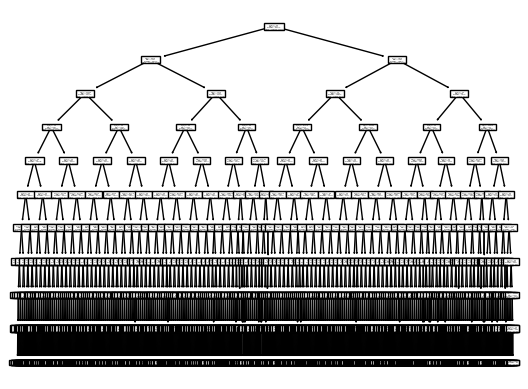

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dtc)

In [ ]:
y_preds = dtc.predict(X_test2)
y_prob = dtc.predict_proba(X_test2)

In [ ]:
calc_metrics(y_test2, y_preds, y_prob)

[[314695   4829]
 [ 71787   4644]]
-----------------------------------
gini:  0.35985857669076204
acc:  0.8065032642598275
balancde_acc:  0.5228237901821221
auc:  0.679929288345381
-----------------------------------


0.35985857669076204

In [ ]:
dtc.feature_importances_

array([0.00049327, 0.06650454, 0.00122199, 0.00288344, 0.01021651,
       0.08585022, 0.05284058, 0.02347771, 0.02460123, 0.02413838,
       0.01915573, 0.07299159, 0.02201296, 0.0255288 , 0.01992827,
       0.03358704, 0.01991451, 0.0441873 , 0.01227878, 0.03158234,
       0.04387354, 0.02548289, 0.00434411, 0.00059494, 0.00438638,
       0.02303665, 0.02623494, 0.01650348, 0.01917088, 0.03422434,
       0.00707304, 0.00537387, 0.00342104, 0.0521411 , 0.0072281 ,
       0.00559106, 0.00516209, 0.00452461, 0.00464679, 0.00420349,
       0.00407978, 0.0042372 , 0.00383591, 0.00555122, 0.00448707,
       0.0049454 , 0.0000127 , 0.00004663, 0.00340527, 0.00456375,
       0.        , 0.005561  , 0.0065602 , 0.0000474 , 0.00406182,
       0.00129177, 0.0026959 , 0.00213682, 0.0014416 , 0.00442459,
       0.00028198, 0.00269859, 0.00139219, 0.0002499 , 0.        ,
       0.02789421, 0.        , 0.00733526, 0.00614929, 0.        ])

In [ ]:
# была допущена чудовищная ошибка, посылая в рок аук готовые метки а не скоры
# это поступок не достойный звания гражданина СССР

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(enc_ds.drop(columns=["int_rate"], axis=1),
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

In [ ]:
lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-18 05:40:31,195] A new study created in memory with name: no-name-1a88c7f9-7c86-4564-ae45-b4de6b8b9307


Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.263876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80494 42959]
 [10092 19438]]
-----------------------------------
gini:  0.4324065236171526
acc:  0.653222907120399
balancde_acc:  0.6551336343668825
auc:  0.7162032618085763
-----------------------------------
val gini:


[I 2023-08-18 05:40:55,953] Trial 0 finished with value: 0.4324065236171526 and parameters: {'n_estimators': 35, 'max_depth': 10, 'learning_rate': 0.22043830212016982, 'num_leaves': 123}. Best is trial 0 with value: 0.4324065236171526.


[[94588 50651]
 [11862 22879]]
-----------------------------------
gini:  0.428535369300052
acc:  0.6526669629958884
balancde_acc:  0.6549083167974454
auc:  0.714267684650026
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.566231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80156 43297]
 [10575 18955]]
-----------------------------------
gini:  0.40483148590196416
acc:  0.6478562977585745
balancde_acc:  0.6455865683986082
auc:  0.7024157429509821
------

[I 2023-08-18 05:41:10,632] Trial 1 finished with value: 0.40483148590196416 and parameters: {'n_estimators': 64, 'max_depth': 2, 'learning_rate': 0.20350813290412498, 'num_leaves': 48}. Best is trial 0 with value: 0.4324065236171526.


[[94214 51025]
 [12446 22295]]
-----------------------------------
gini:  0.40301520509971844
acc:  0.6473441493499278
balancde_acc:  0.6452157292880347
auc:  0.7015076025498592
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.218870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 05:42:03,655] Trial 2 finished with value: 0.41610757463799675 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.9506340140994486, 'num_leaves': 17}. Best is trial 0 with value: 0.4324065236171526.


[[95038 50201]
 [12372 22369]]
-----------------------------------
gini:  0.41479847704145145
acc:  0.6523335926214023
balancde_acc:  0.6491174569632434
auc:  0.7073992385207257
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.218488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 05:43:09,113] Trial 3 finished with value: 0.42331236318023713 and parameters: {'n_estimators': 195, 'max_depth': 9, 'learning_rate': 0.24089171322462463, 'num_leaves': 171}. Best is trial 0 with value: 0.4324065236171526.


[[99331 45908]
 [13297 21444]]
-----------------------------------
gini:  0.41842945219925465
acc:  0.6710467829758862
balancde_acc:  0.6505837447871374
auc:  0.7092147260996273
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80140 43313]
 [10072 19458]]
-----------------------------------
gini:  0.4287304025448617
acc:  0.6510396580012158

[I 2023-08-18 05:43:40,200] Trial 4 finished with value: 0.4287304025448617 and parameters: {'n_estimators': 186, 'max_depth': 4, 'learning_rate': 0.26084540765146963, 'num_leaves': 5}. Best is trial 0 with value: 0.4324065236171526.


[[94257 50982]
 [11861 22880]]
-----------------------------------
gini:  0.42611096626605494
acc:  0.6508334259362152
balancde_acc:  0.6537832079159447
auc:  0.7130554831330275
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.318069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80464 42989]
 [ 9819 19711]]
-----------------------------------
gini:  0.43916316789001963
acc:  0.654811318904714

[I 2023-08-18 05:44:27,233] Trial 5 finished with value: 0.43916316789001963 and parameters: {'n_estimators': 247, 'max_depth': 6, 'learning_rate': 0.2789865441416552, 'num_leaves': 8}. Best is trial 5 with value: 0.43916316789001963.


[[94535 50704]
 [11607 23134]]
-----------------------------------
gini:  0.43672118341316346
acc:  0.6537893099233248
balancde_acc:  0.6583958741734245
auc:  0.7183605917065817
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80132 43321]
 [10623 18907]]
-----------------------------------
gini:  0.40347924223772846
acc:  0.647385657229888

[I 2023-08-18 05:44:50,110] Trial 6 finished with value: 0.40347924223772846 and parameters: {'n_estimators': 188, 'max_depth': 1, 'learning_rate': 0.23204947651836616, 'num_leaves': 82}. Best is trial 5 with value: 0.43916316789001963.


[[94232 51007]
 [12484 22257]]
-----------------------------------
gini:  0.4009803752194805
acc:  0.6472330258917658
balancde_acc:  0.6447307918809365
auc:  0.7004901876097402
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 05:45:03,167] Trial 7 finished with value: 0.41955430725593934 and parameters: {'n_estimators': 18, 'max_depth': 8, 'learning_rate': 0.30166082297609115, 'num_leaves': 146}. Best is trial 5 with value: 0.43916316789001963.


[[94959 50280]
 [12286 22455]]
-----------------------------------
gini:  0.4178074377945675
acc:  0.6523724858317591
balancde_acc:  0.6500832220796126
auc:  0.7089037188972838
-----------------------------------
Start iteration
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.316358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[

[I 2023-08-18 05:45:45,932] Trial 8 finished with value: 0.4055820720062513 and parameters: {'n_estimators': 185, 'max_depth': 5, 'learning_rate': 0.9750844965224221, 'num_leaves': 31}. Best is trial 5 with value: 0.43916316789001963.


[[95784 49455]
 [12639 22102]]
-----------------------------------
gini:  0.4035912314773682
acc:  0.6549949994443827
balancde_acc:  0.6478429158300318
auc:  0.7017956157386841
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.320817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 05:46:12,475] Trial 9 finished with value: 0.40969689190386016 and parameters: {'n_estimators': 59, 'max_depth': 10, 'learning_rate': 0.46133807517280495, 'num_leaves': 255}. Best is trial 5 with value: 0.43916316789001963.


[[97646 47593]
 [13181 21560]]
-----------------------------------
gini:  0.4063974155599239
acc:  0.6623291476830759
balancde_acc:  0.6464524583869837
auc:  0.703198707779962
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.219270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 05:47:56,366] Trial 10 finished with value: 0.43221549654706815 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.037923910066402305, 'num_leaves': 65}. Best is trial 5 with value: 0.43916316789001963.


[[95151 50088]
 [11988 22753]]
-----------------------------------
gini:  0.4287384115407462
acc:  0.6550950105567285
balancde_acc:  0.6550330821419788
auc:  0.7143692057703731
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80720 42733]
 [10984 18546]]
-----------------------------------
gini:  0.39346764401474776
acc:  0.6488694822300517

[I 2023-08-18 05:48:46,469] Trial 11 finished with value: 0.39346764401474776 and parameters: {'n_estimators': 122, 'max_depth': 7, 'learning_rate': 0.012797251932130715, 'num_leaves': 95}. Best is trial 5 with value: 0.43916316789001963.


[[94757 50482]
 [12976 21765]]
-----------------------------------
gini:  0.38858957453476295
acc:  0.6474163795977331
balancde_acc:  0.6394571870600233
auc:  0.6942947872673815
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.317468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2023-08-18 05:49:43,135] Trial 12 finished with value: 0.3699581526560247 and parameters: {'n_estimators': 129, 'max_depth': 10, 'learning_rate': 0.4889760987721563, 'num_leaves': 422}. Best is trial 5 with value: 0.43916316789001963.


[[102897  42342]
 [ 15564  19177]]
-----------------------------------
gini:  0.3647025774760144
acc:  0.6782642515835092
balancde_acc:  0.630232906519894
auc:  0.6823512887380072
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80643 42810]
 [ 9999 19531]]
-----------------------------------
gini:  0.4346326628705659
acc:  0.65480478223070

[I 2023-08-18 05:50:08,284] Trial 13 finished with value: 0.4346326628705659 and parameters: {'n_estimators': 127, 'max_depth': 3, 'learning_rate': 0.654208456639368, 'num_leaves': 6}. Best is trial 5 with value: 0.43916316789001963.


[[94736 50503]
 [11782 22959]]
-----------------------------------
gini:  0.43230809350793953
acc:  0.6539337704189354
balancde_acc:  0.6565691991553382
auc:  0.7161540467539698
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80483 42970]
 [10001 19529]]
-----------------------------------
gini:  0.4339415572242289
acc:  0.6537458410411614

[I 2023-08-18 05:50:32,862] Trial 14 finished with value: 0.4339415572242289 and parameters: {'n_estimators': 126, 'max_depth': 3, 'learning_rate': 0.6894897496835678, 'num_leaves': 6}. Best is trial 5 with value: 0.43916316789001963.


[[94787 50452]
 [11691 23050]]
-----------------------------------
gini:  0.4331987733262386
acc:  0.6547227469718858
balancde_acc:  0.6580544635508171
auc:  0.7165993866631193
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.316509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80826 42627]
 [10116 19414]]
-----------------------------------
gini:  0.4331121416832846
acc:  0.6552362027153343


[I 2023-08-18 05:50:55,276] Trial 15 finished with value: 0.4331121416832846 and parameters: {'n_estimators': 102, 'max_depth': 3, 'learning_rate': 0.6843870367221352, 'num_leaves': 7}. Best is trial 5 with value: 0.43916316789001963.


[[95100 50139]
 [11847 22894]]
-----------------------------------
gini:  0.4310964103481696
acc:  0.6555950661184576
balancde_acc:  0.6568868120183976
auc:  0.7155482051740848
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[80861 42592]
 [10116 19414]]
-----------------------------------
gini:  0.4319731622330396
acc:  0.655464986305668
b

[I 2023-08-18 05:51:46,971] Trial 17 finished with value: 0.4295978966608458 and parameters: {'n_estimators': 84, 'max_depth': 4, 'learning_rate': 0.38888281211044556, 'num_leaves': 8}. Best is trial 5 with value: 0.43916316789001963.


[[94576 50663]
 [11877 22864]]
-----------------------------------
gini:  0.4272118993469396
acc:  0.6525169463273697
balancde_acc:  0.6546511223290459
auc:  0.7136059496734698
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.335837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004


[W 2023-08-18 05:52:02,742] Trial 18 failed with parameters: {'n_estimators': 155, 'max_depth': 1, 'learning_rate': 0.5726962964476542, 'num_leaves': 35} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-45-64e7e369f742>", line 42, in lightGMB_model_opt
    bst.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 266, in train
    booster.update(fobj=fobj)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 3557, in update
    _safe_call(_LIB.LGBM_BoosterUpdateOneIter(
KeyboardInterrupt
[W 2023-08-18 05:52:02,744] Tr

KeyboardInterrupt: ignored

In [ ]:
enc_ds

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,fico_range_high,fico_range_low,funded_amnt,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan
0,0.00000000000000000000,80000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,30.48999999999999843681,1996.00000000000000000000,689.00000000000000000000,685.00000000000000000000,16000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1,0.00000000000000000000,82000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.00000000000000000000,1993.00000000000000000000,689.00000000000000000000,685.00000000000000000000,6600.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,0.00000000000000000000,46080.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,17.32000000000000028422,2000.00000000000000000000,674.00000000000000000000,670.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
3,0.00000000000000000000,30000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,7.79999999999999982236,2010.00000000000000000000,694.00000000000000000000,690.00000000000000000000,3000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
4,0.00000000000000000000,70000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,13.35999999999999943157,2002.00000000000000000000,674.00000000000000000000,670.00000000000000000000,20000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,0.00000000000000000000,41000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,22.96999999999999886313,2002.00000000000000000000,684.00000000000000000000,680.00000000000000000000,10000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000
1199857,0.00000000000000000000,95000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.62999999999999900524,2002.00000000000000000000,709.00000000000000000000,705.00000000000000000000,17000.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000
1199858,0.00000000000000000000,61000.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,15.58000000000000007105,2002.00000000

In [ ]:
# была допущена чудовищная ошибка, посылая в рок аук готовые метки а не скоры
# это поступок не достойный звания гражданина СССР

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(enc_ds,
                                                    y.loan_status,
                                                    test_size=.15,
                                                    stratify=y.loan_status,
                                                    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                    y_train,
                                                    test_size=.15,
                                                    stratify=y_train,
                                                    random_state=1)

In [ ]:
lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-18 05:53:41,562] A new study created in memory with name: no-name-ee81e654-d46e-43d5-9fd6-d458b913e7b8


Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.322540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2023-08-18 05:54:10,509] Trial 0 finished with value: 0.4354435855410359 and parameters: {'n_estimators': 119, 'max_depth': 4, 'learning_rate': 0.06103233164365458, 'num_leaves': 15}. Best is trial 0 with value: 0.4354435855410359.


[[143940   1299]
 [ 33053   1688]]
-----------------------------------
gini:  0.4335522763083539
acc:  0.8091343482609179
balancde_acc:  0.5198221224162621
auc:  0.716776138154177
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.326573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2023-08-18 05:55:03,403] Trial 1 finished with value: 0.3660342177381244 and parameters: {'n_estimators': 154, 'max_depth': 9, 'learning_rate': 0.7167329187919964, 'num_leaves': 310}. Best is trial 0 with value: 0.4354435855410359.


[[137046   8193]
 [ 29617   5124]]
-----------------------------------
gini:  0.35830116873220486
acc:  0.7899211023447049
balancde_acc:  0.5455404841842066
auc:  0.6791505843661024
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.223655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2023-08-18 05:55:51,793] Trial 2 finished with value: 0.39882199232822235 and parameters: {'n_estimators': 147, 'max_depth': 9, 'learning_rate': 0.4758370428880895, 'num_leaves': 249}. Best is trial 0 with value: 0.4354435855410359.


[[139854   5385]
 [ 30369   4372]]
-----------------------------------
gini:  0.3987694826459469
acc:  0.8013445938437604
balancde_acc:  0.5443843622602532
auc:  0.6993847413229735
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.232898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2023-08-18 05:57:03,291] Trial 3 finished with value: 0.35534643363263396 and parameters: {'n_estimators': 233, 'max_depth': 8, 'learning_rate': 0.8207872151697427, 'num_leaves': 174}. Best is trial 0 with value: 0.4354435855410359.


[[136483   8756]
 [ 29270   5471]]
-----------------------------------
gini:  0.3509267784000012
acc:  0.7887209689965552
balancde_acc:  0.5485963987279897
auc:  0.6754633892000006
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.321852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121859   1594]
 [ 27506   2024]]
-----------------------------------
gini:  0.432968861917173
acc:  0.80978278

[I 2023-08-18 05:57:29,677] Trial 4 finished with value: 0.432968861917173 and parameters: {'n_estimators': 204, 'max_depth': 1, 'learning_rate': 0.8993900886846344, 'num_leaves': 33}. Best is trial 0 with value: 0.4354435855410359.


[[143336   1903]
 [ 32507   2234]]
-----------------------------------
gini:  0.4310251063526189
acc:  0.808812090232248
balancde_acc:  0.5256009414194897
auc:  0.7155125531763095
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2023-08-18 05:58:27,150] Trial 5 finished with value: 0.43224399526823687 and parameters: {'n_estimators': 164, 'max_depth': 9, 'learning_rate': 0.22723154738665083, 'num_leaves': 334}. Best is trial 0 with value: 0.4354435855410359.


[[141968   3271]
 [ 31294   3447]]
-----------------------------------
gini:  0.4320237887880338
acc:  0.8079508834314924
balancde_acc:  0.5383492214045227
auc:  0.7160118943940169
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.319980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121547   1906]
 [ 27041   2489]]
-----------------------------------
gini:  0.4409441950497748
acc:  0.8107828

[I 2023-08-18 05:58:47,553] Trial 6 finished with value: 0.4409441950497748 and parameters: {'n_estimators': 122, 'max_depth': 2, 'learning_rate': 0.7805645468922561, 'num_leaves': 91}. Best is trial 6 with value: 0.4409441950497748.


[[142963   2276]
 [ 32023   2718]]
-----------------------------------
gini:  0.43832242466450566
acc:  0.8094288254250472
balancde_acc:  0.5312826839356651
auc:  0.7191612123322528
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.221142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2023-08-18 05:59:16,301] Trial 7 finished with value: 0.444523713867518 and parameters: {'n_estimators': 124, 'max_depth': 5, 'learning_rate': 0.3814269889681761, 'num_leaves': 29}. Best is trial 7 with value: 0.444523713867518.


[[142630   2609]
 [ 31685   3056]]
-----------------------------------
gini:  0.4428392565698709
acc:  0.8094566062895877
balancde_acc:  0.5350008668754195
auc:  0.7214196282849354
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.298767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2023-08-18 06:00:06,713] Trial 8 finished with value: 0.39722899297952563 and parameters: {'n_estimators': 168, 'max_depth': 8, 'learning_rate': 0.5958208715819328, 'num_leaves': 158}. Best is trial 7 with value: 0.444523713867518.


[[139698   5541]
 [ 30351   4390]]
-----------------------------------
gini:  0.3935541228056061
acc:  0.8005778419824425
balancde_acc:  0.5441063763258627
auc:  0.696777061402803
-----------------------------------
Start iteration
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.223919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2023-08-18 06:00:43,726] Trial 9 finished with value: 0.4319059847558586 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.8337133563770416, 'num_leaves': 16}. Best is trial 7 with value: 0.444523713867518.


[[141898   3341]
 [ 31270   3471]]
-----------------------------------
gini:  0.43273306319685934
acc:  0.8076952994777198
balancde_acc:  0.5384536524997063
auc:  0.7163665315984297
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121379   2074]
 [ 26939   2591]]
-----------------------------------
gini:  0.4410564694888113
acc:  0.810351

[I 2023-08-18 06:00:59,693] Trial 10 finished with value: 0.4410564694888113 and parameters: {'n_estimators': 41, 'max_depth': 6, 'learning_rate': 0.3949463146157826, 'num_leaves': 29}. Best is trial 7 with value: 0.444523713867518.


[[142828   2411]
 [ 31869   2872]]
-----------------------------------
gini:  0.4403000259644949
acc:  0.8095343927103011
balancde_acc:  0.5330343341026149
auc:  0.7201500129822475
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.221345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121441   2012]
 [ 26954   2576]]
-----------------------------------
gini:  0.4412421613121378
acc:  0.8106587

[I 2023-08-18 06:01:15,544] Trial 11 finished with value: 0.4412421613121378 and parameters: {'n_estimators': 38, 'max_depth': 6, 'learning_rate': 0.429891014760399, 'num_leaves': 30}. Best is trial 7 with value: 0.444523713867518.


[[142862   2377]
 [ 31896   2845]]
-----------------------------------
gini:  0.4404563996051363
acc:  0.8095732859206578
balancde_acc:  0.5327627927031797
auc:  0.7202281998025681
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.232612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[122493    960]
 [ 28230   1300]]
-----------------------------------
gini:  0.4271220099806201
acc:  0.8091944

[I 2023-08-18 06:01:23,779] Trial 12 finished with value: 0.4271220099806201 and parameters: {'n_estimators': 11, 'max_depth': 6, 'learning_rate': 0.31770285746617405, 'num_leaves': 25}. Best is trial 7 with value: 0.444523713867518.


[[144084   1155]
 [ 33294   1447]]
-----------------------------------
gini:  0.42521381089658705
acc:  0.8085953994888321
balancde_acc:  0.5168493328108966
auc:  0.7126069054482935
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121448   2005]
 [ 27050   2480]]
-----------------------------------
gini:  0.4394783696053173
acc:  0.810076

[I 2023-08-18 06:01:40,759] Trial 13 finished with value: 0.4394783696053173 and parameters: {'n_estimators': 79, 'max_depth': 4, 'learning_rate': 0.5787391533444883, 'num_leaves': 5}. Best is trial 7 with value: 0.444523713867518.


[[142890   2349]
 [ 32012   2729]]
-----------------------------------
gini:  0.43674785497848156
acc:  0.8090843427047449
balancde_acc:  0.5311896884093738
auc:  0.7183739274892408
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2023-08-18 06:02:03,392] Trial 14 finished with value: 0.4445462277859218 and parameters: {'n_estimators': 79, 'max_depth': 5, 'learning_rate': 0.2627331610601955, 'num_leaves': 23}. Best is trial 14 with value: 0.4445462277859218.


[[143015   2224]
 [ 32004   2737]]
-----------------------------------
gini:  0.4434234260413086
acc:  0.8098233137015224
balancde_acc:  0.5317351513310257
auc:  0.7217117130206543
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.406133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2023-08-18 06:02:23,446] Trial 15 finished with value: 0.4386942995472345 and parameters: {'n_estimators': 86, 'max_depth': 3, 'learning_rate': 0.21449807762044926, 'num_leaves': 8}. Best is trial 14 with value: 0.4445462277859218.


[[143386   1853]
 [ 32432   2309]]
-----------------------------------
gini:  0.43714742625323444
acc:  0.8095066118457607
balancde_acc:  0.5268524877464359
auc:  0.7185737131266172
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.314042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[122671    782]
 [ 28365   1165]]
-----------------------------------
gini:  0.431081075509709
acc:  0.8094755

[I 2023-08-18 06:02:50,827] Trial 16 finished with value: 0.431081075509709 and parameters: {'n_estimators': 83, 'max_depth': 5, 'learning_rate': 0.05225456485539082, 'num_leaves': 22}. Best is trial 14 with value: 0.4445462277859218.


[[144320    919]
 [ 33478   1263]]
-----------------------------------
gini:  0.429607356029051
acc:  0.8088843204800533
balancde_acc:  0.515013618895286
auc:  0.7148036780145255
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2023-08-18 06:03:21,623] Trial 17 finished with value: 0.44419886344760706 and parameters: {'n_estimators': 103, 'max_depth': 7, 'learning_rate': 0.2919764695216249, 'num_leaves': 52}. Best is trial 14 with value: 0.4445462277859218.


[[142639   2600]
 [ 31637   3104]]
-----------------------------------
gini:  0.44057803667221873
acc:  0.8097733081453495
balancde_acc:  0.5357226766900477
auc:  0.7202890183361094
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121832   1621]
 [ 27287   2243]]
-----------------------------------
gini:  0.44250338347222673
acc:  0.81103

[I 2023-08-18 06:03:41,454] Trial 18 finished with value: 0.44250338347222673 and parameters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.17952064613453866, 'num_leaves': 22}. Best is trial 14 with value: 0.4445462277859218.


[[143295   1944]
 [ 32268   2473]]
-----------------------------------
gini:  0.4409240089573485
acc:  0.809912212468052
balancde_acc:  0.5288995345465025
auc:  0.7204620044786743
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.499687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121969   1484]
 [ 27543   1987]]
-----------------------------------
gini:  0.4371082807311606
acc:  0.81025996

[I 2023-08-18 06:03:58,112] Trial 19 finished with value: 0.4371082807311606 and parameters: {'n_estimators': 52, 'max_depth': 3, 'learning_rate': 0.3594529494622743, 'num_leaves': 7}. Best is trial 14 with value: 0.4445462277859218.


[[143454   1785]
 [ 32546   2195]]
-----------------------------------
gini:  0.4357805777969339
acc:  0.809251027891988
balancde_acc:  0.5254458719462126
auc:  0.717890288898467
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.327811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121312   2141]
 [ 27022   2508]]
-----------------------------------
gini:  0.4354815626229498
acc:  0.809370975

[I 2023-08-18 06:04:08,404] Trial 20 finished with value: 0.4354815626229498 and parameters: {'n_estimators': 13, 'max_depth': 7, 'learning_rate': 0.5389015526630054, 'num_leaves': 48}. Best is trial 14 with value: 0.4445462277859218.


[[142738   2501]
 [ 31916   2825]]
-----------------------------------
gini:  0.43370756130963173
acc:  0.8087731970218913
balancde_acc:  0.5320480657827623
auc:  0.7168537806548159
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.226815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2023-08-18 06:04:39,528] Trial 21 finished with value: 0.44321814414887095 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.2880484081066149, 'num_leaves': 59}. Best is trial 14 with value: 0.4445462277859218.


[[142542   2697]
 [ 31600   3141]]
-----------------------------------
gini:  0.4424948239969597
acc:  0.8094399377708634
balancde_acc:  0.5359212563615534
auc:  0.7212474119984799
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.322622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2023-08-18 06:05:07,096] Trial 22 finished with value: 0.4386200759783576 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.43350110818245363, 'num_leaves': 47}. Best is trial 14 with value: 0.4445462277859218.


[[142166   3073]
 [ 31428   3313]]
-----------------------------------
gini:  0.43424246871028727
acc:  0.8083064784976108
balancde_acc:  0.5371022994661787
auc:  0.7171212343551436
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.334590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121748   1705]
 [ 27220   2310]]
-----------------------------------
gini:  0.44456113301154465
acc:  0.81092

[I 2023-08-18 06:05:42,414] Trial 23 finished with value: 0.44456113301154465 and parameters: {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.13482244061724413, 'num_leaves': 12}. Best is trial 23 with value: 0.44456113301154465.


[[143235   2004]
 [ 32199   2542]]
-----------------------------------
gini:  0.4425587340443251
acc:  0.809962218024225
balancde_acc:  0.529686041407752
auc:  0.7212793670221626
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.626495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193030 -> initscore=-1.430443
[LightGBM] [Info] Start training from score -1.430443
test gini:
[[121857   1596]
 [ 27308   2222]]
-----------------------------------
gini:  0.4433564710504341
acc:  0.8110639744285313
balancde_acc:  0.5311587580740422
auc:  0.72167823552521

[I 2023-08-18 06:06:17,332] Trial 24 finished with value: 0.4433564710504341 and parameters: {'n_estimators': 134, 'max_depth': 5, 'learning_rate': 0.11540677161711918, 'num_leaves': 12}. Best is trial 23 with value: 0.44456113301154465.


[[143324   1915]
 [ 32306   2435]]
-----------------------------------
gini:  0.44149314141177465
acc:  0.809862206911879
balancde_acc:  0.5284524657559605
auc:  0.7207465707058873
-----------------------------------


In [ ]:
# была допущена чудовищная ошибка, посылая в рок аук готовые метки а не скоры
# это поступок не достойный звания гражданина СССР

# get weights

In [ ]:
lightGMB_model = optuna.create_study(direction="maximize")  # Create a new lightGMB_model.
lightGMB_model.optimize(lightGMB_model_opt, n_trials=25)  # Invoke optimization of the lightGMB_model function.
final_gbm_model = lightGMB_model.best_trial

[I 2023-08-18 06:07:18,138] A new study created in memory with name: no-name-9fef6f17-c105-4d18-942e-1b5d293f9e6b


Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.328541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78970 44483]
 [ 9695 19835]]
-----------------------------------
gini:  0.4300532173171445
acc:  0.6458560755116581
balancde_acc:  0.6556832225243727
auc:  0.7150266086585723
-----------------------------------
val gini:


[I 2023-08-18 06:07:33,893] Trial 0 finished with value: 0.4300532173171445 and parameters: {'n_estimators': 103, 'max_depth': 1, 'learning_rate': 0.8474273880280689, 'num_leaves': 52}. Best is trial 0 with value: 0.4300532173171445.


[[92853 52386]
 [11401 23340]]
-----------------------------------
gini:  0.42797848022337437
acc:  0.6455883987109678
balancde_acc:  0.6555702150798155
auc:  0.7139892401116872
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.316819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79206 44247]
 [ 9649 19881]]
-----------------------------------
gini:  0.43296023445285137
acc:  0.647699417582345

[I 2023-08-18 06:08:01,744] Trial 1 finished with value: 0.43296023445285137 and parameters: {'n_estimators': 231, 'max_depth': 1, 'learning_rate': 0.9093357636385706, 'num_leaves': 68}. Best is trial 1 with value: 0.43296023445285137.


[[93048 52191]
 [11335 23406]]
-----------------------------------
gini:  0.4312212616066231
acc:  0.6470385598399823
balancde_acc:  0.6571914086747992
auc:  0.7156106308033116
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.266515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79972 43481]
 [ 9648 19882]]
-----------------------------------
gini:  0.4432964633768406
acc:  0.6527130465476556


[I 2023-08-18 06:08:34,294] Trial 2 finished with value: 0.4432964633768406 and parameters: {'n_estimators': 223, 'max_depth': 2, 'learning_rate': 0.5203489718366496, 'num_leaves': 67}. Best is trial 2 with value: 0.4432964633768406.


[[94049 51190]
 [11402 23339]]
-----------------------------------
gini:  0.4415831463012556
acc:  0.6522280253361484
balancde_acc:  0.6596731742632322
auc:  0.7207915731506278
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79795 43658]
 [ 9614 19916]]
-----------------------------------
gini:  0.44218452882731074
acc:  0.6517783021642928

[I 2023-08-18 06:09:01,818] Trial 3 finished with value: 0.44218452882731074 and parameters: {'n_estimators': 176, 'max_depth': 2, 'learning_rate': 0.8521885558054954, 'num_leaves': 94}. Best is trial 2 with value: 0.4432964633768406.


[[93819 51420]
 [11325 23416]]
-----------------------------------
gini:  0.44194181145149547
acc:  0.651377930881209
balancde_acc:  0.6599895766021275
auc:  0.7209709057257477
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.221329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:09:53,985] Trial 4 finished with value: 0.4450003991011453 and parameters: {'n_estimators': 203, 'max_depth': 6, 'learning_rate': 0.24610919271986556, 'num_leaves': 63}. Best is trial 4 with value: 0.4450003991011453.


[[95542 49697]
 [11752 22989]]
-----------------------------------
gini:  0.4420343685888788
acc:  0.6585787309701078
balancde_acc:  0.6597757024691295
auc:  0.7210171842944394
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.321775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:10:29,611] Trial 5 finished with value: 0.4399602400404594 and parameters: {'n_estimators': 75, 'max_depth': 9, 'learning_rate': 0.22001448451783534, 'num_leaves': 272}. Best is trial 4 with value: 0.4450003991011453.


[[96610 48629]
 [12044 22697]]
-----------------------------------
gini:  0.4382170389041451
acc:  0.6628903211467941
balancde_acc:  0.6592498736033314
auc:  0.7191085194520725
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.226635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:11:12,277] Trial 6 finished with value: 0.43591532037886593 and parameters: {'n_estimators': 213, 'max_depth': 5, 'learning_rate': 0.572009968392459, 'num_leaves': 21}. Best is trial 4 with value: 0.4450003991011453.


[[95324 49915]
 [11908 22833]]
-----------------------------------
gini:  0.4332510827152176
acc:  0.656500722302478
balancde_acc:  0.6567800295374991
auc:  0.7166255413576088
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 06:11:45,931] Trial 7 finished with value: 0.4414343037093851 and parameters: {'n_estimators': 209, 'max_depth': 3, 'learning_rate': 0.7724658011660013, 'num_leaves': 7}. Best is trial 4 with value: 0.4450003991011453.


[[94169 51070]
 [11411 23330]]
-----------------------------------
gini:  0.44025256858150574
acc:  0.6528447605289477
balancde_acc:  0.6599567564936419
auc:  0.7201262842907529
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.324152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79108 44345]
 [ 9727 19803]]
-----------------------------------
gini:  0.4287149580341423
acc:  0.6465489629566684

[I 2023-08-18 06:11:57,120] Trial 8 finished with value: 0.4287149580341423 and parameters: {'n_estimators': 22, 'max_depth': 4, 'learning_rate': 0.3083667496029704, 'num_leaves': 8}. Best is trial 4 with value: 0.4450003991011453.


[[93088 52151]
 [11498 23243]]
-----------------------------------
gini:  0.4272908468076897
acc:  0.6463551505722858
balancde_acc:  0.6549831814146614
auc:  0.7136454234038448
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.320506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[79736 43717]
 [ 9658 19872]]
-----------------------------------
gini:  0.44092413068168224
acc:  0.6511050247413112

[I 2023-08-18 06:12:22,676] Trial 9 finished with value: 0.44092413068168224 and parameters: {'n_estimators': 165, 'max_depth': 2, 'learning_rate': 0.34134271620052825, 'num_leaves': 50}. Best is trial 4 with value: 0.4450003991011453.


[[93849 51390]
 [11381 23360]]
-----------------------------------
gini:  0.439604293650649
acc:  0.6512334703855984
balancde_acc:  0.6592868905126847
auc:  0.7198021468253245
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.288137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 06:13:30,470] Trial 10 finished with value: 0.4419060190715074 and parameters: {'n_estimators': 141, 'max_depth': 8, 'learning_rate': 0.0332974418691368, 'num_leaves': 170}. Best is trial 4 with value: 0.4450003991011453.


[[93956 51283]
 [11412 23329]]
-----------------------------------
gini:  0.4395143109580748
acc:  0.651655739526614
balancde_acc:  0.6592090901563653
auc:  0.7197571554790374
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.284797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 06:14:33,836] Trial 11 finished with value: 0.40244173259749294 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.5571917959638413, 'num_leaves': 84}. Best is trial 4 with value: 0.4450003991011453.


[[97987 47252]
 [13224 21517]]
-----------------------------------
gini:  0.4036269161759438
acc:  0.66398488720969
balancde_acc:  0.6470075201825884
auc:  0.7018134580879719
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2023-08-18 06:15:20,037] Trial 12 finished with value: 0.43121493177622483 and parameters: {'n_estimators': 184, 'max_depth': 6, 'learning_rate': 0.46386583168850204, 'num_leaves': 51}. Best is trial 4 with value: 0.4450003991011453.


[[96044 49195]
 [12110 22631]]
-----------------------------------
gini:  0.4284106484484256
acc:  0.6593788198688744
balancde_acc:  0.6563514748499537
auc:  0.7142053242242128
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:17:05,024] Trial 13 finished with value: 0.3121031142510122 and parameters: {'n_estimators': 247, 'max_depth': 10, 'learning_rate': 0.6600740506568026, 'num_leaves': 839}. Best is trial 4 with value: 0.4450003991011453.


[[109628  35611]
 [ 19038  15703]]
-----------------------------------
gini:  0.3078563060466408
acc:  0.6963607067451939
balancde_acc:  0.6034064964724273
auc:  0.6539281530233204
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
test gini:
[[80342 43111]
 [ 9803 19727]]
--------

[I 2023-08-18 06:17:32,300] Trial 14 finished with value: 0.442493299993006 and parameters: {'n_estimators': 135, 'max_depth': 5, 'learning_rate': 0.43136271808467275, 'num_leaves': 14}. Best is trial 4 with value: 0.4450003991011453.


[[94834 50405]
 [11551 23190]]
-----------------------------------
gini:  0.4405507816453522
acc:  0.6557617513057006
balancde_acc:  0.660231176158047
auc:  0.7202753908226761
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.222319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2023-08-18 06:18:35,396] Trial 15 finished with value: 0.4492106730094494 and parameters: {'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.11669711805413394, 'num_leaves': 78}. Best is trial 15 with value: 0.4492106730094494.


[[95120 50119]
 [11587 23154]]
-----------------------------------
gini:  0.4463038567950517
acc:  0.6571507945327258
balancde_acc:  0.6606976403876954
auc:  0.7231519283975258
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.318527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:19:37,702] Trial 16 finished with value: 0.4482553346727738 and parameters: {'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.11138308565784572, 'num_leaves': 95}. Best is trial 15 with value: 0.4492106730094494.


[[95455 49784]
 [11619 23122]]
-----------------------------------
gini:  0.445992304579373
acc:  0.6588343149238804
balancde_acc:  0.6613903609578509
auc:  0.7229961522896865
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.319881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78193 45260]
 [ 9597 19933]]
-----------------------------------
gini:  0.4248050991155945
acc:  0.641417673859187
ba

[I 2023-08-18 06:20:34,532] Trial 17 finished with value: 0.4248050991155945 and parameters: {'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.013359243324571779, 'num_leaves': 140}. Best is trial 15 with value: 0.4492106730094494.


[[92024 53215]
 [11299 23442]]
-----------------------------------
gini:  0.4231623038064787
acc:  0.6415490610067786
balancde_acc:  0.6541843045343829
auc:  0.7115811519032393
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:21:27,779] Trial 18 finished with value: 0.44751794157764335 and parameters: {'n_estimators': 152, 'max_depth': 7, 'learning_rate': 0.12398235667816015, 'num_leaves': 97}. Best is trial 15 with value: 0.4492106730094494.


[[95161 50078]
 [11548 23193]]
-----------------------------------
gini:  0.44542141401102087
acc:  0.657595288365374
balancde_acc:  0.6614000835002842
auc:  0.7227107070055104
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.221454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:22:49,003] Trial 19 finished with value: 0.4371945249264362 and parameters: {'n_estimators': 190, 'max_depth': 10, 'learning_rate': 0.1322823818990841, 'num_leaves': 417}. Best is trial 15 with value: 0.4492106730094494.


[[99244 45995]
 [12938 21803]]
-----------------------------------
gini:  0.4325249707635077
acc:  0.6725580620068896
balancde_acc:  0.6554510442476214
auc:  0.7162624853817539
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[77935 45518]
 [ 9636 19894]]
-----------------------------------
gini:  0.4230845665221319
acc:  0.6394762816783565


[I 2023-08-18 06:23:00,243] Trial 20 finished with value: 0.4230845665221319 and parameters: {'n_estimators': 12, 'max_depth': 7, 'learning_rate': 0.13394059577641976, 'num_leaves': 104}. Best is trial 15 with value: 0.4492106730094494.


[[91705 53534]
 [11363 23378]]
-----------------------------------
gini:  0.42097098474277206
acc:  0.6394210467829758
balancde_acc:  0.6521650127861447
auc:  0.710485492371386
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:23:52,072] Trial 21 finished with value: 0.4480659040621304 and parameters: {'n_estimators': 151, 'max_depth': 7, 'learning_rate': 0.11372278273433196, 'num_leaves': 105}. Best is trial 15 with value: 0.4492106730094494.


[[95158 50081]
 [11596 23145]]
-----------------------------------
gini:  0.44480503048592634
acc:  0.6573119235470608
balancde_acc:  0.6606989292946865
auc:  0.7224025152429632
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
test gini:
[[78933 44520]
 [ 9602 19928]]
-----------------------------------
gini:  0.43471659494270876
acc:  0.646222129256191

[I 2023-08-18 06:25:13,264] Trial 22 finished with value: 0.43471659494270876 and parameters: {'n_estimators': 162, 'max_depth': 8, 'learning_rate': 0.018123309520639383, 'num_leaves': 129}. Best is trial 15 with value: 0.4492106730094494.


[[92860 52379]
 [11281 23460]]
-----------------------------------
gini:  0.4331141712034958
acc:  0.6462940326702967
balancde_acc:  0.657321379293057
auc:  0.7165570856017479
-----------------------------------
Start iteration
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[L

[I 2023-08-18 06:25:45,939] Trial 23 finished with value: 0.44719346640799285 and parameters: {'n_estimators': 118, 'max_depth': 6, 'learning_rate': 0.20320292075061785, 'num_leaves': 31}. Best is trial 15 with value: 0.4492106730094494.


[[94407 50832]
 [11362 23379]]
-----------------------------------
gini:  0.4450097370982531
acc:  0.6544393821535727
balancde_acc:  0.6614813142696285
auc:  0.7225048685491265
-----------------------------------
Start iteration
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167337, number of negative: 699561
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.226171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2769
[LightGBM] [Info] Number of data points in the train set: 866898, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-08-18 06:26:17,604] Trial 24 finished with value: 0.4269193454892639 and parameters: {'n_estimators': 77, 'max_depth': 9, 'learning_rate': 0.3540916637329291, 'num_leaves': 207}. Best is trial 15 with value: 0.4492106730094494.


[[96762 48477]
 [12456 22285]]
-----------------------------------
gini:  0.42674826740295413
acc:  0.6614457161906878
balancde_acc:  0.653843555756151
auc:  0.7133741337014771
-----------------------------------


# **rf**

In [43]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(enc_ds.drop(columns=["int_rate"], axis=1),
                                                        y.loan_status,
                                                        stratify=y.loan_status,
                                                        test_size=0.33,
                                                        random_state=100
                                                        )

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=0
)

rf.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [26]:
y_preds = rf.predict(X_test2)
y_prob = rf.predict_proba(X_test2)

In [27]:
calc_metrics(y_test2, y_preds, y_prob)

# gini:0.35985857669076204 - first n_estimators=3
# gini 0.39564186047898664 - 10 max_depth
# gini 0.3933380601181906 - default

[[316857   2667]
 [ 73009   3422]]
-----------------------------------
gini:  0.3933380601181906
acc:  0.8088772714071043
balancde_acc:  0.5182128091248139
auc:  0.6966690300590953
-----------------------------------


0.3933380601181906

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=0,
    max_depth=10,
    min_samples_leaf=100
)

rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10, min_samples_leaf=100, random_state=0)

In [13]:
y_preds = rf.predict(X_test2)
y_prob = rf.predict_proba(X_test2)

In [20]:
calc_metrics(y_test2, y_preds, y_prob)

# gini:  0.35985857669076204 - first

[[319437     87]
 [ 76274    157]]
-----------------------------------
gini:  0.3958860923448859
acc:  0.8071472768370143
balancde_acc:  0.5008909301596015
auc:  0.697943046172443
-----------------------------------


0.3958860923448859

In [ ]:
"""
Выберите правильные ответы:
1. catboost c iterations=80 и остальными дефолтными параметрами, работает хуже леса, но лучше деревьев, если сравнивать модели из предыдущих вопросов
2. catboost c iterations=80 и остальными дефолтными параметрами лучше lightgbm с дефолтными параметрами
3. xgboost с параметрами n_estimators=250, learning_rate=0.10, colsample_bytree=0.70, max_depth=3 лучше lightgbm с дефолтными параметрами
4. xgboost с параметрами n_estimators=250, learning_rate=0.10, colsample_bytree=0.70, max_depth=3 лучше catboost c iterations=80 и остальными дефолтными параметрами
"""

In [44]:
catb = CatBoostClassifier(iterations=80
                        )
catb.fit(X_train2, y_train2)

Learning rate set to 0.5
0:	learn: 0.5128568	total: 347ms	remaining: 27.4s
1:	learn: 0.4726971	total: 612ms	remaining: 23.8s
2:	learn: 0.4608822	total: 898ms	remaining: 23s
3:	learn: 0.4563512	total: 1.2s	remaining: 22.9s
4:	learn: 0.4539104	total: 1.48s	remaining: 22.2s
5:	learn: 0.4522446	total: 1.78s	remaining: 21.9s
6:	learn: 0.4511164	total: 2.02s	remaining: 21s
7:	learn: 0.4501830	total: 2.27s	remaining: 20.5s
8:	learn: 0.4494540	total: 2.51s	remaining: 19.8s
9:	learn: 0.4488882	total: 2.78s	remaining: 19.4s
10:	learn: 0.4484897	total: 3.03s	remaining: 19s
11:	learn: 0.4480618	total: 3.31s	remaining: 18.7s
12:	learn: 0.4477300	total: 3.59s	remaining: 18.5s
13:	learn: 0.4473152	total: 3.9s	remaining: 18.4s
14:	learn: 0.4469972	total: 4.12s	remaining: 17.8s
15:	learn: 0.4467862	total: 4.37s	remaining: 17.5s
16:	learn: 0.4465372	total: 4.64s	remaining: 17.2s
17:	learn: 0.4463250	total: 4.89s	remaining: 16.9s
18:	learn: 0.4461359	total: 5.56s	remaining: 17.9s
19:	learn: 0.4459598	tot

In [45]:
y_preds = catb.predict(X_test2)
y_prob = catb.predict_proba(X_test2)

In [46]:
calc_metrics(y_test2, y_preds, y_prob)

[[314898   4626]
 [ 70539   5892]]
-----------------------------------
gini:  0.4368346153019349
acc:  0.8101678221009964
balancde_acc:  0.5313056767586877
auc:  0.7184173076509675
-----------------------------------


0.4368346153019349

In [47]:
lgmb = LGBMClassifier()
lgmb.fit(X_train2, y_train2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 155177, number of negative: 648729
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 803906, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193029 -> initscore=-1.430449
[LightGBM] [Info] Start training from score -1.430449


LGBMClassifier()

In [48]:
y_preds = lgmb.predict(X_test2)
y_prob = lgmb.predict_proba(X_test2)

In [49]:
calc_metrics(y_test2, y_preds, y_prob)

[[316149   3375]
 [ 71609   4822]]
-----------------------------------
gini:  0.4346742201549696
acc:  0.8106249447538231
balancde_acc:  0.5262634986106774
auc:  0.7173371100774848
-----------------------------------


0.4346742201549696

In [52]:
# ValueError: feature_names must be string, and may not contain [, ] or <

X_train2.columns

Index(['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'fico_range_high', 'fico_range_low', 'funded_amnt', 'inq_last_12m',
       'installment', 'issue_d', 'loan_amnt', 'mort_acc',
       'mths_since_last_delinq', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m',
       'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'tax_liens', 'total_acc', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_nan',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
      

In [57]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(enc_ds.drop(columns=["int_rate"], axis=1).rename(columns={"emp_length_< 1 year": "emp_length_less_1_year"}),
                                                        y.loan_status,
                                                        stratify=y.loan_status,
                                                        test_size=0.33,
                                                        random_state=100
                                                        )

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=250, learning_rate=0.10, colsample_bytree=0.70, max_depth=3)
xgb.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
y_preds = xgb.predict(X_test2)
y_prob = xgb.predict_proba(X_test2)

In [60]:
calc_metrics(y_test2, y_preds, y_prob)

[[316155   3369]
 [ 71751   4680]]
-----------------------------------
gini:  0.42744648245475636
acc:  0.8102814713793234
balancde_acc:  0.525343945131945
auc:  0.7137232412273782
-----------------------------------


0.42744648245475636

# **для каждого года отдельно?**

In [64]:
list(enc_ds.issue_d.value_counts().index)

[2015.0,
 2016.0,
 2017.0,
 2014.0,
 2018.0,
 2013.0,
 2019.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2020.0,
 2008.0,
 2007.0]

In [66]:
from sklearn.model_selection import train_test_split

dff_y = enc_ds.assign(y=y.loan_status)

for i in list(enc_ds.issue_d.value_counts().index):

    X_train2, X_test2, y_train2, y_test2 = train_test_split(enc_ds.drop(columns=["int_rate"], axis=1)[enc_ds.issue_d == i],
                                                        dff_y[enc_ds.issue_d == i].y,
                                                        stratify=dff_y[enc_ds.issue_d == i].y,
                                                        test_size=0.33,
                                                        random_state=100
                                                        )
    print(i)
    catb = CatBoostClassifier(
        iterations=80
                              )
    catb.fit(X_train2, y_train2)
    y_preds = catb.predict(X_test2)
    y_prob = catb.predict_proba(X_test2)
    calc_metrics(y_test2, y_preds, y_prob)

2015.0
Learning rate set to 0.5
0:	learn: 0.5175578	total: 157ms	remaining: 12.4s
1:	learn: 0.4760677	total: 349ms	remaining: 13.6s
2:	learn: 0.4644393	total: 545ms	remaining: 14s
3:	learn: 0.4597682	total: 713ms	remaining: 13.6s
4:	learn: 0.4571607	total: 900ms	remaining: 13.5s
5:	learn: 0.4558578	total: 1.01s	remaining: 12.4s
6:	learn: 0.4547665	total: 1.18s	remaining: 12.3s
7:	learn: 0.4539326	total: 1.4s	remaining: 12.6s
8:	learn: 0.4533188	total: 1.59s	remaining: 12.6s
9:	learn: 0.4528114	total: 1.79s	remaining: 12.5s
10:	learn: 0.4522607	total: 2s	remaining: 12.6s
11:	learn: 0.4516707	total: 2.18s	remaining: 12.4s
12:	learn: 0.4513460	total: 2.39s	remaining: 12.3s
13:	learn: 0.4508607	total: 2.6s	remaining: 12.3s
14:	learn: 0.4506375	total: 2.87s	remaining: 12.4s
15:	learn: 0.4503515	total: 3.03s	remaining: 12.1s
16:	learn: 0.4500506	total: 3.2s	remaining: 11.9s
17:	learn: 0.4497232	total: 3.35s	remaining: 11.6s
18:	learn: 0.4495094	total: 3.5s	remaining: 11.2s
19:	learn: 0.44923

In [ ]:
y_preds = catb.predict(X_test2)
y_prob = catb.predict_proba(X_test2)

In [ ]:
calc_metrics(y_test2, y_preds, y_prob)

[[314898   4626]
 [ 70539   5892]]
-----------------------------------
gini:  0.4368346153019349
acc:  0.8101678221009964
balancde_acc:  0.5313056767586877
auc:  0.7184173076509675
-----------------------------------


0.4368346153019349

# **КОНЕЦ**

In [ ]:
if emp_length=='4 years' & purpose=='small_business'

 (mort_acc > 0) и приемлемое отношение долгов к доходу (dti < 0.3).